In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import folium
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import branca.colormap as cm

from ipywidgets import interact_manual, widgets, VBox, HBox
import ipywidgets as widgets
from IPython.display import display
from datetime import date, timedelta
import datetime
import seaborn as sns
# import ipydatetime
# from ipydatetime import TimePicker
import calendar
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping, shape
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from shapely.geometry.polygon import Polygon
from geopy.distance import geodesic
from pyproj import Geod
from shapely.ops import transform
import pyproj
from functools import partial
import geopy
from folium import features
import json
pd.set_option('display.max_columns', None)


In [ ]:
# len(dados_all[(dados_all['end_station_name']=='Chicão Vive') & (dados_all['date'] < pd.to_datetime('2019-12-03'))])

# Análise de dados de estações de bicicleta em São Paulo
Esse documento contém a disponibilização de tabelas, gráficos e mapas que fazem análises das viagens de bicicleta na cidade de São Paulo, cujas estações são disponibilizadas e apresentadas em mapas com cores que destacam as estações com maior e menor número de viagens. 
<br><br>
Essas análises permitem uma percepção quantitativa da eficiência das estações considerando fatores como: número de vagas e de viagens, tempo de existência , proximidade de ciclovias, de terminais de ônibus, de estações de metrô e trem, entre outros.
<br><br> 
De tal modo, o usuário conseguirá, a partir de diversos filtros relativos às viagens, como: duração, datas de intervalo, dias da semana, entre outros; compreender os pontos fracos e fortes de cada estação, estipular novas coordenadas a serem instaladas estações, além de selecionar os fatores mais influenciadores da eficiência das ciclovias.

---

# Analysis of bike station data in São Paulo
This document provides tables, charts, and maps that analyze bike trips in the city of São Paulo, where stations are displayed and presented on maps with colors highlighting stations with the highest and lowest number of trips.
<br><br> 
These analyses allow for a quantitative understanding of station efficiency, considering factors such as the number of slots and trips, existence time, proximity to bike paths, bus terminals, subway, and train stations, among others.
<br><br> 
In this way, users will be able to, through various trip-related filters such as duration, date intervals, days of the week, among others, comprehend the strengths and weaknesses of each station, establish new coordinates for station installations, as well as select the most influential factors affecting bike lane efficiency.



## Importando DataFrame contendo os dias sem viagens

O DataFrame "sem_viagens_interval" contém os dias sem viagens expressos em intervalos de tempo, da coluna "data_inicio" até a coluna "data_fim", com a diferença de dias entre essas datas apresentada na coluna "diferença_dias".

No código abaixo, há a transformação das colunas "data_inicio" e "data_fim" para o tipo datetime, com o objetivo de realizar cálculos, como a diferença de dias calculada posteriormente.

O código para calcular esses intervalos será apresentado abaixo.

---

## Importing DataFrame containing days without trips

The "sem_viagens_interval" DataFrame contains days without trips expressed in time intervals, from the "data_inicio" column to the "data_fim" column, with the difference in days between these dates presented in the "diferença_dias" column.

In the code below, there is a transformation of the "data_inicio" and "data_fim" columns into datetime type, with the aim of performing calculations, such as the difference in days calculated later.

The code to calculate these intervals will be presented below.


In [ ]:

# # sem_viagens= pd.read_csv('dias_sem_viagens.csv')
# sem_viagens_interval=pd.read_csv('./data/processada/days_without_trips_interval(start).csv')

# sem_viagens_interval['data_inicio']=pd.to_datetime(sem_viagens_interval['data_inicio'])
# sem_viagens_interval['data_fim']=pd.to_datetime(sem_viagens_interval['data_fim'])
# sem_viagens_interval['diferenca_dias'] =((sem_viagens_interval['data_fim'] - 
#                                           sem_viagens_interval['data_inicio']).dt.days+1)

# sem_viagens_interval_start=sem_viagens_interval

# sem_viagens_interval=pd.read_csv('./data/processada/days_without_trips_interval(end).csv')

# sem_viagens_interval['data_inicio']=pd.to_datetime(sem_viagens_interval['data_inicio'])
# sem_viagens_interval['data_fim']=pd.to_datetime(sem_viagens_interval['data_fim'])
# sem_viagens_interval['diferenca_dias'] =((sem_viagens_interval['data_fim'] - 
#                                           sem_viagens_interval['data_inicio']).dt.days+1)

# sem_viagens_interval_end=sem_viagens_interval

# sem_viagens= pd.read_csv('dias_sem_viagens.csv')
without_trips_interval=pd.read_csv('days_without_trips_interval(start_new).csv')

without_trips_interval['data_inicio']=pd.to_datetime(without_trips_interval['data_inicio'])
without_trips_interval['data_fim']=pd.to_datetime(without_trips_interval['data_fim'])
without_trips_interval['diferenca_dias'] =((without_trips_interval['data_fim'] - 
                                          without_trips_interval['data_inicio']).dt.days+1)

sem_viagens_interval_start=without_trips_interval

without_trips_interval=pd.read_csv('days_without_trips_interval(end_new).csv')

without_trips_interval['data_inicio']=pd.to_datetime(without_trips_interval['data_inicio'])
without_trips_interval['data_fim']=pd.to_datetime(without_trips_interval['data_fim'])
without_trips_interval['diferenca_dias'] =((without_trips_interval['data_fim'] - 
                                          without_trips_interval['data_inicio']).dt.days+1)

sem_viagens_interval_end=without_trips_interval


In [ ]:
sem_viagens_interval_end.rename(columns = {"end_station_name":"name"}, inplace = True)
sem_viagens_interval_start.rename(columns = {"start_station_name":"name"}, inplace = True)

sem_viagens_interval = pd.concat([sem_viagens_interval_end, sem_viagens_interval_start], ignore_index=True)

In [ ]:
# def merge_intervals(group):
#     merged_intervals = []
#     current_start, current_end = group.iloc[0]['data_inicio'], group.iloc[0]['data_fim']
#     station_name = group.iloc[0]['name']
    
#     for i in range(1, len(group)):
#         interval_start, interval_end = group.iloc[i]['data_inicio'], group.iloc[i]['data_fim']
        
#         # Check if intervals overlap or are consecutive
#         if interval_start <= current_end + pd.Timedelta(days=1):
#             current_end = max(current_end, interval_end)
#         else:
#             merged_intervals.append((station_name, current_start, current_end))
#             station_name = group.iloc[i]['name']
#             current_start, current_end = interval_start, interval_end
    
#     merged_intervals.append((station_name, current_start, current_end))
#     return pd.DataFrame(merged_intervals, columns=['name', 'merged_data_inicio', 'merged_data_fim'])

# # Apply the merging function to each station group
# df_merged_intervals = df_combined.groupby('name').apply(merge_intervals).reset_index(drop=True)

# # Calculate the difference in days for the merged intervals
# df_merged_intervals['diferenca_dias'] = (df_merged_intervals['merged_data_fim'] - df_merged_intervals['merged_data_inicio']).dt.days + 1


In [ ]:
# # sem_viagens_interval
# # sem_viagens_interval_start
# # without_trips_interval
# sem_viagens_interval= df_merged_intervals
# sem_viagens_interval = pd.merge(
#     estacoes[['name','first_trip']],
#     sem_viagens_interval,
#     on=['name'],
#     how = "right",
# )

In [ ]:
# sem_viagens_interval_start[sem_viagens_interval_start['diferenca_dias']>1]

In [ ]:
# sem_viagens_interval[sem_viagens_interval['diferenca_dias']>1]

In [ ]:
# sem_viagens_interval_end[0:10]

In [ ]:
# sem_viagens_interval_start[sem_viagens_interval_start['diferenca_dias']>1]

In [ ]:
# dados_2022= pd.read_csv('./data/processada/trips_2022.csv')
# dados_2021= pd.read_csv('./data/processada/trips_2021.csv')
# dados_2020= pd.read_csv('./data/processada/trips_2020.csv')
# dados_2019= pd.read_csv('./data/processada/trips_2019.csv')
# dados_2018= pd.read_csv('./data/processada/trips_2018.csv')
# dados= pd.read_csv('./data/processada/all_trips_old.csv')

# concatenated_df = pd.concat([df1, df2, df3])
# dados_all= pd.concat([dados, dados_2019, dados_2020, dados_2021, dados_2022])

## Tratamento do dataframe com as Estações de Bicicleta

<p>Aqui há a importação da tabela "estacoes" e a transformação da coluna "first_trip" para o tipo datetime64, para realização dos cálculos.</p>

---

## Treatment of the DataFrame with Bike Stations

<p>Here is the import of the table "estacoes" and the transformation of the "first_trip" column to datetime64 type for performing calculations.</p>

In [ ]:
# estacoes_first= pd.read_csv('./data/processada/2021.11.08_Endereços-BikeSAMPA.csv')
estacoes = pd.read_parquet('estacoes_reestruturadas.parquet')
# estacoes_all = estacoes
# estacoes['first_trip'] = pd.to_datetime(estacoes['first_trip'])

In [ ]:
# !pip uninstall ipywidgets
# dados_all_parquet = pd.read_parquet('all_d
# estacoes
# estacoes['first_trip'].dtype()
# estacoes[estacoes['name']=='Chicão Vive']
# estacoes.info()
estacoes_first.info()

In [ ]:
# !pip install ipywidgets
# 297 - 259

In [ ]:
# estacoes[estacoes['name'].duplicated()]

In [ ]:
# estacoes['name'].value_counts()

In [ ]:
# dados_all_parquet['start_station_name_old'].value_counts()

In [ ]:
# all_trips_new=pd.read_csv('./data/processada/all_trips.csv')
# all_trips_new
# estacoes[-10:]
names = set(estacoes['name'].unique())
start_station_names = set(dados_all_parquet['start_station_name_old'].unique())

# Verificar quais nomes estão e não estão presentes
names_not_in_start_station = names - start_station_names
print(len(names_not_in_start_station))

In [ ]:
# # len(estacoes)
# # dados_all_parquet.isnull().sum()
# # dados_all_parquet[dados_all_parquet['tripduration'].isnull()]
# # dados_all_parquet['hora_minuto_s'] = pd.to_datetime(dados_all_parquet['hora_minuto_s'], format='%H:%M:%S')
# # dados_all_parquet['hora_minuto_e'] = pd.to_datetime(dados_all_parquet['hora_minuto_e'], format='%H:%M:%S')

# # Calcular a diferença entre as colunas
# # dados_all_parquet['tripduration2'] = (dados_all_parquet['hora_minuto_e'] - dados_all_parquet['hora_minuto_s']).dt.total_seconds() / 60  # Converter para minutos
# dados_all_parquet['starttime'] = pd.to_datetime(dados_all_parquet['starttime'])
# dados_all_parquet['stoptime'] = pd.to_datetime(dados_all_parquet['stoptime'])

# # Calcular a duração da viagem em minutos
# dados_all_parquet['tripduration2'] = (dados_all_parquet['stoptime'] - dados_all_parquet['starttime']).dt.total_seconds()  # Converter para minutos

In [ ]:
# dados_all_parquet[(dados_all_parquet['tripduration'] != dados_all_parquet['tripduration2']) & dados_all_parquet['tripduration'].notnull()]

In [ ]:
# dados_all_parquet = dados_all_parquet.drop(columns=['tripduration'])

# # Renomear a coluna tripduration2 para tripduration
# dados_all_parquet = dados_all_parquet.rename(columns={'tripduration2': 'tripduration'})
# dados_all_parquet.isnull().sum()

In [ ]:
# sns.boxplot(data=dados_all_parquet, y='tripduration')

In [ ]:
# dados_all_parquet['tripduration'].quantile(0.01)

In [ ]:
# Q1 = dados_all_parquet['tripduration'].quantile(0.25)
# Q3 = dados_all_parquet['tripduration'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir limites para outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identificar outliers
# outliers = dados_all_parquet[(dados_all_parquet['tripduration'] < lower_bound) | 
#                               (dados_all_parquet['tripduration'] > upper_bound)]

In [ ]:
# dados_all_parquet = dados_all_parquet[dados_all_parquet['tripduration']>=0]

In [ ]:
# outliers[outliers['tripduration']<9000]
# dados_all_parquet[(
#     dados_all_parquet['start_station_name'].isnull() & 
#     dados_all_parquet['lat_start'].isnull() & 
#     dados_all_parquet['lon_start'].isnull() ) &
#     (dados_all_parquet['end_station_name'].isnull() &
#     dados_all_parquet['lat_end'].isnull() & 
#     dados_all_parquet['lon_end'].isnull())
# ]
# sns.boxplot(data=outliers, y='tripduration')
# dados_all.shape


In [ ]:
# len(dados_all_parquet[dados_all_parquet['tripduration']>43200]) ## 13536

In [ ]:
# dados_all_parquet.loc[dados_all_parquet['tripduration'] > 43200, 'tripduration'] = None

In [ ]:
# # dados_all_parquet['tripduration'].min()
# len(dados_all_parquet[dados_all_parquet['tripduration']<0]) ## 7
# # dados_all_parquet.loc[dados_all_parquet['tripduration'] < 0, 'tripduration'] = None

In [ ]:
# len(dados_all_parquet[dados_all_parquet['tripduration'] == 0]) ## 47306


In [ ]:
# dados_all_parquet.tripduration.max()

In [ ]:
# dados_all_parquet.loc[dados_all_parquet['tripduration'] == 0, 'tripduration'] = None

In [ ]:
# 12176866 - 12129560 ## viagens com valor 0, viagens com valor menor que 0 foram 7

In [ ]:
# 47306 / 12176866

In [ ]:
# estacoes[estacoes['name'] == "Rua Min. Jesuíno Cardoso"]

In [ ]:

# def all_station(mapa):
    
#     dt_dados=estacoes
#     for i,infos in dt_dados.iterrows():
#          lat=dt_dados['lat'][i] 
#          lon=dt_dados['lon'][i]
#          name=dt_dados['name'][i]
#          vagas=str(dt_dados['VAGAS/DOCK AGORA'][i])
#          data=str(dt_dados['first_trip'][i])
#          endereco=dt_dados['address'][i]
        
#          folium.CircleMarker(
#                 location=[lat,lon],
#                 popup="Estação: "+name+"\n\nVagas: "+vagas+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
#                 color=color,
#                 radius=radius,
#                 tooltip="<b>"+name+"<b>",
#                 fill=True,
#                 fill_opacity=fill_opacity,
#                 fill_color=color,
#             ).add_to(mapa)
#     return mapa

In [ ]:

# Criar DataFrame 1
# df1 = pd.DataFrame({'A': [1, 2, 3],
#                     'B': [4, 5, 6]})

# # Criar DataFrame 2
# df2 = pd.DataFrame({'A': [3, 4, 5],
#                     'C': [7, 8, 9]})

# # Realizar a junção (merge) dos DataFrames
# df_merged = pd.merge(df1, df2, on='A', how='outer')

# # Exibir o DataFrame resultante
# print(df_merged)
# dados_all['date'].unique()

In [ ]:
# dados_2022['date'] = pd.to_datetime(dados_2022['date'])
# dados_2021['date'] = pd.to_datetime(dados_2021['date'])
# dados_2020['date'] = pd.to_datetime(dados_2020['date'])
# dados_2019['date'] = pd.to_datetime(dados_2019['date'])
# dados_2018['date'] = pd.to_datetime(dados_2018['date'])
# dados['date'] = pd.to_datetime(dados['date'])


# dados_2022=dados_2022[dados_2022['date'].dt.year > 2021]


In [ ]:
# dados_all= pd.concat([dados_2018, dados_2019, dados_2020, dados_2021, dados_2022])

In [ ]:
# dados_all['starttime'] = pd.to_datetime(dados_all['starttime'])
# # dados_all['stoptime'] = pd.to_datetime(dados_all['stoptime'])

# dados_all['hora_minuto'] = dados_all['starttime'].dt.strftime('%H:%M')
# dados_all['hora_minuto'] = pd.to_datetime(dados_all['hora_minuto'])
# dados_all['hora_minuto'] = dados_all['hora_minuto'].dt.time
# dados_all[0:30]

In [ ]:
# # dados_all['starttime'].dtype
# dados_all['starttime'] = pd.to_datetime(dados_all['starttime'])
# dados_all['stoptime'] = pd.to_datetime(dados_all['stoptime'])
# dados_all[0:500]

In [ ]:
# dados_all['hora_minuto_s'] = dados_all['starttime'].dt.strftime('%H:%M')
# dados_all['hora_minuto_s'] = pd.to_datetime(dados_all['hora_minuto_s'])

# dados_all['hora_minuto_e'] = dados_all['stoptime'].dt.strftime('%H:%M')
# dados_all['hora_minuto_e'] = pd.to_datetime(dados_all['hora_minuto_e'])
# # dados_all['hora_minuto'] = dados_all['hora_minuto'].dt.time

In [ ]:

# dados_all['hora_minuto_s'] = dados_all['hora_minuto_s'].dt.time
# dados_all['hora_minuto_e'] = dados_all['hora_minuto_e'].dt.time

In [ ]:
# dados_all[dados_all['start_station_name']=="Chicão Vive"]
# # dados_old=dados_all

In [ ]:
# x=pd.DataFrame(dados_all['start_station_name'].value_counts())
# x
# #  dt_dados = pd.DataFrame(dt_dados_aux[estacao].value_counts())

# len(dados_all)
# dados_old
# estacoes
# estacoes

# Tratamento do DataFrame com as viagens

---

# Treatment of the DataFrame with Trips

In [ ]:
## Dados sem tratamento
dados_all_original=pd.read_csv('./data/processada/all_trips.csv')
# dados_all = pd.read_pickle('dados_all_tratados.pkl')

In [ ]:
# dados_all = pd.read_parquet('dados_all_tratados.parquet')
dados_all = pd.read_parquet('dados_all_reestruturados.parquet')
dados_all.replace({"None": np.nan, None: np.nan}, inplace=True)


In [ ]:
x = dados_all['tripduration'].isnull().sum()+6 

In [ ]:
(x / dados_all.shape[0]) * 100

In [ ]:
ids_faltantes_start = dados_all[~dados_all['start_station_id'].isin(estacoes_first['id'])]['start_station_id']

# IDs de 'end_station_id' que não estão em 'estacoes'
ids_faltantes_end = dados_all[~dados_all['end_station_id'].isin(estacoes_first['id'])]['end_station_id']

# Combinar os resultados
ids_faltantes = pd.concat([ids_faltantes_start, ids_faltantes_end]).drop_duplicates().reset_index(drop=True)


In [ ]:
ids_faltantes

In [ ]:
ids_faltantes_start = dados_all[~dados_all['start_station_id'].isin(estacoes['id'])]['start_station_id']

# IDs de 'end_station_id' que não estão em 'estacoes'
ids_faltantes_end = dados_all[~dados_all['end_station_id'].isin(estacoes['id'])]['end_station_id']

# Combinar os resultados
ids_faltantes2 = pd.concat([ids_faltantes_start, ids_faltantes_end]).drop_duplicates().reset_index(drop=True)


In [ ]:
ids_faltantes2

In [ ]:
177 -154

In [ ]:
estacoes.shape[0]

In [ ]:
dados_all.head()

In [ ]:
dados_com_inauguracao = pd.merge(dados_all, estacoes, left_on='start_station_id', right_on='id', how='left')

# Filtrar as viagens onde 'data_inicio' é anterior à 'DATA INAUGURAÇÃO'
viagens_filtradas = dados_com_inauguracao[dados_com_inauguracao['date'] < dados_com_inauguracao['DATA INAUGURAÇÃO']]

# Calcular a média total de viagens filtradas (neste caso, pode ser a contagem de viagens)
# media_total = len(viagens_filtradas) / len(dados_com_inauguracao)

In [ ]:
# ok.shape[0]

In [ ]:
viagens_filtradas['start_station_name'].value_counts().mean()

In [ ]:
# ok[ok['count']].shape[0]

In [ ]:
frequencias = viagens_filtradas['start_station_name'].value_counts()

# Plotar o histograma
plt.figure(figsize=(8, 6))
frequencias.plot(kind='bar', color='skyblue')
plt.title('Frequência de Viagens por Estação (Antes da Inauguração)', fontsize=14)
plt.xlabel('Start Station Name', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# estacoes[estacoes['first_trip']<estacoes['DATA INAUGURAÇÃO']]
# dados_all.isna().sum()
dados_all.columns

In [ ]:
# 13540/dados_all.shape[0]
dados_all.info()

In [ ]:
# dados_all.isnone()
# dados_all.replace({"None": np.nan, None: np.nan}, inplace=True)
# dados_all.head()
dados_all_original.shape[0]

In [ ]:
dados_all[dados_all['start_station_name'].notna() & dados_all['end_station_name'].notna()]
# dados_all.head()
# dados_all_parquet.head()

In [ ]:
# dados_all.shape
# (dados_all_parquet != dados_all).sum(
estacoes.info()

In [ ]:
(dados_all_original[(dados_all_original['start_station_name'].isnull()) | (dados_all_original['end_station_name'].isnull())]).shape[0] 

In [ ]:
(dados_all[(dados_all['start_station_name'].isnull()) | (dados_all['end_station_name'].isnull())]).shape[0]

In [ ]:
10601762 / dados_all_original.shape[0]
# dados_all_parquet.isnull().sum()

In [ ]:
# dados_all_original.shape[0]
# dados_all.isnull().sum()
dados_all['date'].max()

In [ ]:
# #Transformação das colunas para datetime 64
# dados_all['date'] = pd.to_datetime(dados_all['date'])
# dados_all['starttime'] = pd.to_datetime(dados_all['starttime'], format='ISO8601')
# dados_all['stoptime'] = pd.to_datetime(dados_all['stoptime'], format='ISO8601')

# #Criação da coluna "hora_minuto", com especificamente a hora e o minuto que a viagem iniciou
# # dados_all['hora_minuto'] = dados_all['starttime'].dt.strftime('%H:%M')
# # dados_all['hora_minuto'] = pd.to_datetime(dados_all['hora_minuto'])

# #Criação da coluna "hora_minuto_s", com especificamente a hora e o minuto que a viagem iniciou
# dados_all['hora_minuto_s'] = dados_all['starttime'].dt.strftime('%H:%M')
# dados_all['hora_minuto_s'] = pd.to_datetime(dados_all['hora_minuto_s'])

# #Criação da coluna "hora_minuto_e", com especificamente a hora e o minuto que a viagem terminou
# dados_all['hora_minuto_e'] = dados_all['stoptime'].dt.strftime('%H:%M')
# dados_all['hora_minuto_e'] = pd.to_datetime(dados_all['hora_minuto_e'])
# # dados_all['hora_minuto'] = dados_all['hora_minuto'].dt.time

# #Transformando ambas as colunas em object time
# dados_all['hora_minuto_s'] = dados_all['hora_minuto_s'].dt.time
# dados_all['hora_minuto_e'] = dados_all['hora_minuto_e'].dt.time
# # dados_all['hora_minuto'] = dados_all['hora_minuto'].dt.time

In [ ]:
# dados_all

In [ ]:
# dados_all.to_csv('all_trips_2018_2023.csv', index=False)
len(dados_all)

In [ ]:
# dados_all
dados_all[0:500]


In [ ]:
# dados_all[0:10]
# dados_totais=dados_all
# dados_all['hora_minuto'].dtype
# dados_all.columns
# estacoes.shape[0]

In [ ]:
estacoes.columns

In [ ]:
# dados_all_parquet
# dados_all=dados_all[0:500]
dados_all_parquet['end_station_name_old_t'] = dados_all_parquet['end_station_name_old'].str.extract(r'([A-Za-z].*)')
# dados_all_parquet.head()

In [ ]:
# dados_all
nao_presentes = estacoes[~estacoes['name'].isin(dados_all_parquet['start_station_name_old_t'])]



In [ ]:
nao_presentes

In [ ]:
nao_presentes = dados_all_parquet[~dados_all_parquet['start_station_name_old_t'].isin(estacoes['name'])]
nao_presentes

In [ ]:
# #estacao = start_station_name or end_station_name
# def all_station_old(dt_dados, start_end_station):
#     if(start_end_station=="ambas"):
#         dt1=dt_dados["start_station_name"].dropna().unique()
#         dt2=dt_dados["end_station_name"].dropna().unique()
#         return dt1
#     return len(dt_dados[start_end_station].dropna().unique())
# def tratar_dados_old(dt_dados_aux, estacao, ranking):
#     dt_dados = pd.DataFrame(dt_dados_aux[estacao].value_counts())
#     dt_dados['nome_estacao']=dt_dados.index
#     dt_dados.rename(columns = {'nome_estacao': estacao, estacao: "qtde_viagens"}, 
#                  inplace = True)
#     dt_dados.reset_index(inplace=True, drop=True)
#     dt_dados=dt_dados[[estacao, "qtde_viagens"]]
#     aux_viagens = pd.DataFrame({
#         estacao:dt_dados[estacao][:ranking],
#         "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
#         "P%":range(ranking)
# #         "lat":range(ranking), 
# #         "lon":range(ranking)
#     })
    
# #     if(estacao=="start_station_name"):
# #         lat="lat_start"
# #         lon="lon_start"
# #     if(estacao=="end_station_name"):
# #         lat="lat_end"
# #         lon="lon_end"
# #     for i, infos in aux_viagens.iterrows():
# #         for j, infos in dt_dados_aux.iterrows():
# #             if(aux_viagens[estacao][i]==dt_dados_aux[estacao][j]):
# #                 aux_viagens['lat'][i]=dt_dados_aux[lat][j]
# #                 aux_viagens['lon'][i]=dt_dados_aux[lon][j]
    
#     soma_viagens=dt_dados['qtde_viagens'].sum()

#     aux_viagens=aux_viagens.append({estacao: "Soma",
#                        'qtde_viagens':soma_viagens,
#                        'P%':100
# #                         'lat':0,
# #                         'lon':0
#                       }, ignore_index=True)
#     for i, infos in aux_viagens.iterrows():
#         porcent=(infos.qtde_viagens/soma_viagens)*100
#         aux_viagens["P%"][i]=porcent
#     return aux_viagens


In [ ]:


# tratar_dados(0, "ambas", 20)

# Início dos tratamentos de dados iniciais
---
# Start of Initial Data Treatment


In [ ]:
def tratar_dados_aux(dt_dados_aux,estacao):
        dt_dados = pd.DataFrame(dt_dados_aux[estacao].value_counts())
        dt_dados['nome_estacao']=dt_dados.index
        dt_dados.rename(columns = {'nome_estacao': estacao, estacao: "qtde_viagens"}, 
                     inplace = True)
        dt_dados.reset_index(inplace=True, drop=True)
        dt_dados = dt_dados.rename(columns={'count': 'qtde_viagens'})
        dt_dados=dt_dados[[estacao, "qtde_viagens"]]
        soma=dt_dados['qtde_viagens'].sum()
#         dt_dados=dt_dados.append({estacao:"Soma",
#                                   'qtde_viagens':soma}, ignore_index=True)
        return dt_dados

def ambas(df1, df2):
    df1.rename(columns = {'start_station_name': "ambas", "qtde_viagens": "qtde_viagens"}, 
                 inplace = True)
    df2.rename(columns = {'end_station_name': "ambas", "qtde_viagens": "qtde_viagens"}, 
                 inplace = True)
    soma_viagens=(df1['qtde_viagens'][df1['ambas']=='Soma'])+(
        df1['qtde_viagens'][df1['ambas']=='Soma'])
    df_merged = pd.merge(df1, df2, on='ambas')
    df_merged['qtde_viagens'] = df_merged['qtde_viagens_x'] + df_merged['qtde_viagens_y']
    df_oficial=df_merged[['ambas', 'qtde_viagens']]
#     df_oficial['qtde_viagens'][df_oficial['ambas']=="Soma"]=soma_viagens
    df_oficial.loc[df_oficial['ambas'] == "Soma", 'qtde_viagens'] = soma_viagens
    return df_oficial

##Recebe o ano a ser considerado para a análise, a estação, sendo "start_station_name", "end_station_name" 

def tratar_dados(year, estacao, ranking_aux):
        estacao_name=estacao
        if(year==0):
            dt_dados_aux=dados_all
        else:
            dt_dados_aux=dados_all[dados_all['date'].dt.year == year]
#         return dt_dados_aux
        if(estacao=="ambas"):
            dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                          tratar_dados_aux(dt_dados_aux, "end_station_name"))
            estacao_name="station"
        else:
            dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
#         return dt_dados
        if(ranking_aux>(dt_dados.shape[0]-1)):
            ranking=(dt_dados.shape[0]-1)
        else:
            ranking=ranking_aux
        aux_viagens = pd.DataFrame({
            estacao:dt_dados[estacao][:ranking],
            "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
            "P%":range(ranking)
    #         "lat":range(ranking), 
    #         "lon":range(ranking)
        })
        soma_viagens=dt_dados['qtde_viagens'].sum()
        aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, labels=['1', '2', '3', '4'])
#         aux_viagens=aux_viagens.append({estacao: "Soma",
#                            'qtde_viagens':soma_viagens,
#                            'P%':100,
#                            'quartis':0
#     #                         'lat':0,
#     #                         'lon':0
#                           }, ignore_index=True)
        
        nova_linha = pd.DataFrame({estacao_name: "Total",
                           'qtde_viagens': [soma_viagens],
                           'P%': [100],
                           'quartis': [0]})

# Concatenar o novo DataFrame ao DataFrame original
        aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
        for i, infos in aux_viagens.iterrows():
            porcent=(infos.qtde_viagens/soma_viagens)*100
            aux_viagens["P%"][i]=porcent
        aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
        return aux_viagens

def all_station(start_end_station, year):
    if(year==0):
        dados_aux=dados_all
    else:
        dados_aux=trips_year(year)
    if(start_end_station=="ambas"):
        array1=dados_aux["start_station_name"].dropna().unique()
        array2=dados_aux["end_station_name"].dropna().unique()
        x1=set(array1)
        x2=set(array2)
        return len(list(x1.union(x2)))
    else:
        return len(dados_aux[start_end_station].dropna().unique())

def trips_year(year):
    dados_aux=dados_all
    if(year!=0):
        dados_aux=dados_all[dados_all['date'].dt.year == year]
    return dados_aux

# Tabela com Viagens por Estação em Determinado Ano

A função "roda_tratar_dados" permite que você escolha:

- **Ano das viagens**: Todos, 2023, 2022, 2021, 2020, 2019 ou 2018.
- **Estação**: Pode considerar as estações de início de viagem,  fim de viagem ou ambas.
- **Ranking**: Você pode escolher quantas estações deseja ver na tabela, em ordem decrescente de viagens.
    -OBS: se você escolher um número maior que a quantidade total de estações, o sistema retornará o máximo de estações.

Com base nessas escolhas, o sistema retornará uma tabela com as seguintes colunas:

- **start_station_name/end_station_name/ambas**: Nome da estação.
  - OBS: Se for "ambas", o sistema contabiliza todos os valores das estações de início e fim. Isso significa que viagens vão ser contabilizadas duas vezes, uma vez como estação de início e outra como estação de fim. O objetivo é avaliar a "popularidade" de cada estação não necessariamente com as viagens, mas com a incidência de vezes que ela foi mobilizada. Essa característica de "ambas", quando o usuário irá escolher a estação se mantém em todas as análises daqui em diante.
  
- **qtde_viagens**: Quantidade de viagens por estação.
- **P%**: Porcentagem equivalente à quantidade de viagens em relação à soma das viagens do ano escolhido.
  - OBS: Serão adicionados mais filtros, como horário, data e outros. A soma considerada será sempre dentro desses filtros e não considerará todas as viagens do dataframe.

- **quartis**: Divide as estações em 0 a 4 (números inteiros) proporcionalmente à quantidade de viagens. Quanto mais viagens, maior o número do quartil. Isso é usado para criar um mapa de cores e se mantém nos mapas a seguir.

Esta função permite uma análise detalhada das viagens por estação em um ano específico, levando em consideração diferentes filtros para uma melhor compreensão dos dados.

---

# Table with Trips by Station in a Specific Year

The "roda_tratar_dados" function allows you to choose:

- **Year of Trips**: All, 2023, 2022, 2021, 2020, 2019, or 2018.
- **Station**: You can consider starting stations, ending stations, or both.
- **Ranking**: You can choose how many stations you want to see in the table, in descending order of trips.
  - Note: If you choose a number greater than the total number of stations, the system will return the maximum number of stations.

Based on these choices, the system will return a table with the following columns:

- **start_station_name/end_station_name/both**: Station name.
  - Note: If it's "both," the system counts all values from both starting and ending stations. This means that trips will be counted twice, once as a starting station and once as an ending station. The goal is to evaluate the "popularity" of each station not necessarily with trips but with the incidence of times it was mobilized. This "both" feature, when the user chooses the station, remains in all future analyses.

- **qtde_viagens**: Number of trips per station.
- **P%**: Percentage equivalent to the number of trips in relation to the sum of trips for the chosen year.
  - Note: Additional filters, such as time, date, and others, will be added. The sum considered will always be within these filters and will not consider all trips from the dataframe.

- **quartiles**: Divides the stations into 0 to 4 (integer numbers) proportionally to the number of trips. The more trips, the higher the quartile number. This is used to create a color map and remains in the following maps.

This function allows for a detailed analysis of trips by station in a specific year, taking into account different filters for a better understanding of the data.



In [ ]:
def roda_tratar_dados():
    im=interact_manual(
        tratar_dados,
        year=widgets.Dropdown(options=[('todos', 0),('2023', 2023), ('2022', 2022), 
                                        ('2021', 2021), ('2020', 2020),
                                        ('2019', 2019), ('2018', 2018)]),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Ambas', 'ambas')]),
        ranking_aux=widgets.IntSlider(value=2,  min=2, max=500))
    im.widget.children[0].description = 'Anos dos dados'
    im.widget.children[1].description = 'Tipo de estação'
    im.widget.children[2].description = 'Quantos estações a aparecer'
#     display(im)


In [ ]:
roda_tratar_dados()

# Trabalhando com Mapas
---
# Working with maps

In [ ]:
def gera_mapa(dt_dados, zoom_start):
    lat_start=dt_dados['lat_start'].mean()
    lon_start=dt_dados['lon_start'].mean()
    lat_end=dt_dados['lat_end'].mean()
    lon_end=dt_dados['lon_end'].mean()
    lat=(lat_end+lat_start)/2
    lon=(lon_end+lon_start)/2
    mapa = folium.Map(location=[lat, lon], zoom_start=zoom_start)
    return mapa
def pegalat_long(dt_geral, nome_base, lat_lon, start_end_station):
        for j, infos in dt_geral.iterrows():
            if(nome_base == dt_geral[start_end_station].iloc[j]):
                if(dt_geral[lat_lon][j] is not None):
                    return dt_geral[lat_lon][j]
                else:
                    return nome_base
def viagens_color_per_year(year, start_end_station, ranking, radius, fill_opacity,
                  color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados(year, start_end_station, ranking)
    dados_all_aux = trips_year(year)
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=color,
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    return mapa
def roda_viagens_dados_per_year():
    im=interact_manual(
        viagens_color_per_year,
        year=widgets.Dropdown(options=[('todos', 0), ('2023', 2023), ('2022', 2022), 
                                        ('2021', 2021), ('2020', 2020),
                                        ('2019', 2019), ('2018', 2018)]),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=10,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.Text(value='darkred'),
        color_3=widgets.Text(value='red'),
        color_2=widgets.Text(value='orange'),
        color_1=widgets.Text(value='yellow'))
    
    im.widget.children[0].description = 'Anos dos dados'
    im.widget.children[1].description = 'Tipo de estação'
    im.widget.children[2].description = 'Quantos estações a aparecer'
    im.widget.children[3].description = 'Raio do Círculo'
    im.widget.children[4].description = 'Opacidade do Círculo'
    
    im.widget.children[5].description = 'Cor quartil 1'
    im.widget.children[6].description = 'Cor quartil 2'
    im.widget.children[7].description = 'Cor quartil 3'
    im.widget.children[8].description = 'Cor quartil 4'



## Mapa de incidência de viagens

A função "roda_viagens_dados_per_year" permite que você escolha:

- **Ano das viagens**: Todos, 2023, 2022, 2021, 2020, 2019 ou 2018.
- **Tipo de Estação**: Pode considerar as estações de início de viagem, fim de viagem ou ambas.
- **Ranking**: Você pode escolher quantas estações deseja ver na tabela, em ordem decrescente de viagens.
- **Raio do Círculo**: de 1 a 10.
- **Opacidade do Cículo**: de 0 a 1.
- **Cores dos Quartis**: em código hexadecimal ou em inglês.


Com base nessas escolhas, o sistema retornará um mapa que , com base nos quartis tratados a partir da função "tratar_dados", selecionará a cor de cada estação de acordo com a quantidade de viagens.

Clicando em cada estação, você poderá ver:
- **Nome da Estação**
- **Quantidade de Viagens**
-  **Porcentagem**

---

# Travel Incidence Map

The "roda_viagens_dados_per_year" function allows you to choose:

- **Year of Trips**: All, 2023, 2022, 2021, 2020, 2019, or 2018.
- **Station Type**: You can consider starting stations, ending stations, or both.
- **Ranking**: You can choose how many stations you want to see in the table, in descending order of trips.
- **Circle Radius**: from 1 to 10.
- **Circle Opacity**: from 0 to 1.
- **Quartile Colors**: in hexadecimal code or in English.

Based on these choices, the system will return a map that, based on the quartiles processed from the "tratar_dados" function, will select the color for each station according to the number of trips.

By clicking on each station, you can see:
- **Station Name**
- **Number of Trips**
- **Percentage**





In [ ]:
roda_viagens_dados_per_year()
# viagens_color_per_year(0,"ambas", 10, 5, 0.5, "black", "red","orange", "yellow")


In [ ]:

def all_station_day(dados_aux, start_end_station):
    if(start_end_station=="ambas"):
        array1=dados_aux["start_station_name"].dropna().unique()
        array2=dados_aux["end_station_name"].dropna().unique()
        x1=set(array1)
        x2=set(array2)
        return len(list(x1.union(x2)))
    else:
        return len(dados_aux[start_end_station].dropna().unique())
def tratar_dados_day(data_s, data_e, estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    dt_dados_aux=dados_all[(dados_all['date'] > data_s_x) & 
                           (dados_all['date'] < data_e_x)]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
#             estacao="estacao"
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
    soma_viagens=dt_dados['qtde_viagens'].sum()
    aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, labels=['1', '2', '3', '4'])
#     aux_viagens=aux_viagens.append({estacao: "Soma",
#                        'qtde_viagens':soma_viagens,
#                        'P%':100,
#                        'quartis':0
# #                         'lat':0,
# #                         'lon':0
#                       }, ignore_index=True)
    dados_nova_linha = {
    estacao: ["Soma"],
    'qtde_viagens': [soma_viagens],
    'P%': [100],
    'quartis': [0],
    # 'lat': [0],
    # 'lon': [0]
    }
    nova_linha = pd.DataFrame(dados_nova_linha)
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    return aux_viagens
    


In [ ]:
def viagens_color_per_day(data_s, data_e, start_end_station, ranking, radius, fill_opacity,
                  color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados_day(data_s, data_e, start_end_station, ranking)
#     dados_all_aux = trips_year(year)
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=color,
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    return mapa
def roda_viagens_dados_per_day():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2023,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_per_day,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=10,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.Text(value='darkred'),
        color_3=widgets.Text(value='red'),
        color_2=widgets.Text(value='orange'),
        color_1=widgets.Text(value='yellow'))
    
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Tipo de estação'
    im.widget.children[3].description = 'Quantos estações a aparecer'
    im.widget.children[4].description = 'Raio do Círculo'
    im.widget.children[5].description = 'Opacidade do Círculo'
    
    im.widget.children[6].description = 'Cor quartil 1'
    im.widget.children[7].description = 'Cor quartil 2'
    im.widget.children[8].description = 'Cor quartil 3'
    im.widget.children[9].description = 'Cor quartil 4'

## Mapa de incidência de viagens por data de início e fim

A função "roda_viagens_dados_per_day" tem as mesmas características que a função anterior, porém em vez de você escolher o "Ano das viagens", te permite escolher:

- **Data de início**: a partir dessa data serão consideradas as viagens
- **Data de fim**: até essa data serão consideradas as viagens

O mapa retornado considerará o período temporal selecionado , de acordo com as cores selecionadas pelo usuário.

---

## Travel Incidence Map by Start and End Date

The "roda_viagens_dados_per_day" function has the same characteristics as the previous function, but instead of choosing the "Year of Trips," it allows you to choose:

- **Start Date**: Trips starting from this date will be considered.
- **End Date**: Trips up to this date will be considered.

The returned map will consider the selected time period, according to the colors chosen by the user.


In [ ]:
roda_viagens_dados_per_day()
# sem_viagens_interval
# tratar_dados_day('2018-01-16','2022-11-30',"ambas", 10)
# def exibir_data_selecionada(date):
#     print(date)
# date_picker = widgets.DatePicker(
#     description='Selecione uma data',
#     value=None  # Valor inicial do calendário (opcional)
# )
# interact_manual = widgets.interact_manual(
#     exibir_data_selecionada,
#     date=date_picker
# )

#data inicio, data fim

In [ ]:
def tratar_dados_day_duration(data_s, data_e,duration_min, duration_max, estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux = dados_all[
        (dados_all['date'] > data_s_x) & 
        (dados_all['date'] < data_e_x) & 
        (dados_all['tripduration'] >= duration_min_sec)
    ]

    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
#             estacao="estacao"
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
    soma_viagens=dt_dados['qtde_viagens'].sum()
    aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, labels=['1', '2', '3', '4'])
#     aux_viagens=aux_viagens.append({estacao: "Soma",
#                        'qtde_viagens':soma_viagens,
#                        'P%':100,
#                        'quartis':0
# #                         'lat':0,
# #                         'lon':0
#                       }, ignore_index=True)
    dados_nova_linha = {
    estacao: ["Soma"],
    'qtde_viagens': [soma_viagens],
    'P%': [100],
    'quartis': [0],
    }
    nova_linha = pd.DataFrame(dados_nova_linha)
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    return aux_viagens
def viagens_color_per_day_duration(data_s, data_e,duration_min,
                                   duration_max,start_end_station, ranking, radius, fill_opacity,
                  color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados_day_duration(data_s, data_e, 
                                       duration_min, duration_max,start_end_station, ranking)
#     dados_all_aux = trips_year(year)
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=color,
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    return mapa

In [ ]:
def roda_viagens_dados_per_day_duration():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2023,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_per_day_duration,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=10,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=10,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.Text(value='darkred'),
        color_3=widgets.Text(value='red'),
        color_2=widgets.Text(value='orange'),
        color_1=widgets.Text(value='yellow'))
    
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima'
    im.widget.children[3].description = 'Duração máxima'
    im.widget.children[4].description = 'Tipo de estação'
    im.widget.children[5].description = 'Quantos estações a aparecer'
    im.widget.children[6].description = 'Raio do Círculo'
    im.widget.children[7].description = 'Opacidade do Círculo'
    
    im.widget.children[8].description = 'Cor quartil 1'
    im.widget.children[9].description = 'Cor quartil 2'
    im.widget.children[10].description = 'Cor quartil 3'
    im.widget.children[11].description = 'Cor quartil 4'

## Mapa de incidência de viagens por duração

A função "roda_viagens_dados_per_day_duration" tem as mesmas características que a função anterior, porém, além disso, te permite escolher:

- **Duração mínima da viagem**: em minutos
- **Duração máxima de viagem**: em minutos
- **OBS**: o intervalo considerará desde o momento em que o ciclista retirou a bicicleta da estação até o momento em que ele a deixa em outra ou na mesma. 

O mapa retornado considerará o intervalo selecionado , de acordo com as cores selecionadas pelo usuário.

---

# Travel Incidence Map by Duration

The "roda_viagens_dados_per_day_duration" function has the same characteristics as the previous function, but additionally, it allows you to choose:

- **Minimum Trip Duration**: in minutes
- **Maximum Trip Duration**: in minutes
- **Note**: The interval will consider from the moment the cyclist takes the bike from the station until the moment they return it to another station or the same one.

The returned map will consider the selected interval, according to the colors chosen by the user.


In [ ]:
roda_viagens_dados_per_day_duration()

In [ ]:
# x['tripduration'].min()

In [ ]:
def tratar_dados_holiday(data_s, data_e,duration_min, duration_max,holiday,weekend,
                          estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux = dados_all[
    (dados_all['date'] > data_s_x) & 
    (dados_all['date'] < data_e_x) & 
    (dados_all['tripduration'] >= duration_min_sec)]

    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
    if(weekend!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['weekend']==weekend]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
    soma_viagens=dt_dados['qtde_viagens'].sum()
    aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, labels=['1', '2', '3', '4'])
#     aux_viagens=aux_viagens.append({estacao: "Soma",
#                        'qtde_viagens':soma_viagens,
#                        'P%':100,
#                        'quartis':0
# #                         'lat':0,
# #                         'lon':0
#                       }, ignore_index=True)
    dados_nova_linha = {
    estacao: ["Soma"],
    'qtde_viagens': [soma_viagens],
    'P%': [100],
    'quartis': [0],
    # 'lat': [0],
    # 'lon': [0]
    }
    nova_linha = pd.DataFrame(dados_nova_linha)
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    return aux_viagens
def viagens_color_holiday(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   weekend,start_end_station, ranking, radius, fill_opacity,
                                   color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados_holiday(data_s, data_e, 
                                  duration_min, duration_max,holiday,weekend,
                                  start_end_station, ranking)
#     return dt_dados
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=color,
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    return mapa
def roda_viagens_dados_holiday():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2023,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_holiday,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=10,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        weekend=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=10,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.Text(value='darkred'),
        color_3=widgets.Text(value='red'),
        color_2=widgets.Text(value='orange'),
        color_1=widgets.Text(value='yellow'))
    
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Fim de Semana'
    im.widget.children[6].description = 'Tipo de estação'
    im.widget.children[7].description = 'Quantos estações a aparecer'
    im.widget.children[8].description = 'Raio do Círculo'
    im.widget.children[9].description = 'Opacidade do Círculo'
    
    im.widget.children[10].description = 'Cor quartil 1'
    im.widget.children[11].description = 'Cor quartil 2'
    im.widget.children[12].description = 'Cor quartil 3'
    im.widget.children[13].description = 'Cor quartil 4'

## Mapa de incidência de viagens em fim de semana e/ou feriado

A função "roda_viagens_dados_holiday" tem as mesmas características que a função anterior, porém, além disso, te permite escolher:

- **Feriado**: Os dias das viagens devem ser feriados? 
-**Opções**:
      1-)"Sim": apenas feriados considerados
      2-)"Não": apenas dias que não são feriados considerados
      3-)-"Total": todos dias considerados, de acordo com os outros filtros.
- **Fim de semana**: Os dias das viagens devem ser Sábado ou Domingo? 
-**Opções**:
      1-)"Sim": apenas fins de semana considerados
      2-)"Não": apenas dias úteis considerados
      3-)-"Total": todos dias considerados, de acordo com os outros filtros.
       
O mapa retornado considerará os filtros selecionados , de acordo com as cores selecionadas pelo usuário.

---

## Travel Incidence Map on Weekends and/or Holidays

The "roda_viagens_dados_holiday" function has the same characteristics as the previous function, but additionally, it allows you to choose:

- **Holiday**: Should the days of the trips be holidays?
  -**Options**:
        1-)"Yes": Only considered holidays
        2-)"No": Only non-holiday days considered
        3-)"Total": All days considered, according to the other filters.
- **Weekend**: Should the days of the trips be Saturday or Sunday?
  -**Options**:
        1-)"Yes": Only weekends considered
        2-)"No": Only weekdays considered
        3-)"Total": All days considered, according to the other filters.

The returned map will consider the selected filters, according to the colors chosen by the user.


In [ ]:
#obs: feriado e fim de semana está com AND, ou seja, quando for fim de semana E feriado

roda_viagens_dados_holiday()

In [ ]:

# def x(checkboxes):
#     return checkboxes
# def x1():
#     im=interact_manual(
#         x,
#         week_day=widgets.SelectMultiple(
#                 options=[('Segunda',0.0),
#                          ('Terça',1.0),
#                          ('Quarta',2.0),
#                          ('Quinta',3.0),
#                          ('Sexta',4.0),
#                          ('Sábado',5.0),
#                          ('Domingo',6.0)],
#                 value=[0.0],
#                 description='Dias da Semana',
#                 disabled=False
#             ))

In [ ]:
def tratar_dados_week_day(data_s, data_e,duration_min, duration_max,holiday,week_day,
                          estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux = dados_all[
        (dados_all['date'] > data_s_x) & 
        (dados_all['date'] < data_e_x) & 
        (dados_all['tripduration'] >= duration_min_sec)
    ]

    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=dt_dados['qtde_viagens'].sum()
    aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, 
                                     labels=['1', '2', '3', '4'])
    aux_viagens.loc[len(aux_viagens)] = {estacao: 'Soma',
                                      'qtde_viagens': soma_viagens,
                                      'P%': 100,
                                      'quartis': 0}
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    return aux_viagens
def viagens_color_week_day(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,start_end_station, ranking, radius, fill_opacity,
                                   color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados_week_day(data_s, data_e, 
                                  duration_min, duration_max,holiday,week_day,
                                  start_end_station, ranking)
#     return dt_dados
#     return dt_dados
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=color,
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    return mapa
def roda_viagens_dados_week_day():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2023,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_week_day,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=10,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=10,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.ColorPicker(
                concise=False,
                value='darkred',
                disabled=False
            ),
        color_3=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        color_2=widgets.ColorPicker(
                concise=False,
                value='orange',
                disabled=False
            ),
        color_1=widgets.ColorPicker(
                concise=False,
                value='yellow',
                disabled=False
            ))
    
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Tipo de estação'
    im.widget.children[7].description = 'Quantos estações a aparecer'
    im.widget.children[8].description = 'Raio do Círculo'
    im.widget.children[9].description = 'Opacidade do Círculo'
    
    im.widget.children[10].description = 'Cor quartil 1'
    im.widget.children[11].description = 'Cor quartil 2'
    im.widget.children[12].description = 'Cor quartil 3'
    im.widget.children[13].description = 'Cor quartil 4'

## Mapa de incidência de viagens de acordo com o(s) dia(s) da semana

A função "roda_viagens_dados_week_day" tem as mesmas características que a função anterior,porém, ao invés de selecionar a opção "Fim de semana", você escolhe o(s) dia(s) da semana a considerar as viagens, podendo selecionar mais de um (para fazer isso, apenas segurar Ctrl e clicar nas opções) .
<br><br>
Além disso, o usuário pode escolher a cor de forma mais acessível: clicando no quadrado colorido na cor de cada quartil.
<br><br>
O mapa retornado considerará os filtros selecionados , de acordo com as cores selecionadas pelo usuário.

---

## Travel Incidence Map According to Day(s) of the Week

The "roda_viagens_dados_week_day" function has the same characteristics as the previous function. However, instead of selecting the "Weekend" option, you choose the day(s) of the week to consider for trips, and you can select more than one (to do this, simply hold Ctrl and click on the options).
<br><br>
Additionally, users can choose colors more conveniently by clicking on the colored square for each quartile.
<br><br>
The returned map will consider the selected filters, according to the colors chosen by the user.


In [ ]:
roda_viagens_dados_week_day()

In [ ]:
def roda_tratar_dados_week_day():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2023,7,31)#'2022-04-30'
    im=interact_manual(
        tratar_dados_week_day,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=10,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking_aux=widgets.IntSlider(value=10,  min=2, max=500))
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Tipo de estação'
    im.widget.children[7].description = 'Quantos estações a aparecer'

## Tabela de incidência de viagens de acordo com o(s) dia(s) da semana¶

A função "roda_tratar_dados_week_day" retorna a tabela usada para elaboração do mapa disponível na função "roda_viagens_dados_week_day". As opções são as mesmas, excluídas as opções de cores, haja vista que o objetivo desses parâmetros é a apresentação visual
<br><br>

A tabela retornada considerará os parâmetros selecionados e possui as mesmas colunas de "roda_tratar_dados".

---

## Travel Incidence Table According to Day(s) of the Week¶

The "roda_tratar_dados_week_day" function returns the table used to create the map available in the "roda_viagens_dados_week_day" function. The options are the same, except for the color options, as these parameters are for visual presentation.
<br><br>
The returned table will consider the selected parameters and has the same columns as "roda_tratar_dados."


In [ ]:
# roda_tratar_dados_week_day()
# estacoes.info()

In [ ]:
def tratar_dados_periodo(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
#     return dt_dados_aux['hora_minuto'].unique()
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
    dt_dados_aux = dt_dados_aux[
    (dt_dados_aux['date'] > data_s_x) & 
    (dt_dados_aux['date'] < data_e_x) & 
    (dt_dados_aux['tripduration'] >= duration_min_sec)]

    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
#                              (dt_dados_aux['hora_minuto']>=periodo_min)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
#     return dt_dados_aux
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=dt_dados['qtde_viagens'].sum()
    aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, 
                                     labels=['1', '2', '3', '4'])
    aux_viagens.loc[len(aux_viagens)] = {estacao: 'Soma',
                                      'qtde_viagens': soma_viagens,
                                      'P%': 100,
                                      'quartis': 0}
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    return aux_viagens
def viagens_color_periodo(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station, ranking, radius, fill_opacity,
                                   color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados_periodo(data_s, data_e, 
                                  duration_min, duration_max,
                                  holiday,week_day, periodo_min, periodo_max,
                                  start_end_station, ranking)
    
#     return dt_dados
#     return dt_dados
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            folium.TileLayer('cartodbpositron').add_to(mapa)
#     folium.TileLayer('cartodbdark_matter').add_to(mymap)
            folium.TileLayer('stamentoner').add_to(mapa)
            folium.TileLayer('stamenterrain').add_to(mapa)
            
            folium.TileLayer('stamenwatercolor').add_to(mapa)
            
            folium.LayerControl().add_to(mapa)
            dt_dados.to_csv('df_1_trips.csv', index=False)
            mapa.save('mapa_1_trips.html')
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=color,
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    return mapa
    

# Apresentar os últimos 10 dados

# Concatenar os resultado
def roda_viagens_periodo():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_periodo,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=10,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.ColorPicker(
                concise=False,
                value='darkred',
                disabled=False
            ),
        color_3=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        color_2=widgets.ColorPicker(
                concise=False,
                value='orange',
                disabled=False
            ),
        color_1=widgets.ColorPicker(
                concise=False,
                value='yellow',
                disabled=False
            ))
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Raio do Círculo'
    im.widget.children[11].description = 'Opacidade do Círculo'
    
    im.widget.children[12].description = 'Cor quartil 1'
    im.widget.children[13].description = 'Cor quartil 2'
    im.widget.children[14].description = 'Cor quartil 3'
    im.widget.children[15].description = 'Cor quartil 4'

## Mapa de incidência de viagens de acordo com período do dia

A função "roda_viagens_periodo" tem as mesmas características que a função "roda_viagens_dados_week_day" ,porém também permite o usuário escolher o período do dia quando a viagem ocorreu: 
- **Horário Mínimo**: de acordo com o tempo de 00:00 até 23:59, todas as viagens anteriores ao horário escolhido serão desconsideradas

- **Horário Máximo**: de acordo com o tempo de 00:00 até 23:59, todas as viagens posteriores ao horário escolhido serão desconsideradas

- **OBS**: esses parâmetros consideram o horário de início da viagem se o tipo de estação escolhida for "estações de início" e o horário de fim de viagem se o tipo de estação escolhida for "estações de fim". Se forem "ambas", o sistema considerará que a viagem terá que estar nesse intervalo tanto quando iniciou quanto no momento em que terminou.
-**OBS 2**: esse sistema não aceita intervalos de tempo que ultrapassam dias, como um intervalo de 22:00 até 2:00, pois esse intervalo passaria de um dia para o outro.
<br><br>
O mapa retornado considerará os filtros selecionados , de acordo com as cores selecionadas pelo usuário.

---

## Travel Incidence Map According to Time of Day

The "roda_viagens_periodo" function has the same characteristics as the "roda_viagens_dados_week_day" function. However, it also allows the user to choose the time of day when the trip occurred:
- **Minimum Time**: According to the time from 00:00 to 23:59, all trips before the chosen time will be disregarded.
- **Maximum Time**: According to the time from 00:00 to 23:59, all trips after the chosen time will be disregarded.
- **Note**: These parameters consider the start time of the trip if the chosen station type is "starting stations" and the end time of the trip if the chosen station type is "ending stations." If it's "both," the system will consider that the trip must be within this interval both when it started and when it ended.
- **Note 2**: This system does not accept time intervals that span days, such as an interval from 22:00 to 2:00, as this interval would cross over from one day to the next.
<br><br>
The returned map will consider the selected filters, according to the colors chosen by the user.


In [ ]:
roda_viagens_periodo()


# def x(checkboxes):
#     return checkboxes
# def x1():
#     im=interact_manual(
#         x,
#         checkboxes=widgets.TimePicker(description='Selecione o horário:'))


In [ ]:
# roda_viagens_periodo()
df_trips = pd.read_csv('df_1_trips.csv')
# dados_all.tripduration.value_counts(ascending = True)
# estacoes.isnull().sum()
# dados_all['date'].max()

In [ ]:
df_trips.head()

In [ ]:
def tratar_dados_periodo_indice(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux=dados_all
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
#     return dt_dados_aux['hora_minuto'].unique()
#     return dt_dados_aux[0:30]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'] > data_s_x) & 
                           (dt_dados_aux['date'] < data_e_x)]
                           
    dt_dados_aux = dt_dados_aux[(dt_dados_aux['tripduration'] >= duration_min_sec)]
    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
#                              (dt_dados_aux['hora_minuto']>=periodo_min)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
#     return dt_dados_aux
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
#     return dt_dados
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=dt_dados['qtde_viagens'].sum() 
    # for i, infos in aux_viagens.iterrows():
    #     porcent=(infos.qtde_viagens/soma_viagens)*100
    #     aux_viagens["P%"][i]=porcent
    aux_viagens['P%'] = (aux_viagens['qtde_viagens'] / soma_viagens) * 100
    aux_viagens = aux_viagens.merge(estacoes, left_on=estacao, right_on='name')
    aux_viagens= aux_viagens.drop('name', axis=1)
#     data_atual = datetime.date.today()
    data_atual = pd.to_datetime(data_e_x)
    aux_viagens['first_trip'] = pd.to_datetime(aux_viagens['first_trip'])
    
    aux_viagens['dias'] = (data_atual - aux_viagens.loc[aux_viagens['first_trip'] > data_s_x,
                                                        'first_trip']).dt.days

# Se a data de inauguração for anterior ou igual a data_s_x, calcular a diferença em relação a data_s_x

    aux_viagens.loc[aux_viagens['first_trip'] <= data_s_x, 'dias'] = (data_atual - data_s_x).days
    ########################################################################COLOCAR AQUI 
    ### AUX_VIAGENS['DATA INAUGURACAO'] 
#     aux_viagens['dias'] = (data_atual - aux_viagens['first_trip']).dt.days
    aux_viagens['indice']=aux_viagens['qtde_viagens']/aux_viagens['dias']
    if(cadeira==True):
        aux_viagens['indice']=aux_viagens['indice']/aux_viagens['VAGAS/DOCK AGORA']
    aux_viagens['quartis'] = pd.qcut(aux_viagens['indice'], q=4, 
                                     labels=['1', '2', '3', '4'])
    
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    aux_viagens = aux_viagens.sort_values(by='indice', ascending=False)
    nova_linha = pd.DataFrame({
        estacao: ["Soma"],
        'qtde_viagens': [soma_viagens],
        'P%': [100],
        'id': [None],
        'address': [None],
        'lat': [None],
        'lon': [None],
        'VAGAS/DOCK AGORA': [None],
        'first_trip': [None],
        'dias': [None],
        'indice': [None],
        'quartis': [None]
})

# Concatenar o novo DataFrame ao DataFrame original
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
#     mapa.save('./Maps/mapa_1_trips.html')

    return aux_viagens
# df_merged = pd.merge(df1, df2, on='A', how='outer')


def roda_tratar_dados_periodo_indice():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,31)#'2022-04-30'
    im=interact_manual(
        tratar_dados_periodo_indice,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=False))
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Considerar vagas?'
 
    
   

 ## Tabela de incidência de viagens de acordo com índice

A função "roda_tratar_dados_periodo_indice" tem as mesmas características que a função "roda_tratar_dados_week_day" , porém tem o objetivo de separar em quartis os índices das estações. Esses índices são calculados por: (número de viagens/quantidade de dias de existência da estação no intervalo de tempo selecionado)/número de vagas disponíveis na estação. É opcional que o usuário escolha considerar o número de vagas na estação no índice, podendo escolher na opção "considerar vagas?": "sim" ou "não".

Essa função permite ao usuário ter uma visão da efetividade de cada estação considerando outras variáveis senão a quantidade de viagens.

Selecionado os filtros, o sistema retorna uma tabela cujas colunas colunas principais são, além das já apresentadas anteriormente:

- **VAGAS/DOCK AGORA**: Quantidade de vagas da estação
- **first_trip**: data em que a estação foi inaugurada
- **dias**: Quantidade de dias em que a estação esteve existente, no período de tempo considerado, a partir da data de inauguração até a data de fim escolhida pelo usuário. 
- **indice**: índice calculado pelas variáveis escolhidas pelo usuário e que serve de base para a separação dos dados em quartis.

<br><br>
A tabela retornada considerará os filtros selecionados e serve de base para criação de mapa de cores a partir da coluna "quartis". 

---

## Travel Incidence Table According to Index

The "roda_tratar_dados_periodo_indice" function has the same characteristics as the "roda_tratar_dados_week_day" function. However, its goal is to separate the station indices into quartiles. These indices are calculated as follows: (number of trips/number of days the station exists in the selected time interval)/number of available slots at the station. It is optional for the user to choose whether to consider the number of slots at the station in the index, and they can choose in the "consider slots?" option: "yes" or "no."

This function allows the user to have a view of the effectiveness of each station considering variables other than the number of trips.

Once the filters are selected, the system returns a table whose main columns, in addition to those presented earlier, are:

- **SLOTS/DOCK NOW**: Number of slots at the station
- **INAUGURATION DATE**: The date when the station was inaugurated
- **days**: Number of days the station existed, in the considered time period, from the inauguration date to the end date chosen by the user.
- **index**: The index calculated based on the variables chosen by the user and serves as the basis for separating the data into quartiles.

The returned table will consider the selected filters and serves as the basis for creating a color map based on the "quartis" column.


In [ ]:
roda_tratar_dados_periodo_indice()

In [ ]:
# x = dados_all[dados_all['start_station_name'] == 'SESC Vila Mariana']
# x[x['date'].min() < x['date']]
# df_merged_2 = pd.merge(estacoes, dados_all, left_on='name', right_on='end_station_name')


In [ ]:
# df_merged_2[df_merged_2['date']<df_merged_2['first_trip']]


In [ ]:
# def tratar_dados_periodo_indice(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
#                          periodo_max,
#                          estacao, ranking_aux, cadeira):
#     data_s_x = pd.to_datetime(data_s)
#     data_e_x=pd.to_datetime(data_e)
#     duration_min_sec=(duration_min*60.0)
#     duration_max_sec=(duration_max*60.0)
#     dt_dados_aux=dados_all
#     if(estacao=="start_station_name"):
#         dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
#                                                                           <= periodo_max)]
#     elif(estacao=="end_station_name"):
#         dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
#                                                                           <= periodo_max)]
#     elif(estacao=="ambas"):
#         dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
#                                                                           <= periodo_max)]
#         dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
#                                     & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
# #     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
# #     return dt_dados_aux['hora_minuto'].unique()
# #     return dt_dados_aux[0:30]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'] >= data_s_x) & 
#                            (dt_dados_aux['date'] <= data_e_x)]
                           
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['
#                            (dt_dados_aux['tripduration']<=duration_max_sec)]
#     dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
# #     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
# #                              (dt_dados_aux['hora_minuto']>=periodo_min)]
#     if(holiday!="total"):
#         dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
# #     return dt_dados_aux
#     if(estacao=="ambas"):
#         dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
#                       tratar_dados_aux(dt_dados_aux, "end_station_name"))
#     else:
#         dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
# #     return dt_dados
#     if(ranking_aux>(dt_dados.shape[0]-1)):
#         ranking=(dt_dados.shape[0]-1)
#     else:
#         ranking=ranking_aux
# #             estacao="estacao"
#     aux_viagens = pd.DataFrame({
#         estacao:dt_dados[estacao][:ranking],
#         "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
#         "P%":range(ranking)
# #         "lat":range(ranking), 
# #         "lon":range(ranking)
#     })
# #     return aux_viagens
#     soma_viagens=dt_dados['qtde_viagens'].sum() 
#     for i, infos in aux_viagens.iterrows():
#         porcent=(infos.qtde_viagens/soma_viagens)*100
#         aux_viagens["P%"][i]=porcent
#     aux_viagens = aux_viagens.merge(estacoes, left_on=estacao, right_on='name')
#     aux_viagens= aux_viagens.drop('name', axis=1)
#     data_atual = data_e
#     aux_viagens['dias'] = (data_atual - aux_viagens['first_trip'].dt.date).dt.days
#     aux_viagens['indice']=aux_viagens['qtde_viagens']/aux_viagens['dias']
#     if(cadeira==True):
#         aux_viagens['indice']=aux_viagens['indice']/aux_viagens['VAGAS/DOCK AGORA']
#     aux_viagens['quartis'] = pd.qcut(aux_viagens['indice'], q=4, 
#                                      labels=['1', '2', '3', '4'])
    
#     aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
#     aux_viagens = aux_viagens.sort_values(by='indice', ascending=False)
#     aux_viagens=aux_viagens.append({estacao: "Soma",
#                        'qtde_viagens':soma_viagens,
#                        'P%':100,
#                        'id':None,
#                         'address':None,
#                         'lat':None,	
#                         'lon':None,
#                         'VAGAS/DOCK AGORA':None,
#                         'first_trip':None,
#                         'dias':None,
#                         'indice':None,
#                         'quartis':None
                        
# #                         'lat':0,
# #                         'lon':0
#                       }, ignore_index=True)
#     return aux_viagens
# # df_merged = pd.merge(df1, df2, on='A', how='outer')

In [ ]:
# tratar_dados_aux(dados_all,'start_station_name')

In [ ]:
# roda_tratar_dados_periodo_indice()
# dados_all.head()
# dados_all = dados_all.applymap(lambda x: np.nan if x is None else x)

In [ ]:
# dados_all.head()
# dados_all.to_parquet('dados_all_reestruturados.parquet')
# dados_all.isnull().sum()
# dados_all[dados_all.isna().any(axis=1)]
# dados_all.shape[0]


In [ ]:
def viagens_color_indice(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station, ranking,cadeira, radius, fill_opacity,
                                   color_1, color_2,color_3, color_4):
    dt_dados=tratar_dados_periodo_indice(data_s, data_e, 
                                  duration_min, duration_max,
                                  holiday,week_day, periodo_min, periodo_max,
                                  start_end_station, ranking,cadeira)
    scaler = MinMaxScaler()
    dt_dados['indice'] = scaler.fit_transform(dt_dados[['indice']])
    # max_value = dt_dados['indice'].max()
#     return max_value
    # dt_dados['indice'] = dt_dados['indice'] / max_value
#     return dt_dados
#     return dt_dados
#     return dt_dados
    estacoes_all=estacoes
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    # return dt_dados
    for i,infos in dt_dados[:ranking].iterrows():
        if(dt_dados[start_end_station][i]=="Soma"):
            folium.TileLayer('cartodbpositron').add_to(mapa)
#     folium.TileLayer('cartodbdark_matter').add_to(mymap)
            folium.TileLayer('stamentoner').add_to(mapa)
            folium.TileLayer('stamenterrain').add_to(mapa)
            
            folium.TileLayer('stamenwatercolor').add_to(mapa)
            
            dt_dados.to_csv('df_2_index_trips.csv', index=False)
            mapa.save('mapa_2_index_trips.html')
            return mapa
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        if(dt_dados['quartis'][i]==1):
                color=color_1
        elif(dt_dados['quartis'][i]==2):
                color=color_2
        elif(dt_dados['quartis'][i]==3):
                color=color_3
        elif(dt_dados['quartis'][i]==4):
                color=color_4
        indice=dt_dados['indice'][i]
#         return dados_all_aux
        print(dt_dados[start_end_station][i])
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        # print(lat, lon)
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+str(dt_dados[start_end_station][i])+"\n\nViagens:"
            +str(total_viagens_value)+"\n\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%\n\n\n"+
            "\nÍndice: "+ f'{indice:,.2f}',
                color=color,
                radius=radius,
                tooltip="<b>"+str(dt_dados[start_end_station][i])+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
#     return dt_dados

    return mapa

def roda_viagens_indice():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,30)#'2022-04-30'
    im=interact_manual(
        viagens_color_indice,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23,59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                          ,value='ambas'),
        ranking=widgets.IntSlider(value=500,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=False),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color_4=widgets.ColorPicker(
                concise=False,
                value='darkred',
                disabled=False
            ),
        color_3=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        color_2=widgets.ColorPicker(
                concise=False,
                value='orange',
                disabled=False
            ),
        color_1=widgets.ColorPicker(
                concise=False,
                value='yellow',
                disabled=False
            ))
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Considerar vagas?'
    im.widget.children[11].description = 'Raio do Círculo'
    im.widget.children[12].description = 'Opacidade do Círculo'
    
    im.widget.children[13].description = 'Cor quartil 1'
    im.widget.children[14].description = 'Cor quartil 2'
    im.widget.children[15].description = 'Cor quartil 3'
    im.widget.children[16].description = 'Cor quartil 4'

 ## Mapa de incidência de viagens de acordo com índice

A função "roda_viagens_indice" possui opções de filtros que, quando selecionados e enviados, retornam um mapa de cores que possibilita observar as estações com maior índice de efetividade, considerando número de viagens, quantidade de dias de existência da estação no intervalo de tempo selecionado e , opcionalmente, a quantidade de vagas da estação. Dessa forma, esse índice permite dar visibilidade a estações mais recentes, mas que possuem efetividade em viagens proporcional à sua capacidade espacial e ao seu tempo de existência.

<br><br>

Ao clicar em cada estação, é possível ler o índice calculado, o nome da estação, a quantidade de viagens e a porcentagem dessas viagens no total(considerando os filtros).

---

## Travel Incidence Map According to Index

The "roda_viagens_indice" function offers filter options that, when selected and submitted, return a color map that allows you to observe stations with a higher index of effectiveness, considering the number of trips, the number of days the station has existed in the selected time interval, and optionally, the number of slots at the station. This index makes it possible to highlight stations that are more recent but have effectiveness in trips proportional to their spatial capacity and time of existence.

<br><br>

By clicking on each station, you can read the calculated index, the station name, the number of trips, and the percentage of those trips in the total (considering the filters).



In [ ]:
# estacoes.isnull().sum()
from IPython.core.display import HTML

display(HTML("<style>.cell { max-width: 600%; font-size: 16px; }</style>"))

In [ ]:
roda_viagens_indice()

In [ ]:
# df1 = pd.read_csv("df_1_trips.csv")
# df1[0:11]
# estacoes_all

In [ ]:
# dataframe2 = pd.read_csv("df_2_index_trips.csv")
# dataframe2.rename(columns={'VAGAS/DOCK AGORA': 'vagas'}, inplace = True)
# dataframe2 = dataframe2[["start_station_name", "qtde_viagens", "P%", 'dias', 'vagas']][0:10]

In [ ]:
# dataframe2

In [ ]:
def tratar_dados_periodo_indice(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux=dados_all
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
#     return dt_dados_aux['hora_minuto'].unique()
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'] > data_s_x) & 
                           (dt_dados_aux['date'] < data_e_x)]
                           
    dt_dados_aux = dados_all[(dados_all['tripduration'] >= duration_min_sec)]
    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
#                              (dt_dados_aux['hora_minuto']>=periodo_min)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
#     return dt_dados_aux
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
#     return dt_dados
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=aux_viagens['qtde_viagens'].sum() 
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens = aux_viagens.merge(estacoes, left_on=estacao, right_on='name')
    aux_viagens= aux_viagens.drop('name', axis=1)
    data_atual = pd.to_datetime(data_e_x)
    aux_viagens['first_trip'] = pd.to_datetime(aux_viagens['first_trip'])
    
    aux_viagens['dias'] = (data_atual - aux_viagens.loc[aux_viagens['first_trip'] > data_s_x,
                                                        'first_trip']).dt.days

# Se a data de inauguração for anterior ou igual a data_s_x, calcular a diferença em relação a data_s_x

    aux_viagens.loc[aux_viagens['first_trip'] <= data_s_x, 'dias'] = (data_atual - data_s_x).days
#     data_atual = datetime.date.today()
#     aux_viagens['dias'] = (data_atual - aux_viagens['first_trip'].dt.date).dt.days
    aux_viagens['indice']=aux_viagens['qtde_viagens']/aux_viagens['dias']
    if(cadeira==True):
        aux_viagens['indice']=aux_viagens['indice']/aux_viagens['VAGAS/DOCK AGORA']
    aux_viagens['quartis'] = pd.qcut(aux_viagens['indice'], q=4, 
                                     labels=['1', '2', '3', '4'])
    
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    aux_viagens = aux_viagens.sort_values(by='indice', ascending=False)
    new_row = pd.DataFrame([{
        'estacao': "Soma",
        'qtde_viagens': soma_viagens,
        'P%': 100,
        'id': None,
        'address': None,
        'lat': None,
        'lon': None,
        'VAGAS/DOCK AGORA': None,
        'first_trip': None,
        'dias': None,
        'indice': None,
        'quartis': None
    }])

    aux_viagens = pd.concat([aux_viagens, new_row], ignore_index=True)
    return aux_viagens
# df_merged = pd.merge(df1, df2, on='A', how='outer')

In [ ]:
# tratar_dados_aux(dados_all, "start_station_name")

In [ ]:
# tratar_dados_aux(dados_all, "end_station_name")

In [ ]:
# roda_viagens_indice()


In [ ]:
roda_tratar_dados_periodo_indice()

# Apresentação de Gráficos
---
# Presentation of Charts

In [ ]:
def tratar_dados_periodo_indice_t(month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux=dados_all
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto']
#                                                                           <= periodo_max)]
    dt_dados_aux=dt_dados_aux[dt_dados_aux['date'].dt.year == year]
    dt_dados_aux=dt_dados_aux[dt_dados_aux['date'].dt.month == month]
    dt_dados_aux = dados_all[(dados_all['tripduration'] >= duration_min_sec)]
    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
    
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    soma_viagens=dt_dados['qtde_viagens'].sum() 
    return soma_viagens

def gera_grafico(year,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    indice=[]
    for i in range(1, 13):
        soma_viagens=tratar_dados_periodo_indice_t(i,year,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao)
        indice.append(soma_viagens)
    meses=["Jan", "Fev", "Mar", "Abr","Maio", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
    plt.xlabel('Meses') #rótulo de x
    plt.ylabel('Qtde Viagens') #rótulo de y
    plt.plot(meses, indice,'.-' ) 
    plt.legend([year], loc=0)
    plt.title("Viagens no ano de "+str(year))
#     df_final.to_csv('df_20_1km_correlation_matrix', index=False)
    plt.savefig('grafico_1_viagens_ano.png')  
    plt.show()



# df_merged = pd.merge(df1, df2, on='A', how='outer')

In [ ]:
def roda_gera_grafico():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2023,7,31)#'2022-04-30'
    im=interact_manual(
        gera_grafico,
        year=widgets.Dropdown(options=[('2023', 2023),('2022', 2022), 
                                        ('2021', 2021), ('2020', 2020),
                                        ('2019', 2019), ('2018', 2018)]),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500))
    im.widget.children[0].description = 'Ano'
    im.widget.children[1].description = 'Duração mínima(minutos)'
    im.widget.children[2].description = 'Duração máxima(minutos)'
    im.widget.children[3].description = 'Feriado'
    im.widget.children[4].description = 'Dia da Semana'
    im.widget.children[5].description = 'Hr min'
    im.widget.children[6].description = 'Hr max'
    im.widget.children[7].description = 'Tipo de estação'
   

## Quantidade de viagens x Meses de ano selecionado

A função "roda_gera_grafico" contém alguns filtros já antes apresentados e permite, uma vez que selecionados e enviados, observar um gráfico em que o eixo y representa **quantidade de viagens** e o eixo x representa os **meses do ano**. Assim, este gráfico possibilita uma análise mensal e geral da efetividade das estações como um todo.

---

## Quantity of Trips vs. Months of the Selected Year

The "roda_gera_grafico" function contains some previously presented filters and, once selected and sent, allows you to observe a graph where the y-axis represents the **quantity of trips**, and the x-axis represents the **months of the year**. This graph enables a monthly and overall analysis of station effectiveness.


In [ ]:
 roda_gera_grafico()

In [ ]:
def gera_grafico_anos(duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    indice=[]
    meses=["Jan", "Fev", "Mar", "Abr","Maio", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
    plt.xlabel('Meses') #rótulo de x
    plt.ylabel('Qtde Viagens') #rótulo de y
    plt.title("Viagens nos anos")
    for year in range(2018,2024):
        for month in range(1, 13):
            soma_viagens=tratar_dados_periodo_indice_t(month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                             periodo_max,
                             estacao)
            indice.append(soma_viagens)
            if(month==12):
                plt.plot(meses, indice,'.-' )
                indice.clear()
    plt.legend(range(2018,2024), loc=0)
    plt.savefig('grafico_2_1_viagens_anos.png')  
    plt.show()
    
def roda_gera_grafico_anos():
    im=interact_manual(
        gera_grafico_anos,
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500))
    im.widget.children[0].description = 'Duração mínima(minutos)'
    im.widget.children[1].description = 'Duração máxima(minutos)'
    im.widget.children[2].description = 'Feriado'
    im.widget.children[3].description = 'Dia da Semana'
    im.widget.children[4].description = 'Hr min'
    im.widget.children[5].description = 'Hr max'
    im.widget.children[6].description = 'Tipo de estação'

## Quantidade de viagens x Meses de 2018 a 2023

A função "roda_gera_grafico_anos" assemelha-se à função anterior, mas apresenta dados de todos os anos de 2018 até 2023,  dispostos em diferentes linhas e considerando os filtros selecionados.

---

## Quantity of Trips vs. Months from 2018 to 2023

The "roda_gera_grafico_anos" function is similar to the previous one, but it presents data for all years from 2018 to 2023, displayed in different lines and considering the selected filters.


In [ ]:
roda_gera_grafico_anos()

In [ ]:
def tratar_dados_periodo_indice_new(dt_dados_x,month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    dt_dados_aux=dt_dados_x[dt_dados_x['date'].dt.year == year]
    dt_dados_aux=dt_dados_aux[dt_dados_aux['date'].dt.month == month]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    soma_viagens=dt_dados['qtde_viagens'].sum() 
    return soma_viagens


def gera_grafico_anos_multiple(years,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    indice=[]
    meses=["Jan", "Fev", "Mar", "Abr","Maio", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
    estilos_linha = ['-', '--', '-.', ':', '+', 'o', 'v', '^', 's', 'p', '.', 'x']
    dt_dados=tratar_dados_auxiliar(duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao)
    plt.xlabel('Meses') 
    plt.ylabel('Qtde Viagens') 
    plt.title("Viagens nos anos")
    x=0
    for year in years:
        for month in range(1, 13):
            soma_viagens=tratar_dados_periodo_indice_new(dt_dados,
                             month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                             periodo_max,
                             estacao)
            indice.append(soma_viagens)
            if(month==12):
                estilo=estilos_linha[x]
                x+=1
                plt.plot(meses, indice,estilo )
                indice.clear()
    plt.rcParams['xtick.labelsize']=9
    plt.rcParams['ytick.labelsize']=9
    plt.legend(years, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig('grafico_3_viagens_anos_escolhidos.png')  

    plt.show()

def roda_gera_grafico_anos_multiple():
    im=interact_manual(
        gera_grafico_anos_multiple,
        years=widgets.SelectMultiple(
            options=[('2018',2018),
                     ('2019',2019),
                     ('2020',2020),
                     ('2021',2021),
                     ('2022',2022),
                     ('2023', 2023)],
            value=[2018,2019,2020,2021,2022, 2023],
            disabled=False
            ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500))
    
    im.widget.children[0].description = 'Anos'
    im.widget.children[1].description = 'Duração mínima(minutos)'
    im.widget.children[2].description = 'Duração máxima(minutos)'
    im.widget.children[3].description = 'Feriado'
    im.widget.children[4].description = 'Dia da Semana'
    im.widget.children[5].description = 'Hr min'
    im.widget.children[6].description = 'Hr max'
    im.widget.children[7].description = 'Tipo de estação'

## Quantidade de viagens x Meses de anos selecionados

A função "roda_gera_grafico_anos_multiple" assemelha-se à função anterior, mas apresenta dados apenas dos anos que a pessoa selecionar,  dispostos em diferentes linhas e considerando os filtros selecionados. A função considera diferentes estilos de linha, para facilitar a visibilidade do gráfico a pessoas com deficiência visual , como daltônicos. 

---

## Quantity of Trips vs. Months of Selected Years

The "roda_gera_grafico_anos_multiple" function is similar to the previous one, but it presents data only for the years selected by the user, displayed in different lines and considering the selected filters. The function uses different line styles to enhance the visibility of the graph for individuals with visual impairments, such as color blindness.


In [ ]:
roda_gera_grafico_anos_multiple()

In [ ]:
def gera_tabela_anos_multiple(years,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    meses=[]
    anos=[]
    qtde_viagens=[]
    dt_dados=tratar_dados_auxiliar(duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao)
    for year in years:
        for month in range(1, 13):
            soma_viagens=tratar_dados_periodo_indice_new(dt_dados,month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                             periodo_max,
                             estacao)
            meses.append(month)
            anos.append(year)
            qtde_viagens.append(soma_viagens)
    df = pd.DataFrame({
        'ano': anos,
        'mês': meses,
        'qtde_viagens': qtde_viagens
    })
    df.to_csv('df_1_viagens_mes.csv', index=False)
    return df

def roda_gera_tabela_anos_multiple():
    im=interact_manual(
        gera_tabela_anos_multiple,
        years=widgets.SelectMultiple(
            options=[('2018',2018),
                     ('2019',2019),
                     ('2020',2020),
                     ('2021',2021),
                     ('2022',2022),
                     ('2023', 2023)],
            value=[2018,2019,2020,2021,2022, 2023],
            disabled=False
            ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500))
    
    im.widget.children[0].description = 'Anos'
    im.widget.children[1].description = 'Duração mínima(minutos)'
    im.widget.children[2].description = 'Duração máxima(minutos)'
    im.widget.children[3].description = 'Feriado'
    im.widget.children[4].description = 'Dia da Semana'
    im.widget.children[5].description = 'Hr min'
    im.widget.children[6].description = 'Hr max'
    im.widget.children[7].description = 'Tipo de estação'

## Tabela de viagens por mês

A função "roda_gera_tabela_anos_multiple" permite ao usuário ver a quantidade de viagens por mês nos anos selecionados e possui as colunas: ano, mes, qtde_viagens

---

## Table of Trips per Month

The "roda_gera_tabela_anos_multiple" function allows the user to see the quantity of trips per month in the selected years and has the columns: year, month, qtde_viagens.


In [ ]:
roda_gera_tabela_anos_multiple()

In [ ]:
def tratar_dados_auxiliar(duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux=dados_all
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto']
#                                                                           <= periodo_max)]
    dt_dados_aux = dados_all[(dados_all['tripduration'] >= duration_min_sec)]
    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
    return dt_dados_aux
#     if(estacao=="ambas"):
#         dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
#                       tratar_dados_aux(dt_dados_aux, "end_station_name"))
#     else:
#         dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    

def tratar_dados_periodo_indice_x(dt_dados_x,month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao,bim_trim):
    if(bim_trim=='trimestre'):
        month_aux=3
    elif(bim_trim=='bimestre'):
        month_aux=2
    dt_dados_aux=dt_dados_x
    dt_dados_aux=dt_dados_aux[dt_dados_aux['date'].dt.year == year]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'].dt.month>=month) & 
                             (dt_dados_aux['date'].dt.month<(month+month_aux))]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    soma_viagens=dt_dados['qtde_viagens'].sum() 
    return soma_viagens
def gera_grafico_anos_multiple_x(years,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao):
    indice=[]
    anos = range(18, 24)  # Gera os números de 18 a 23

    trimestres = range(1, 5)   # Gera os números de 1 a 4
    indice_x = [f"{str(year)[-2:]}.{trimestre}" for year in years for trimestre in trimestres]
    dt_dados=tratar_dados_auxiliar(duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao)
    plt.xlabel('Trimestres') #rótulo de x
    plt.ylabel('Qtde Viagens') #rótulo de y

    plt.title("Viagens nos Trimestres")
    x=0
    for year in years:
        month=1
        while month < 12:
            soma_viagens=tratar_dados_periodo_indice_x(dt_dados,month,year,duration_min, duration_max,holiday,week_day,periodo_min,
                             periodo_max,
                             estacao, "trimestre")
            indice.append(soma_viagens)
            month+=3
    plt.plot(indice_x, indice)
    plt.xticks(rotation=45)
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.savefig('grafico_5_viagens_total.png')  
    plt.show()
def roda_gera_grafico_anos_multiple_x():
    im=interact_manual(
        gera_grafico_anos_multiple_x,
        years=widgets.SelectMultiple(
            options=[('2018',2018),
                     ('2019',2019),
                     ('2020',2020),
                     ('2021',2021),
                     ('2022',2022),
                     ('2023',2023)],
            value=[2018,2019,2020,2021,2022, 2023],
            disabled=False
            ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500))
    
    im.widget.children[0].description = 'Anos'
    im.widget.children[1].description = 'Duração mínima(minutos)'
    im.widget.children[2].description = 'Duração máxima(minutos)'
    im.widget.children[3].description = 'Feriado'
    im.widget.children[4].description = 'Dia da Semana'
    im.widget.children[5].description = 'Hr min'
    im.widget.children[6].description = 'Hr max'
    im.widget.children[7].description = 'Tipo de estação'

## Quantidade de viagens x Trimestres de anos selecionados

A função "roda_gera_grafico_anos_multiple_x" assemelha-se às funções anteriores, mas em vez de no eixo x serem os meses do ano, são trimestres do ano.

---

## Number of Trips x Selected Years' Trimesters

The "roda_gera_grafico_anos_multiple_x" function is similar to the previous functions, but instead of displaying months of the year on the x-axis, it shows trimesters of the year.


In [ ]:
roda_gera_grafico_anos_multiple_x()

In [ ]:
# dados_all['holiday'][dados_all['date'].dt.year==2022].unique()

In [ ]:
import matplotlib.pyplot as plt

def gera_grafico_anos_multiple_trim_bim(years, duration_min, duration_max, holiday, week_day, periodo_min,
                                         periodo_max, estacao, bim_trim):
    indice = []
    if bim_trim == 'trimestre':
        aux_bim_trim = 5
        x_label = "Trimestres"
        month_soma = 3
    elif bim_trim == 'bimestre':
        aux_bim_trim = 7
        x_label = "Bimestres"
        month_soma = 2

    # Gerando o índice x
    tri_bi_all = range(1, aux_bim_trim)   # Gera os números de 1 a 4
    indice_x = [f"{str(year)[-2:]}.{tri_bi}" for year in years for tri_bi in tri_bi_all if not (year == 2023 and tri_bi >= 3)]

    # Tratando os dados
    dt_dados = tratar_dados_auxiliar(duration_min, duration_max, holiday, week_day, periodo_min,
                                      periodo_max, estacao)

    for year in years:
        month = 1
        while month < 12:  # Mudei < 12 para <= 12 para incluir dezembro
            if year == 2023 and month > 6:
                break
            
            soma_viagens = tratar_dados_periodo_indice_x(dt_dados, month, year, duration_min, duration_max,
                                                           holiday, week_day, periodo_min, periodo_max, estacao, bim_trim)
            indice.append(soma_viagens)
            month += month_soma

    # Criando o gráfico
    plt.figure(figsize=(12, 6))  # Ajustando o tamanho do gráfico
    plt.plot(indice_x, indice, marker='o')  # Adicionando marcadores aos pontos
    plt.xlabel(x_label)  # Rótulo de x
    plt.ylabel('Qtde Viagens')  # Rótulo de y
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 10
    plt.title("Viagens nos " + str(x_label))
    
    # Ajustando a exibição dos rótulos do eixo x
    plt.xticks(rotation=45)
    
    # Salvando o gráfico
    plt.savefig('grafico_5_viagens_trim_bim.png')
    plt.tight_layout()  # Ajustando o layout
    plt.show()  # Exibindo o gráfico


def roda_gera_grafico_anos_multiple_trim_bim():
    im=interact_manual(
        gera_grafico_anos_multiple_trim_bim,
        years=widgets.SelectMultiple(
            options=[('2018',2018),
                     ('2019',2019),
                     ('2020',2020),
                     ('2021',2021),
                     ('2022',2022),
                     ('2023',2023)],
            value=[2018,2019,2020,2021,2022, 2023],
            disabled=False
            ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=1, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
        bim_trim=widgets.Dropdown(options=[('Bimestres', 'bimestre'),
                                     ('Trimestres', 'trimestre')]
                                 ,value='bimestre'))
    
    im.widget.children[0].description = 'Anos'
    im.widget.children[1].description = 'Duração mínima(minutos)'
    im.widget.children[2].description = 'Duração máxima(minutos)'
    im.widget.children[3].description = 'Feriado'
    im.widget.children[4].description = 'Dia da Semana'
    im.widget.children[5].description = 'Hr min'
    im.widget.children[6].description = 'Hr max'
    im.widget.children[7].description = 'Tipo de estação'
    im.widget.children[8].description = 'Bimestres ou Trimestres'

## Quantidade de viagens x Trimestres/Bimestres de anos selecionados

A função "roda_gera_grafico_anos_multiple_trim_bim" assemelha-se às funções anteriores, mas te possibilita escolher se no eixo x serão trimestres ou bimestres selecionados

---

## Number of Trips x Selected Trimesters/Bimesters of Chosen Years

The "roda_gera_grafico_anos_multiple_trim_bim" function is similar to the previous functions, but it allows you to choose whether the x-axis will display selected trimesters or bimesters.


In [ ]:
roda_gera_grafico_anos_multiple_trim_bim()

# Análise das estações 

---

# Station Analysis


In [ ]:
def estacoes_existente(min_data, max_data, radius, fill_opacity,color):
    
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    dt_dados=estacoes[(estacoes['first_trip'] >= min_data_aux) & 
                           (estacoes['first_trip'] <= max_data_aux)]
    
    mapa=gera_mapa(dados_all, 11.5)
    for i,infos in dt_dados.iterrows():
         lat=dt_dados['lat'][i]
            
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         vagas=str(dt_dados['VAGAS/DOCK AGORA'][i])
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
        
         folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nVagas: "+vagas+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    folium.TileLayer('cartodbpositron').add_to(mapa)
    # folium.TileLayer('cartodbdark_matter').add_to(mapa)
    # folium.TileLayer('stamentoner').add_to(mapa)
    # folium.TileLayer('stamenterrain').add_to(mapa)
    # folium.TileLayer('stamenwatercolor').add_to(mapa)
    folium.LayerControl().add_to(mapa)
    dt_dados.to_csv('df_3_existing_stations.csv', index=False)
    mapa.save('mapa_3_existing_stations.html')  
    return mapa

def roda_estacoes_existente():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_existente,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=1,  min=0.5, max=1),
        color=widgets.ColorPicker(
                concise=False,
                value='blue',
                disabled=False
            ))
        
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Raio do Círculo'
    im.widget.children[3].description = 'Opacidade do Círculo'
    im.widget.children[4].description = 'Cor'

## Estações existentes em período de tempo

Essa função te permite , em um intervalo de tempo escolhido, perceber quais estações existiam. É possível, assim, perceber a dispersão espacial das estações ao longo do tempo.

---

## Existing Stations in a Time Period

This function allows you to observe which stations existed within a chosen time interval. It helps you understand the spatial dispersion of stations over time.

/// traduzir em code


In [ ]:
# estacoes
roda_estacoes_existente()

In [ ]:
# dados_all[0:500]

In [ ]:
def estacoes_existente_raio(min_data, max_data, fill_opacity,color):
    radius=3
#     radius_aux=5
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    dt_dados=estacoes[(estacoes['first_trip'] >= min_data_aux) & 
                           (estacoes['first_trip'] <= max_data_aux)]
    dt_dados['quartis'] = pd.qcut(dt_dados['VAGAS/DOCK AGORA'], q=5, labels=['1', '2', '3', '4', '5'])
    mapa=gera_mapa(dados_all, 11.5)
#     return dt_dados
    for i,infos in dt_dados.iterrows():
         lat=dt_dados['lat'][i]
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         vagas=str(dt_dados['VAGAS/DOCK AGORA'][i])
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
         if(dt_dados['quartis'][i]=='1'):
                radius_aux=radius
         elif(dt_dados['quartis'][i]=='2'):
                radius_aux=radius+2
         elif(dt_dados['quartis'][i]=='3'):
                radius_aux=radius+4
         elif(dt_dados['quartis'][i]=='4'):
                radius_aux=radius+6
         elif(dt_dados['quartis'][i]=='5'):
                radius_aux=radius+8
        
        
         folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nVagas: "+vagas+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=radius_aux,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    folium.TileLayer('cartodbpositron').add_to(mapa)

    dt_dados.to_csv('df_4_proportional_radius_trips.csv', index=False)

    mapa.save('mapa_4_proportional_radius_trips.html')
    return mapa

def roda_estacoes_existente_raio():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_existente_raio,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color=widgets.ColorPicker(
                concise=False,
                value='blue',
                disabled=False
            ))
        
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Opacidade do Círculo'
    im.widget.children[3].description = 'Cor'

## Estações existentes com tamanho relativo à quantidade de vagas

Essa função te permite , em um intervalo de tempo escolhido, perceber quais estações existiam e, além disso, o raio de cada estação é relativo à quantidade de vagas que ela disponibiliza. O cálculo é feito utilizando a quantidade de vagas de cada estação e separando a tabela em quartis de acordo com esse dados. Quanto maior o quartil, de 1 a 4, mais vagas a estação tem.

---

## Existing Stations with Size Relative to the Number of Slots

This function allows you to visualize which stations existed within a chosen time interval. In addition, the size of each station's radius is relative to the number of slots it offers. The calculation is based on the number of slots at each station, and the table is divided into quartiles according to this data. The higher the quartile, ranging from 1 to 4, the more slots the station has.



In [ ]:
roda_estacoes_existente_raio()

In [ ]:
roda_estacoes_existente_raio()

In [ ]:
# estacoes

In [ ]:
def identificar_outliers(df, coluna):
    """
    Identifica outliers em uma coluna de um DataFrame usando o método IQR.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        coluna (str): Nome da coluna para identificar os outliers.

    Retorna:
        outliers_lower (pd.DataFrame): DataFrame contendo os outliers inferiores.
        outliers_upper (pd.DataFrame): DataFrame contendo os outliers superiores.
        non_outliers (pd.DataFrame): DataFrame contendo os dados não-outliers.
    """
    Q1 = df[coluna].quantile(0.25) 
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR

    outliers_lower = df[df[coluna] < lowerbound]
    outliers_upper = df[df[coluna] > upperbound]
    non_outliers = df[(df[coluna] >= lowerbound) & (df[coluna] <= upperbound)]

    return outliers_lower, outliers_upper, non_outliers # retorna outliers inferiores, superiores e os não outliers
def estacoes_existente_raio_prop(min_data, max_data, fill_opacity,color, radius):
#     radius=3
#     radius_aux=5
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    dt_dados=estacoes[(estacoes['first_trip'] >= min_data_aux) & 
                           (estacoes['first_trip'] <= max_data_aux)]
#     dt_dados['quartis'] = pd.qcut(dt_dados['VAGAS/DOCK AGORA'], q=4, labels=['1', '2', '3', '4'])
    mapa=gera_mapa(dados_all, 11.5)
    outliers_lower, outliers_upper, dt_dados = identificar_outliers(dt_dados,'VAGAS/DOCK AGORA')
    

    
    scaler = MinMaxScaler()
    dt_dados['VAGAS/DOCK AGORA SCALER'] = scaler.fit_transform(dt_dados[['VAGAS/DOCK AGORA']])
    for i,infos in dt_dados.iterrows():
         lat=dt_dados['lat'][i]
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         vagas=dt_dados['VAGAS/DOCK AGORA'][i]
         vaga_scaler = dt_dados['VAGAS/DOCK AGORA SCALER'][i]
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
         # radius_aux=(vagas/radius)
         folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nVagas: "+str(vagas)+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=vaga_scaler*radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
    ).add_to(mapa)
    for i, infos in outliers_lower.iterrows():
        folium.CircleMarker(
            location=[infos['lat'], infos['lon']],
            popup="Estação: "+infos['name']+"\n\nVagas: "+str(infos['VAGAS/DOCK AGORA'])+"\n\nData de Inauguração: "+str(infos['first_trip'])+"\n\nEndereco: "+infos['address'],
            color='red',
            radius=5,
            tooltip="<b>"+infos['name']+"<b>",
            fill=True,
            fill_opacity=fill_opacity,
            fill_color='red',
       ).add_to(mapa)
    
    for i, infos in outliers_upper.iterrows():
        folium.CircleMarker(
        location=[infos['lat'], infos['lon']],
        popup="Estação: "+infos['name']+"\n\nVagas: "+str(infos['VAGAS/DOCK AGORA'])+"\n\nData de Inauguração: "+str(infos['first_trip'])+"\n\nEndereco: "+infos['address'],
        color='black',
        radius=5,
        tooltip="<b>"+infos['name']+"<b>",
        fill=True,
        fill_opacity=fill_opacity,
        fill_color='black',
    ).add_to(mapa)
    folium.TileLayer('cartodbpositron').add_to(mapa)

    dt_dados.to_csv('df_5_proportional_radius_slots.csv', index=False)

    mapa.save('mapa_5_proportional_radius_slots.html')
    return mapa

def roda_estacoes_existente_raio_prop():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_existente_raio_prop,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        color=widgets.ColorPicker(
                concise=False,
                value='blue',
                disabled=False
            ),
        radius=widgets.IntSlider(value=5,  min=12, max=20))
        
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Opacidade do Círculo'
    im.widget.children[3].description = 'Cor'
    im.widget.children[3].description = 'Raio'

## Estações existentes com tamanho proporcional à quantidade de vagas

Essa função te permite , diferentemente da função anterior, perceber a quantidade proporcional de vagas que cada estação disponibiliza, umas vez que o sistema não separa em quartis as vagas, mas considera cada valor individual para calcular a proporção.

---

## Existing Stations with Size Proportional to the Number of Slots

This function allows you to visualize the proportional number of slots available at each station. Unlike the previous function, which separated the slots into quartiles, this function considers each individual value to calculate the proportion.




In [ ]:
roda_estacoes_existente_raio_prop()

In [ ]:
# roda_gera_grafico_anos_multiple_x()

In [ ]:
# roda_gera_grafico_anos_multiple_trim_bim()

In [ ]:
# roda_gera_grafico_anos_multiple_trim_bim()

## Estações desativadas ou sem viagens durante período de tempo

As funções a seguir fazem parte de uma série de cálculos para chegar ao dataframe "sem_viagens_interval", que contém intervalos em que cada estação esteve sem viagens, expresso pela data de início até a data de fim. A coluna "diferenca_dias" apresenta a quantidade de dias sem viagens.

---

## Stations Deactivated or Without Trips During a Time Period

The following functions are part of a series of calculations to create the "sem_viagens_interval" dataframe, which contains intervals during which each station had no trips, expressed by the start date to the end date. The "diferenca_dias" column shows the number of days without trips.



In [ ]:
# sem_viagens_interval

In [ ]:
def tratar_dados_mes(year,month,estacao):
    dt_dados_aux=dados_all[dados_all['date'].dt.year==year]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'].dt.month==month)]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    return dt_dados
def gera_tabela_mes(years,estacao):
    dt_geral = pd.DataFrame(columns=["ano", "mes", "estacao", "qtde_viagens"])
    for year in years:
        month=1
        while month <=12:
            dt_dados=tratar_dados_mes(year,month,estacao)
            for index, row in dt_dados.iterrows():
                station_name=row[estacao]
                qtde_viagens = row['qtde_viagens']
                dt_geral.loc[len(dt_geral)] = [year, month,station_name, qtde_viagens]
            month+=1
    soma_viagens = dt_geral['qtde_viagens'].sum()
    dados_nova_linha = {
    "ano": ["Total"],
    'mes': [''],
    'estacao': [''],
    'qtde_viagens': [soma_viagens],
    # 'lat': [0],
    # 'lon': [0]
    }
    nova_linha = pd.DataFrame(dados_nova_linha)
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
#     dt_geral = dt_geral.append({'ano': 'Total',
#                                 'mes': '', 
#                                 'estacao': '', 'qtde_viagens': soma_viagens}, ignore_index=True)
    return dt_geral
def roda_tabela_mes():
    im=interact_manual(
        gera_tabela_mes,
        years=widgets.SelectMultiple(
            options=[('2018',2018),
                     ('2019',2019),
                     ('2020',2020),
                     ('2021',2021),
                     ('2022',2022),
                     ('2023',2023)],
            value=[2018,2019,2020,2021,2022,2023],
            disabled=False
            ),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                 ,value='ambas'))
    im.widget.children[0].description = 'Anos'
    im.widget.children[1].description = 'Estação'
        

In [ ]:
# roda_tabela_mes()

In [ ]:
# # # df_viagens_estacao=gera_tabela_mes([2018,2019,2020,2021,2022],'ambas')
# df_viagens_estacao_s=gera_tabela_mes([2018,2019,2020,2021,2022,2023],'start_station_name')
# df_viagens_estacao_e=gera_tabela_mes([2018,2019,2020,2021,2022,2023],'end_station_name')

In [ ]:
# df_viagens_estacao[df_viagens_estacao['qtde_viagens']==0]
# df_viagens_estacao_s[df_viagens_estacao_s['qtde_viagens']==0]

In [ ]:
# df_viagens_estacao_e[df_viagens_estacao_e['qtde_viagens']==0]

In [ ]:
# df_viagens_estacao

In [ ]:
# df_viagens_estacao_s

In [ ]:
# df_viagens_estacao_e

In [ ]:
def tratar_dados_mes(year,month,estacao):
    dt_dados_aux=dados_all[dados_all['date'].dt.year==year]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'].dt.month==month)]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    return dt_dados

def estacoes_existente_mes(year, month,estacao):
    dt_dados=estacoes[estacoes['first_trip'].dt.year<year]
#     return dt_dados
    dt_dados_2=estacoes[(estacoes['first_trip'].dt.year==year)]
    dt_dados_2=dt_dados_2[(dt_dados_2['first_trip'].dt.month<=month)]
    dt_concat=pd.concat([dt_dados, dt_dados_2]).reset_index(drop=True)
    dt_concat = dt_concat[['name', 'first_trip']]
    dt_concat.rename(columns={'name': estacao}, inplace=True)
    return dt_concat

def compara_estacao_mes(estacao,years):
    dt_dados_all=tratar_dados_aux(dados_all,estacao)
    dt_geral = pd.DataFrame(columns=["start_station_name", "first_trip", "qtde_viagens",
                                     "_merge","ano","mes"])
    for year in years:
        month=1
        total_month=12
        if(year==2023):
            total_month=7
        while month <=total_month:
            dt_dados=tratar_dados_mes(year,month,estacao)
            dt_estacoes=estacoes_existentes(year,month,estacao)
            
            df_merged=pd.merge(dt_estacoes,dt_dados,on=estacao, how='outer', indicator=True)
            df_merged = df_merged[df_merged['_merge'] == 'left_only']
            df_merged = df_merged.assign(ano=year,mes=month)
#             return df_merged
            dt_geral=pd.concat([df_merged,dt_geral])
            month+=1
    dt_geral = dt_geral.drop('_merge', axis=1)
    return dt_geral
#     soma_viagens = dt_geral['qtde_viagens'].sum()
#     dt_geral = dt_geral.append({'ano': 'Total',
#                                 'mes': '', 
#                                 'estacao': '', 'qtde_viagens': soma_viagens}, ignore_index=True)
#     return dt_geral
    

In [ ]:
# x=compara_estacao_mes('start_station_name',[2018,2019,2020,2021,2022])


In [ ]:
def get_last_day_of_month(year, month):
    if month == 2:  # Fevereiro
        if calendar.isleap(year):
            return 29
        else:
            return 28
    elif month in [4, 6, 9, 11]:  # Abril, Junho, Setembro, Novembro
        return 30
    else:
        return 31

def tratar_dados_dia(year,month,day,estacao):
    dt_dados_aux=dados_all[dados_all['date'].dt.year==year]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'].dt.month==month)]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'].dt.day==day)]
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    return dt_dados

def estacoes_existentes_dia(year, month,day,estacao):
    dt_dados=estacoes[estacoes['first_trip'].dt.year<year]
#     return dt_dados
    dt_dados_2=estacoes[(estacoes['first_trip'].dt.year==year)]
    dt_dados_2=dt_dados_2[(dt_dados_2['first_trip'].dt.month<month)]
    
    dt_dados_3=estacoes[(estacoes['first_trip'].dt.year==year)]
    dt_dados_3=dt_dados_3[(dt_dados_3['first_trip'].dt.month==month)]
    dt_dados_3=dt_dados_3[(dt_dados_3['first_trip'].dt.day<=day)]
    
    dt_concat=pd.concat([dt_dados, dt_dados_2,dt_dados_3]).reset_index(drop=True)
    dt_concat = dt_concat[['name', 'first_trip']]
    dt_concat.rename(columns={'name': estacao}, inplace=True)
    return dt_concat

def compara_estacao_dia(estacao,years):
    dt_dados_all=tratar_dados_aux(dados_all,estacao)
    dt_geral = pd.DataFrame(columns=["start_station_name", "first_trip", "qtde_viagens",
                                     "_merge","ano","mes","dia"])
    for year in years:
        month=1
        total_month=12
        while month <=total_month:
            last_day=get_last_day_of_month(year, month)
            day=1
            while day<=last_day:
                dt_dados=tratar_dados_dia(year,month,day,estacao)
                dt_estacoes=estacoes_existentes_dia(year,month,day,estacao)

                df_merged=pd.merge(dt_estacoes,dt_dados,on=estacao, how='outer', indicator=True)
                df_merged = df_merged[df_merged['_merge'] == 'left_only']
                df_merged = df_merged.assign(ano=year,mes=month, dia=day)
    #             return df_merged
                dt_geral=pd.concat([df_merged,dt_geral])
                day+=1
            month+=1
    dt_geral = dt_geral.drop('_merge', axis=1)
    return dt_geral
#     soma_viagens = dt_geral['qtde_viagens'].sum()
#     dt_geral = dt_geral.append({'ano': 'Total',
#                                 'mes': '', 
#                                 'estacao': '', 'qtde_viagens': soma_viagens}, ignore_index=True)
#     return dt_geral
    

In [ ]:
# dados_all.head()

In [ ]:
y=compara_estacao_dia('start_station_name',[2018,2019,2020,2021,2022, 2023])

In [ ]:
# y_oficial = y[(y['ano'] != 2023) | ((y['ano'] == 2022) & ((y['mes']!= 5) & (y['mes'] != 6)))]
# y
# x=y
y

In [ ]:
y_oficial = y[(y['ano'] != 2023) | ((y['ano'] == 2023) & (y['mes']<8))]
# y_oficial
# sem_viagens.to_csv('dias_sem_viagens.csv', index=False)

In [ ]:
y_oficial.to_csv('days_without_trips(start).csv', index=False)
# sem_viagens=y_oficial

In [ ]:
# sem_viagens
datas = []
for index, row in sem_viagens.iterrows():
    data_str = f"{row['dia']}-{row['mes']}-{row['ano']}"
    data = pd.to_datetime(data_str, format='%d-%m-%Y')
    datas.append(data)
sem_viagens['data'] = datas

In [ ]:
# sem_viagens[(sem_viagens['dia'] == 30) & (sem_viagens['mes'] == 7)]
sem_viagens

In [ ]:
# # dados_all['hora_minuto_s'] = pd.to_datetime(dados_all['hora_minuto_s'])
# sem_viagens['data']=pd.to_datetime(sem_viagens['data'])
# sem_viagens = sem_viagens.sort_values(by=["end_station_name", "data"])

In [ ]:
# sem_viagens[sem_viagens['start_station_name']=='CPTM Santo Amaro']
# sem_viagens

In [ ]:
# def reunir_intervalos(df,estacao):
#     dt_geral = pd.DataFrame(columns=[estacao, 'first_trip', 'data_inicio', 'data_fim'])
#     current_interval = []
#     for station, group in df.groupby(estacao):
#             for i in range(len(group)):
#                 if(i==(len(group)-1)):
#                     current_date =group['data'].iloc[i]
# #                     return current_date
#                     before_date=group['data'].iloc[i-1]
#                     if(((current_date-before_date).days==1)==False):
#                         current_interval=[]
#                     current_interval.append(current_date)
#                     inicio_intervalo=current_interval[0]
#                     fim_intervalo=current_interval[(len(current_interval)-1)]
#                     current_interval = []
#                     dt_geral.loc[len(dt_geral)] = [estacao_x, data_inauguracao,
#                                                   inicio_intervalo, fim_intervalo]
#                 else:
#                     current_date = group['data'].iloc[i]
#                     next_date = group['data'].iloc[i + 1]
#                     if(next_date - current_date).days == 1:
#                         current_interval.append(current_date)
#                     else:
#                         data_inauguracao=group['first_trip'].iloc[i]
#                         estacao_x=group[estacao].iloc[i]
#                         data_a_verificar = pd.to_datetime(current_date) - timedelta(days=1)
#     #                     if((data_a_verificar in current_interval)==False):
#                         current_interval.append(current_date)
#                         inicio_intervalo=current_interval[0]
#                         fim_intervalo=current_interval[(len(current_interval)-1)]
#                         current_interval = []
#                         dt_geral.loc[len(dt_geral)] = [estacao_x, data_inauguracao,
#                                                       inicio_intervalo, fim_intervalo]
#     return dt_geral
# #                     else:
                        
# from datetime import timedelta

def reunir_intervalos(df, estacao):
    dt_geral = pd.DataFrame(columns=[estacao, 'first_trip', 'data_inicio', 'data_fim'])
    current_interval = []
    
    for station, group in df.groupby(estacao):
        for index, row in group.iterrows():
            current_date = row['data']
            
            if len(current_interval) == 0:
                current_interval.append(current_date)
            else:
                last_date = current_interval[-1]
                if (current_date - last_date).days == 1:
                    current_interval.append(current_date)
                else:
                    data_inauguracao = row['first_trip']
                    estacao_x = row[estacao]
                    inicio_intervalo = current_interval[0]
                    fim_intervalo = current_interval[-1]
                    dt_geral.loc[len(dt_geral)] = [estacao_x, data_inauguracao, inicio_intervalo, fim_intervalo]
                    current_interval = []
        
        # Verifica se ainda há intervalo para adicionar após o término do loop
        if len(current_interval) > 0:
            data_inauguracao = group['first_trip'].iloc[-1]
            estacao_x = group[estacao].iloc[-1]
            inicio_intervalo = current_interval[0]
            fim_intervalo = current_interval[-1]
            dt_geral.loc[len(dt_geral)] = [estacao_x, data_inauguracao, inicio_intervalo, fim_intervalo]
            current_interval = []
    
    return dt_geral
           
                    


                        
                        
                    



In [ ]:
# sem_viagens[0:40]

In [ ]:
teste=reunir_intervalos(sem_viagens,"start_station_name")

In [ ]:
teste

In [ ]:
teste.to_csv('days_without_trips_interval(start_new).csv', index=False)

In [ ]:
# sem_viagens_interval
# teste

In [ ]:
# sem_viagens

In [ ]:
def estacoes_desativadas(min_data, max_data, radius, fill_opacity,
                         activated_color,disabled_color,min_days_disabled, estacao):
    
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    if(estacao=="start_station_name"):
        sem_viagens_interval=sem_viagens_interval_start
    if(estacao=="end_station_name"):
        sem_viagens_interval=sem_viagens_interval_end
    if(estacao=="both"):
        sem_viagens_interval=sem_viagens_interval_all
    dt_dados=estacoes[(estacoes['first_trip'] <= max_data_aux)]
    sem_viagens_aux=sem_viagens_interval[(sem_viagens_interval['data_inicio'] >= min_data_aux) & 
                           (sem_viagens_interval['data_fim'] <= max_data_aux)]
    
    mapa=gera_mapa(dados_all, 11.5)
    for i,infos in dt_dados.iterrows():
         color=activated_color
         lat=dt_dados['lat'][i]
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
        
         disabled = sem_viagens_aux.loc[sem_viagens_aux[estacao] == name]
         disabled = disabled.loc[disabled['diferenca_dias']>=min_days_disabled]
         if not disabled.empty:
                disabled_aux=disabled[disabled['diferenca_dias']==disabled['diferenca_dias'].max()]
                intervalos=[]
                for index, row in disabled_aux.iterrows():
                    data_inicio = row['data_inicio']
                    data_fim = row['data_fim']
                    diferenca_dias = row['diferenca_dias']
                    intervalo = f"\n{data_inicio} a {data_fim}, {diferenca_dias} dias\n"
                    intervalos.append(intervalo)
                intervalos_string = ', '.join(intervalos)
                quant_intervalos=disabled.shape[0]
                color=disabled_color
                folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data
                    +"\nSem viagens: \n"+intervalos_string
                    +"\nQuantidade de Intervalos: "+str(quant_intervalos),
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
             
         else:
            folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    dt_dados.to_csv('df_6_2_deactivated_stations.csv', index=False)

    mapa.save('mapa_6_2_deactivated_stations.html')
    return mapa


def roda_estacoes_desativadas():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_desativadas,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        activated_color=widgets.ColorPicker(
                concise=False,
                value='green',
                disabled=False
            ),
        disabled_color=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        min_days_disabled=widgets.IntSlider(value=1,  min=1, max=507),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Ambas', 'ambas')]))
        
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Raio do Círculo'
    im.widget.children[3].description = 'Opacidade do Círculo'
    im.widget.children[4].description = 'Cor das ativadas'
    im.widget.children[5].description = 'Cor das desativadas'
    im.widget.children[6].description = 'Mínimo de dias considerados'
    im.widget.children[7].description = 'Qual estação considerar?'

## Mapa de estações desativadas e intervalos de desativação

Obs: o termpo "desativação" refere-se a estações sem viagens. Entretanto, pode haver a possibilidade de que em poucos dias a estação tenha nenhuma ocorrência de viagem, mas estar ativada.

Essa função te permite escolher o intervalo de tempo considerado, o tipo de estação a ser considerada(estações de início, fim ou ambas),  a cor das estações ativadas(verde) e das desativadas(vermelha), além da opção "Mínimo de dias considerados", ou seja, como o mapa retornado apresentará estações que tiveram dias de nenhuma viagem de acordo com os filtros, essa opção considera a dúvida: " a partir de quantos dias eu devo considerar que essa estação esteve desativada ou não teve nenhuma viagem?"


Obs: ao clicar em estação desativada, pode-se obter o maior intervalo em dias de desativação, bem como a data de início e de fim desse dado, além da quantidade de intervalos em que ela esteve desativada.

---

## Map of deactivated stations and deactivation intervals
Note: The term "deactivation" refers to stations without trips. However, there may be a possibility that a station has no trip occurrences for a few days but is still considered active.

This function allows you to choose the time interval to be considered, the type of station to be considered (starting stations, ending stations, or both), the color of active stations (green), and deactivated stations (red). Additionally, there is an option for "Minimum Considered Days," meaning how the returned map will show stations that had days with no trips according to the filters. This option considers the question: "From how many days should I consider that this station was deactivated or had no trips?"

Note: By clicking on a deactivated station, you can obtain the longest interval in days of deactivation, as well as the start and end dates of this data, and the number of intervals in which it was deactivated.




In [ ]:
roda_estacoes_desativadas()

In [ ]:
def estacoes_desativadas_acumulado(min_data, max_data, radius, fill_opacity,
                         activated_color,disabled_color,min_days_disabled, estacao):
    
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    if(estacao=="start_station_name"):
        sem_viagens_interval=sem_viagens_interval_start
    if(estacao=="end_station_name"):
        sem_viagens_interval=sem_viagens_interval_end
    if(estacao=="both"):
        sem_viagens_interval=sem_viagens_interval_all
    dt_dados=estacoes[(estacoes['first_trip'] <= max_data_aux)]
    sem_viagens_aux=sem_viagens_interval[(sem_viagens_interval['data_inicio'] >= min_data_aux) & 
                           (sem_viagens_interval['data_fim'] <= max_data_aux)]
    
    mapa=gera_mapa(dados_all, 11.5)
    for i,infos in dt_dados.iterrows():
         color=activated_color
         lat=dt_dados['lat'][i]
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
        
         disabled = sem_viagens_aux.loc[sem_viagens_aux[estacao] == name]
         disabled = disabled.loc[disabled['diferenca_dias']>=min_days_disabled]
         if not disabled.empty:
#                 disabled_aux=disabled[disabled['diferenca_dias']==disabled['diferenca_dias'].max()]
                intervalos=0
                diferenca_total=0
                for index, row in disabled.iterrows():
                    diferenca_dias = row['diferenca_dias']
                    diferenca_total+=diferenca_dias
                    intervalos+=1
                color=disabled_color
                folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+
                    "\n\nDias sem Viagem: "+str(diferenca_total)+"\nQuantidade de Intervalos: "+str(intervalos),
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
             
         else:
            folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    dt_dados.to_csv('df_6_3_deactivated_stations.csv', index=False)

    mapa.save('mapa_6_3_deactivated_stations.html')
    return mapa


def roda_estacoes_desativadas_acumulado():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_desativadas_acumulado,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        activated_color=widgets.ColorPicker(
                concise=False,
                value='green',
                disabled=False
            ),
        disabled_color=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        min_days_disabled=widgets.IntSlider(value=1,  min=1, max=507),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Ambas', 'ambas')]))
        
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Raio do Círculo'
    im.widget.children[3].description = 'Opacidade do Círculo'
    im.widget.children[4].description = 'Cor das ativadas'
    im.widget.children[5].description = 'Cor das desativadas'
    im.widget.children[6].description = 'Mínimo dias considerados'
    im.widget.children[7].description = 'Qual estação considerar?'

## Mapa de estações desativadas e soma dos dias desativados

Esse mapa assemelha-se ao anterior, mas ao clicar nas estações disponibiliza, em vez de o maior intervalo em dias de desativação, a soma total de dias em que a estação esteve desativada ou sem viagens. 

---

## Map of Deactivated Stations and Total Days Deactivated

This map is similar to the previous one, but when clicking on the stations, it provides the total sum of days during which the station was deactivated or without trips, instead of the longest interval in days of deactivation.




In [ ]:
roda_estacoes_desativadas_acumulado()

In [ ]:
# sem_viagens_interval.rename(columns={'merged_data_inicio':'data_inicio', 'merged_data_fim':'data_fim'}, inplace = True)
# sem_viagens_interval
sem_viagens_interval.rename(columns={'name':'ambas'}, inplace = True)

x = sem_viagens_interval


In [ ]:
def estacoes_desativadas_acumulado_raio_prop(min_data, max_data, radius, fill_opacity,
                         activated_color,disabled_color,min_days_disabled,raio_indice, estacao):
    
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    if(estacao=="start_station_name"):
        sem_viagens_interval=sem_viagens_interval_start
    if(estacao=="end_station_name"):
        sem_viagens_interval=sem_viagens_interval_end
    sem_viagens_interval=x
    dt_dados=estacoes[(estacoes['first_trip'] <= max_data_aux)]
    sem_viagens_aux=sem_viagens_interval[(sem_viagens_interval['data_inicio'] >= min_data_aux) & 
                           (sem_viagens_interval['data_fim'] <= max_data_aux)]
    
    mapa=gera_mapa(dados_all, 11.5)
    for i,infos in dt_dados.iterrows():
         color=activated_color
         lat=dt_dados['lat'][i]
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
        
         disabled = sem_viagens_aux.loc[sem_viagens_aux[estacao] == name]
         disabled = disabled.loc[disabled['diferenca_dias']>=min_days_disabled]
         if not disabled.empty:
#                 disabled_aux=disabled[disabled['diferenca_dias']==disabled['diferenca_dias'].max()]
                intervalos=0
                diferenca_total=0
                for index, row in disabled.iterrows():
                    diferenca_dias = row['diferenca_dias']
                    diferenca_total+=diferenca_dias
                    intervalos+=1
                color=disabled_color
                radius_prop=(radius*diferenca_total)/raio_indice
                folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+
                    "\n\nDias sem Viagem: "+str(diferenca_total)+"\nQuantidade de Intervalos: "+
                    str(intervalos),
                color=color,
                radius=radius_prop,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
             
         else:
            folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
    folium.TileLayer('cartodbpositron').add_to(mapa)

    dt_dados.to_csv('df_6_3_deactivated_stations.csv', index=False)

    mapa.save('mapa_6_3_deactivated_stations.html')
    return mapa


def roda_estacoes_desativadas_acumulado_raio_prop():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_desativadas_acumulado_raio_prop,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        activated_color=widgets.ColorPicker(
                concise=False,
                value='green',
                disabled=False
            ),
        disabled_color=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        min_days_disabled=widgets.IntSlider(value=1,  min=1, max=507),
        raio_indice=widgets.IntSlider(value=5,  min=1, max=200),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Ambas', 'ambas')]))
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Raio do Círculo'
    im.widget.children[3].description = 'Opacidade do Círculo'
    im.widget.children[4].description = 'Cor das ativadas'
    im.widget.children[5].description = 'Cor das desativadas'
    im.widget.children[6].description = 'Mínimo dias considerados'
    im.widget.children[7].description = 'Raio indice'
    im.widget.children[8].description = 'Qual estação considerar?'

## Estações desativadas com raio proporcional à desativação

O mapa que resultará da função apresentará um mapa em que os raios das estações são  diretamente proporcionais à quantidade de dias em que elas foram desativadas. O cálculo é feito a partir de:

- **"radius_prop=(radius*diferenca_total)/raio_indice"**
<br><br>
- **radius_prop**: raio que será apresentado no mapa
- **radius**: raio de base. Estações que não foram desativadas terão esse raio e ele foi usado no cálculo
- **diferenca_total**: quantidade de dias em que a estação esteve desativada(total)
- **raio_indice**: número escolhido pelo usuário que dividirá os outros dois índices multiplicados. Essa variável serve para alterar a visibilidade do mapa, principalmente

Nos filtros, há a equivalência entre: 

- **Raio do Círculo**: radius
- **Raio índice**: raio_indice
- **Obs**: "diferenca_total" é calculada automaticamente

Ao clicar em cada estação, pode-se ler a soma total dos dias sem viagem(diferenca_total) e a quantidade de intervalos em que esteve desativada.

In [ ]:
# import matplotlib.pyplot as plt

# # Plotar o histograma dos valores de 'cruzamento'
# plt.figure(figsize=(10, 6))
# df_filtered = x[x['diferenca_dias']<10]
# plt.hist(df_filtered['diferenca_dias'], bins=30, color='blue', edgecolor='black')

# plt.xlabel('Quantidades de dias sem viagem')
# plt.ylabel('Frequência')
# plt.title('Distribuição de dias sem viagens por estação')
# # plt.grid(True)
# plt.tight_layout()

# # Mostrar o gráfico
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Plotar o histograma dos valores de 'cruzamento'
# plt.figure(figsize=(10, 6))
# df_filtered = x[x['diferenca_dias']>10]
# plt.hist(df_filtered['diferenca_dias'], bins=20, color='blue', edgecolor='black')

# plt.xlabel('Quantidades de dias sem viagem')
# plt.ylabel('Frequência')
# plt.title('Distribuição de dias sem viagens por estação')
# # plt.grid(True)
# plt.tight_layout()

# # Mostrar o gráfico
# plt.show()


In [ ]:
roda_estacoes_desativadas_acumulado_raio_prop()
# sem_viagens_interval

In [ ]:
def estacoes_desativadas_acumulado_quartis(min_data, max_data, radius, fill_opacity,
                         activated_color,min_days_disabled,color_4,color_3,color_2,color_1, estacao):
    
    dt_dados_aux=estacoes
    min_data_aux=pd.to_datetime(min_data)
    max_data_aux=pd.to_datetime(max_data)
    if(estacao=="start_station_name"):
        sem_viagens_interval=sem_viagens_interval_start
    if(estacao=="end_station_name"):
        sem_viagens_interval=sem_viagens_interval_end
    # if(estacao=="both"):
    #     sem_viagens_interval=sem_viagens_interval_all
    sem_viagens_interval = x
    dt_dados=estacoes[(estacoes['first_trip'] <= max_data_aux)]
    sem_viagens_aux=sem_viagens_interval[(sem_viagens_interval['data_inicio'] >= min_data_aux) & 
                           (sem_viagens_interval['data_fim'] <= max_data_aux)]
    
    mapa=gera_mapa(dados_all, 11.5)
    df_guarda_estacoes = pd.DataFrame(columns=['name','qtde_dias','lat','lon','data', 'intervalos'])
    for i,infos in dt_dados.iterrows():
         color=activated_color
         lat=dt_dados['lat'][i]
         lon=dt_dados['lon'][i]
         name=dt_dados['name'][i]
         data=str(dt_dados['first_trip'][i])
         endereco=dt_dados['address'][i]
        
         disabled = sem_viagens_aux.loc[sem_viagens_aux[estacao] == name]
         disabled = disabled.loc[disabled['diferenca_dias']>=min_days_disabled]
         if not disabled.empty:
#                 disabled_aux=disabled[disabled['diferenca_dias']==disabled['diferenca_dias'].max()]
                intervalos=0
                diferenca_total=0
                for index, row in disabled.iterrows():
                    diferenca_dias = row['diferenca_dias']
                    diferenca_total+=diferenca_dias
                    intervalos+=1
                df_guarda_estacoes.loc[len(df_guarda_estacoes)]=[name,diferenca_total,lat,lon,
                                                                 data, intervalos]
#                 return df_guarda_estacoes
         else:
            folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
            ).add_to(mapa)
#     return mapa
    df_guarda_estacoes['quartis'] = pd.qcut(df_guarda_estacoes['qtde_dias'], 4, labels=False)
#     return df_guarda_estacoes
    for i,infos in df_guarda_estacoes.iterrows():
        lat=df_guarda_estacoes['lat'][i]
        lon=df_guarda_estacoes['lon'][i]
        name=df_guarda_estacoes['name'][i]
        data=str(df_guarda_estacoes['data'][i])
        diferenca_total=df_guarda_estacoes['qtde_dias'][i]
        intervalos=df_guarda_estacoes['intervalos'][i]

        if(df_guarda_estacoes['quartis'][i]==0):
                color=color_1
        elif(df_guarda_estacoes['quartis'][i]==1):
                color=color_2
        elif(df_guarda_estacoes['quartis'][i]==2):
                color=color_3
        elif(df_guarda_estacoes['quartis'][i]==3):
                color=color_4
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+name+"\n\nData de Inauguração: "+data+
                    "\n\nDias sem Viagem: "+str(diferenca_total)+"\nQuantidade de Intervalos: "+str(intervalos),
                color=color,
                radius=radius,
                tooltip="<b>"+name+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=color,
        ).add_to(mapa)
    folium.TileLayer('cartodbpositron').add_to(mapa)

    dt_dados.to_csv('df_6_5_2_deactivated_stations.csv', index=False)

    mapa.save('mapa_6_5_2_deactivated_stations.html')
    
    return mapa
def roda_estacoes_desativadas_acumulado_quartis():
    min_data_aux=date(2018,1,26)
    max_data_aux=date(2023,7,31)
    im=interact_manual(
        estacoes_desativadas_acumulado_quartis,
        min_data= widgets.DatePicker(
            value=min_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        max_data= widgets.DatePicker(
            value=max_data_aux,
            min_date=min_data_aux,
            max_date=max_data_aux
        ),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
        activated_color=widgets.ColorPicker(
                concise=False,
                value='green',
                disabled=False
            ),
        disabled_color=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        min_days_disabled=widgets.IntSlider(value=1,  min=1, max=507),
        color_4=widgets.ColorPicker(
                concise=False,
                value='darkred',
                disabled=False
            ),
        color_3=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        color_2=widgets.ColorPicker(
                concise=False,
                value='orange',
                disabled=False
            ),
        color_1=widgets.ColorPicker(
                concise=False,
                value='yellow',
                disabled=False
            ),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Ambas', 'ambas')]))
    
    im.widget.children[0].description = 'Data de início'
    im.widget.children[1].description = 'Data de fim'
    im.widget.children[2].description = 'Raio do Círculo'
    im.widget.children[3].description = 'Opacidade do Círculo'
    im.widget.children[4].description = 'Cor das ativadas'
    im.widget.children[5].description = 'Mínimo dias considerados'
    
    im.widget.children[6].description = 'Cor quartil 1'
    im.widget.children[7].description = 'Cor quartil 2'
    im.widget.children[8].description = 'Cor quartil 3'
    im.widget.children[9].description = 'Cor quartil 4'
    im.widget.children[10].description = 'Qual estação considerar?'

## Estações desativadas com cor equivalente a quantidade total de dias desativada

O mapa que resultará da função apresentará um mapa em que as cores das estações são relativas à quantidade de dias em que elas foram desativadas. O sistema calcula esse dado e separa em quartis , por meio dos quais ele separa as cores do mapa.
<br><br>
Ao clicar em cada estação, pode-se ler a soma total dos dias sem viagem(diferenca_total) e a quantidade de intervalos em que esteve desativada.

---

## Deactivated Stations with Color Based on Total Deactivation Days

The map generated by this function will display stations with colors indicating the total number of days they have been deactivated. The system calculates this data and divides it into quartiles, which determine the colors on the map.

When clicking on each station, you can see the total sum of days without trips (total difference) and the number of intervals during which it was deactivated.



In [ ]:
roda_estacoes_desativadas_acumulado_quartis()


## Análise cicloviária e estrutural
### relações entre quantidade de viagens, ciclovias, estações de trem, metrô e ônibus

---

## Cycling and Structural Analysis
### Relationships between Trip Quantity, Bike Paths, Train Stations, Metro, and Buses

In [ ]:
utomatic_counter_color = 'black'
manual_counter_color = 'black'

protected_color = 'red'   # ciclovias
sharrow_color = 'orange'  # ciclorrotas
trail_color = 'green'     # ciclofaixas
protected_conexao_color = 'black'   # ciclovias
trail_conexao_color = 'blue'     # ciclofaixas
automatic_counter_color = 'black'
manual_counter_color = 'black'
protected_2028_color = 'purple'   # ciclovias
trail_2028_color = 'purple'   # ciclofaixas
sharrow_2028_color = 'purple'   # ciclorrotas
shared_2028_color = 'purple'   # compartilhadas
unmounted_2028_color = 'purple'   # desmontado
undef_2028_color = 'purple'   # nao definido

style_grid = lambda x: {'color': 'black', 'weight': 1, 'opacity': 0.3, 'fillOpacity': 0.0}
style_sharrow = lambda style:{'color':sharrow_color, 'weight': 2}
style_protected = lambda style:{'color':protected_color, 'weight': 2}
style_trail = lambda style:{'color':trail_color, 'weight': 2}
style_conexao_protected = lambda style:{'color':protected_conexao_color, 'weight': 2}
style_conexao_trail = lambda style:{'color':trail_conexao_color, 'weight': 2}
style_sp_zones = lambda x: {'color': 'black', 'weight': 1, 'opacity': 0.3, 'fillOpacity': 0.0}
style_zones = lambda x: {'color': 'black', 'weight': 1, 'opacity': 0.3, 'fillOpacity': 0.1}

style_2028_sharrow = lambda style:{'color':sharrow_2028_color, 'weight': 2}
style_2028_protected = lambda style:{'color':protected_2028_color, 'weight': 2}
style_2028_trail = lambda style:{'color':trail_2028_color, 'weight': 2}
style_2028_shared = lambda style:{'color':shared_2028_color, 'weight': 2}
style_2028_unmounted = lambda style:{'color':unmounted_2028_color, 'weight': 2}
style_2028_undef = lambda style:{'color':undef_2028_color, 'weight': 2}

In [ ]:

ciclovias = gpd.read_file('./data/shapesInfraestruturaCicloviaria/Ciclovias.shp')
# ciclovias.crs = {'init': 'epsg:4326'}
ciclovias.set_crs(epsg=4326, inplace=True)

ciclorrotas = gpd.read_file('./data/shapesInfraestruturaCicloviaria/Ciclorrotas.shp')
# ciclorrotas.crs = {'init': 'epsg:4326'}
ciclorrotas.set_crs(epsg=4326, inplace=True)

cicloviasconexoes = gpd.read_file('./data/shapesInfraestruturaCicloviaria/CicloviasConexoes.shp')
# cicloviasconexoes.crs = {'init': 'epsg:4326'}
cicloviasconexoes.set_crs(epsg=4326, inplace=True)


# estacoes= pd.read_csv('./data/processada/2021.11.08_Endereços-BikeSAMPA.csv')


In [ ]:
ciclovias['tipo'] = 'ciclovia'
ciclorrotas['tipo'] = 'ciclorrota'
cicloviasconexoes['tipo'] = 'cicloviasconexoes'

In [ ]:
ciclovias_ciclorrotas=pd.concat([ciclovias,ciclorrotas])

In [ ]:
ciclovias_ciclorrotas['inauguracao'] = ciclovias_ciclorrotas['inauguracao'].astype('datetime64[ns]')

In [ ]:
ciclovias_ciclorrotas = ciclovias_ciclorrotas.reset_index(drop=True)

In [ ]:
x=cicloviasconexoes[['nome', 'geometry','tipo']]
# ciclovias_ciclorrotas.rename(columns={'programa': 'nome'}, inplace=True)
x['inauguracao'] = None
x['extensao_t'] = None
x['extensao_c'] = None

x=x[['nome','inauguracao','extensao_t','extensao_c' ,'geometry','tipo']]

all_ciclo=pd.concat([ciclovias_ciclorrotas,x])

all_ciclo.reset_index(inplace=True)
all_ciclo

In [ ]:
all_ciclo.info()

In [ ]:
# if 'circle' in estacoes.columns:
#         estacoes = estacoes.drop(columns=['circle'])
def create_circle(lat, lon, radius):
    center_point = Point(lon, lat)
    circle = center_point.buffer(radius)
    return circle
def roda_geral_2(radius):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos(estacoes_circulos)

    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruz'].sum().reset_index()
    max_value = df_cruz['cruz'].max()

    
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruz'] = df_merged['cruz'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
    # df_final['cruz']=df_final['cruz']*100
    
    mymap=plot_cycling_infra_per_year_only(2022)
    circle_layer = folium.FeatureGroup(name='Circles')
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
    # df_final['cruz']=df_final['cruz']*100
    scaler = MinMaxScaler()
    df_final['cruz'] = scaler.fit_transform(df_final[['cruz']])
    df_final.to_csv('df_9_bike_lanes.csv', index=False)

    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'cruz')
    mymap=plot_cycling_infra_per_year_only(2022)
    colormap = cm.linear.plasma.scale(df_final['cruz'].min(), df_final['cruz'].max())
    colormap.add_to(mymap)
    circles_layer= folium.FeatureGroup(name='Gray Radius')


    if not outliers_upper.empty:
        for i, row in outliers_upper.iterrows():
            circle = row['circle']
            cruz_value = row['cruz']
            lat=row['lat']
            lon=row['lon']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x:{'fillColor': 'gray', 'color': 'gray', 'fillOpacity': 0.0},
                popup=folium.Popup(row['name'], max_width=200)
            ).add_to(circles_layer)
            folium.CircleMarker(
                location=[lat, lon],
                radius=5,  # Defina o raio do círculo conforme necessário
                color="#E69F00",
                fill=True,
                fill_color="#E69F00",
                fill_opacity=1,
                popup=folium.Popup(row['name']+ ": " + str(cruz_value), max_width=200)
            ).add_to(mymap)
    if not outliers_lower.empty:
        for i, row in outliers_lower.iterrows():
            circle = row['circle']
            cruz_value = row['cruz']
            lat=row['lat']
            lon=row['lon']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x:{'fillColor': 'gray', 'color': 'gray', 'fillOpacity': 0.0},
                popup=folium.Popup(row['name'], max_width=200)
            ).add_to(circles_layer)
            folium.CircleMarker(
                location=[lat, lon],
                radius=5,  # Defina o raio do círculo conforme necessário
                color="black",
                fill=True,
                fill_color="black",
                fill_opacity=1,
                popup=folium.Popup(row['name']+ ": " + str(cruz_value), max_width=200)
            ).add_to(mymap)
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['cruz']
        lat=row['lat']
        lon=row['lon']
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x:{'fillColor': 'gray', 'color': 'gray', 'fillOpacity': 0.0},
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circles_layer)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,  # Defina o raio do círculo conforme necessário
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(row['name']+ ": " + str(cruz_value), max_width=200)
        ).add_to(mymap)
#     for index, row in df_final.iterrows():
#         circle = row['circle']
#         cruz_value = row['cruz']

#         # Definir o estilo dos polígonos
#         geojson_style = {
#             'fillColor': 'gray',
#             'color': 'gray',
#             'fillOpacity': 0.0
#         }

#         # Adicionar o GeoJson dos polígonos
#         folium.GeoJson(
#             data=shape(circle).__geo_interface__,
#             style_function=lambda x: geojson_style,
#             popup=folium.Popup(row['name'], max_width=200)
#         ).add_to(circle_layer)
#     circle_layer.add_to(mymap)


# # Iterar novamente e adicionar os círculos (marcadores)
#     for index, row in df_final.iterrows():
#         lat = row['lat']
#         lon = row['lon']
#         cruz_value = row['cruz']

#         if cruz_value <= 0.0:
#             color = 'red'
#         else:
#             color = get_color(cruz_value, green_blue_black)

#         # Adicionar os círculos (marcadores)
#         folium.CircleMarker(
#             location=[lat, lon],
#             radius=5,
#             color=color,
#             fill=True,
#             fill_color=color,
#             fill_opacity=1,
#             popup=folium.Popup(row['name'], max_width=200)
#         ).add_to(mymap)
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    circles_layer.add_to(mymap)
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)

    mymap.save('mapa_9_bike_lanes.html')
    return mymap


# Criar o mapa


# Plotar os polígonos no mapa
# df_cruz

def cria_circulos_estacoes_2(mapa,radius):
    dataframe=estacoes
    radius_km=radius
    crs='EPSG:4326'
#     estacoes_x=pd.DataFrame(columns=['name', 'circle'])

    geo_df = gpd.GeoDataFrame(dataframe, 
                              crs=crs, 
                              geometry=gpd.points_from_xy(dataframe['lon'], dataframe['lat']))
    circles = []
    for _, row in geo_df.iterrows():
        center = (row['lat'], row['lon'])
        circle_points = []
        for angle in range(0, 360, 1):  # Intervalo de 10 graus para os pontos do círculo
            destination = geopy.distance.distance(kilometers=radius_km).destination(center, angle)
            circle_points.append(Point(destination.longitude, destination.latitude))
        circle = gpd.GeoSeries(circle_points).unary_union.convex_hull
        circles.append(circle)
    circles_gdf = gpd.GeoDataFrame(geo_df, crs=crs, geometry=circles)
    if mapa==False:
        circles_gdf.rename(columns={'geometry': 'circle'}, inplace=True)
        return circles_gdf
    else:
         mapa_x=gera_mapa_estacoes(estacoes,12)
         for _, row in circles_gdf.iterrows():
            folium.GeoJson(row['geometry'].__geo_interface__).add_to(mapa_x)
         return mapa_x
#     gdf = gpd.GeoDataFrame(estacoes[['name']], geometry=geometry_list, crs='EPSG:4326')
#     return gdf
#     estacoes_circulos=pd.merge([estacoes, estacoes_x], on='name')
#     return estacoes_circulos
# def cria_circulos_estacoes(mapa,radius):
#     radius = radius
#     estacoes_circulos = estacoes
#     estacoes_circulos['circle']=0
#     mymap=gera_mapa_estacoes(estacoes, 12)
#     for index, row in estacoes_circulos.iterrows():
#         lat = row['lat']
#         lon = row['lon'] 
#         nome = row['name']
#         circle = create_circle(lat, lon, radius)
        
#         estacoes_circulos.loc[index, 'circle'] = circle
# #         circle_geojson = folium.GeoJson(data=shape(circle).__geo_interface__)
# #         mymap.add_child(circle_geojson)
        
#         circle_geojson = folium.GeoJson(data=shape(circle).__geo_interface__)

#         # Criar um pop-up com o nome da estação
#         popup = folium.Popup(nome, max_width=200)

#         # Adicionar a geometria do círculo ao mapa com o pop-up
#         folium.GeoJson(
#             data=shape(circle).__geo_interface__,
#             style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'fillOpacity': 0.4},
#             popup=popup,
#         ).add_to(mymap)
#     if(mapa==True):
#         return mymap
#     else:
# #         estacoes_circulos = estacoes_circulos.drop(columns='Circle')
#         return estacoes_circulos

def cria_circulos_estacoes(mapa, radius):
    radius = radius
    estacoes_circulos = estacoes
    estacoes_circulos['circle'] = 0
    mymap = gera_mapa_estacoes(estacoes, 12)
    circle_layer = folium.FeatureGroup(name='Círculos')  # Crie um FeatureGroup para os círculos

    for index, row in estacoes_circulos.iterrows():
        lat = row['lat']
        lon = row['lon']
        nome = row['name']
        circle = create_circle(lat, lon, radius)
        
        estacoes_circulos.loc[index, 'circle'] = circle
        
        circle_geojson = folium.GeoJson(data=shape(circle).__geo_interface__)

        # Criar um pop-up com o nome da estação
        popup = folium.Popup(nome, max_width=200)

        # Adicionar a geometria do círculo ao FeatureGroup dos círculos
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'fillOpacity': 0.4},
            popup=popup,
        ).add_to(circle_layer)

    # Adicione o FeatureGroup dos círculos ao mapa
    circle_layer.add_to(mymap)
    
    if mapa:
        # Adicione o LayerControl ao mapa
#         folium.LayerControl().add_to(mymap)
        
        return mymap
    else:
        return estacoes_circulos



def plot_cycling_infra_per_year_only(year):
    mapa=gera_mapa_estacoes(estacoes,12)
    fmap=all_station_geopandas(mapa)
#     fmap=cria_circulos_estacoes(True, radius)
    infra_year=ciclovias_ciclorrotas
#     infra_year = ciclovias_ciclorrotas[ciclovias_ciclorrotas['inauguracao'].dt.year<=year]
    infra_year['inauguracao'] = infra_year['inauguracao'].astype('str')
#     infra_year=infra_year[infra_year['programa']=='CICLOFAIXA SENA MADUREIRA']
    if len(infra_year.loc[infra_year['tipo']=='ciclovia']) > 0:
        folium.GeoJson(infra_year.loc[infra_year['tipo']=='ciclovia'],
                       style_function=style_protected,
                       name='ciclovia').add_to(fmap)
    if len(cicloviasconexoes.loc[cicloviasconexoes['tipo']=='cicloviasconexoes']) > 0:
        folium.GeoJson(cicloviasconexoes.loc[cicloviasconexoes['tipo']=='cicloviasconexoes'],
                       style_function=style_trail,
                       name='Ciclovias Conexoes').add_to(fmap)
    if len(infra_year.loc[infra_year['tipo']=='ciclorrota']) > 0:
        folium.GeoJson(infra_year.loc[infra_year['tipo']=='ciclorrota'],
                       style_function=style_sharrow,
                       name='Ciclorrota').add_to(fmap)
    return fmap
def plot_cycling_infra_per_year(year,radius):
#     mapa=gera_mapa_estacoes(estacoes,12)
#     fmap=all_station(mapa)
    fmap=cria_circulos_estacoes(True, radius)
#     infra_year = ciclovias_ciclorrotas[ciclovias_ciclorrotas['inauguracao'].dt.year<=year]
    infra_year['inauguracao'] = infra_year['inauguracao'].astype('str')
    if len(infra_year.loc[infra_year['tipo']=='ciclovia']) > 0:
        folium.GeoJson(infra_year.loc[infra_year['tipo']=='ciclovia'],
                       style_function=style_protected,
                       name='ciclovia').add_to(fmap)
    if len(cicloviasconexoes.loc[cicloviasconexoes['tipo']=='cicloviasconexoes']) > 0:
        folium.GeoJson(cicloviasconexoes.loc[cicloviasconexoes['tipo']=='cicloviasconexoes'],
                       style_function=style_trail,
                       name='Ciclovias Conexoes').add_to(fmap)
    if len(infra_year.loc[infra_year['tipo']=='ciclorrota']) > 0:
        folium.GeoJson(infra_year.loc[infra_year['tipo']=='ciclorrota'],
                       style_function=style_sharrow,
                       name='Ciclorrota').add_to(fmap)
    return fmap
def gera_mapa_estacoes(dt_dados, zoom_start):
    lat=dt_dados['lat'].mean()
    lon=dt_dados['lon'].mean()
    mapa = folium.Map(location=[lat, lon], zoom_start=zoom_start)
    folium.TileLayer(
        tiles="https://cartodb-basemaps-{s}.global.ssl.fastly.net/dark_all/{z}/{x}/{y}.png",
        attr="CartoDB Dark Matter",
        name="CartoDB Dark Matter"
    ).add_to(mapa)
    return mapa
# def all_station(mapa):
    
#     dt_dados=estacoes
#     for i,infos in dt_dados.iterrows():
#          lat=dt_dados['lat'][i] 
#          lon=dt_dados['lon'][i]
#          name=dt_dados['name'][i]
#          vagas=str(dt_dados['VAGAS/DOCK AGORA'][i])
#          data=str(dt_dados['first_trip'][i])
#          endereco=dt_dados['address'][i]
        
#          folium.CircleMarker(
#                 location=[lat,lon],
#                 popup="Estação: "+name+"\n\nVagas: "+vagas+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
#                 color="blue",
#                 radius=5,
#                 tooltip="<b>"+name+"<b>",
#                 fill=True,
#                 fill_opacity=0.5,
#                 fill_color="blue",
#             ).add_to(mapa)
#     return mapa

def all_station_geopandas(mapa):
    dt_dados = estacoes
    stations_layer = folium.FeatureGroup(name='Estações')  # Crie um FeatureGroup para as estações

    for i, infos in dt_dados.iterrows():
        lat = dt_dados['lat'][i]
        lon = dt_dados['lon'][i]
        name = dt_dados['name'][i]
        vagas = str(dt_dados['VAGAS/DOCK AGORA'][i])
        data = str(dt_dados['first_trip'][i])
        endereco = dt_dados['address'][i]

        folium.CircleMarker(
            location=[lat, lon],
            popup="Estação: " + name + "\n\nVagas: " + vagas + "\n\nData de Inauguração: " + data + "\n\nEndereco: " + endereco,
            color="blue",
            radius=5,
            tooltip="<b>" + name + "<b>",
            fill=True,
            fill_opacity=0.5,
            fill_color="blue",
        ).add_to(stations_layer)

    # Adicione o FeatureGroup das estações ao mapa
    stations_layer.add_to(mapa)
    stations_layer.options.update({'check': False})

    # Adicione o LayerControl ao mapa
#     folium.LayerControl().add_to(mapa)

    return mapa


In [ ]:
# cria_circulos_estacoes_2(False,0.01)
# estacoes
# roda_tudo()

In [ ]:
# roda_tudo()

In [ ]:
plot_cycling_infra_per_year(2022, 4)

In [ ]:
# plot_cycling_infra_per_year(2022,0.002)

In [ ]:
#  cria_circulos_estacoes(True, 0.001)

In [ ]:
# ciclovias_ciclorrotas

In [ ]:
# estacoes
def get_color(cruz_value, green_blue_black):
    cruz_value = cruz_value / 100
    inverted_value = 1 - cruz_value  
    if(green_blue_black=="green"):
        red=0
        green=inverted_value
        blue=0
    elif(green_blue_black=="blue"):
        red=0
        green=0
        blue=inverted_value
    elif(green_blue_black=="black"):
        red=inverted_value
        green=inverted_value
        blue=inverted_value
    return f'#{int(red * 255):02x}{int(green * 255):02x}{int(blue * 255):02x}'

def get_color_periodo(cruz_value, green_blue_black):
#     cruz_value = cruz_value / 100
    inverted_value = 1-cruz_value 
    if(green_blue_black=="green"):
        red=0
        green=inverted_value
        blue=0
    elif(green_blue_black=="blue"):
        red=0
        green=0
        blue=inverted_value
    elif(green_blue_black=="black"):
        red=inverted_value
        green=inverted_value
        blue=inverted_value
    return f'#{int(red * 255):02x}{int(green * 255):02x}{int(blue * 255):02x}'

<!-- COLOCANDO GRADAÇÃO EM OUTROS GRÁFICOS -->

In [ ]:
estacoes

In [ ]:
def find_nth_largest_value(df, column, n):
    # Ordene a coluna em ordem decrescente e use nsmallest para encontrar o n-ésimo maior valor
    nth_largest_value = df[column].nlargest(n).iloc[-1]
    
    return nth_largest_value
def tratar_dados_periodo_gradacao(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
#     return dt_dados_aux['hora_minuto'].unique()
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
    dt_dados_aux = dt_dados_aux[
    (dt_dados_aux['date'] > data_s_x) & 
    (dt_dados_aux['date'] < data_e_x) & 
    (dt_dados_aux['tripduration'] >= duration_min_sec)]

    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
#                              (dt_dados_aux['hora_minuto']>=periodo_min)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
#     return dt_dados_aux
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=dt_dados['qtde_viagens'].sum()
# Suponha que você tenha um DataFrame chamado aux_viagens com a coluna 'qtde_viagens'
# Encontre o maior valor na coluna 'qtde_viagens'
#     max_value = aux_viagens['qtde_viagens'].max()

# Encontre o segundo maior valor excluindo os valores iguais ao máximo
#     second_max_value = aux_viagens['qtde_viagens'][aux_viagens['qtde_viagens'] < max_value].max()
    # max_value = find_nth_largest_value(aux_viagens, 'qtde_viagens', quant)

# print(second_max_value)
#     max_value = aux_viagens['qtde_viagens'].nlargest(10).iloc[-1]

    # aux_viagens['indice'] = aux_viagens['qtde_viagens'] / max_value
    nova_linha = pd.DataFrame({estacao: ["Soma"],
                           'qtde_viagens': [soma_viagens],
                           'P%': [100]
                          })

    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    return aux_viagens
def viagens_color_periodo_gradacao(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station, ranking, radius, fill_opacity):
    dt_dados=tratar_dados_periodo_gradacao(data_s, data_e, 
                                  duration_min, duration_max,
                                  holiday,week_day, periodo_min, periodo_max,
                                  start_end_station, ranking)
#     return dt_dados
#     return dt_dados
#     return dt_dados
    estacoes_all=estacoes.copy()
    mapa=gera_mapa(dados_all, 11.5)
    radius = radius
    color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    circle_layer = folium.FeatureGroup(name='Circles')
    dt_dados = dt_dados[dt_dados[start_end_station]!='Soma']
    # return dt_dados
    outliers_lower, outliers_upper, dt_dados = identificar_outliers(dt_dados,'qtde_viagens')
  
    # return dt_dados
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            lat = pegalat_long(estacoes_all, outliers_lower[start_end_station][i], "lat", "name")
            lon = pegalat_long(estacoes_all, outliers_lower[start_end_station][i], "lon", "name")
            total_viagens_value=infos['qtde_viagens']
            porcentagem = infos['P%']
            # intensity=infos['indice']
            folium.CircleMarker(
                    location=[lat,lon],
                    popup="Estação: "+infos[start_end_station]+"\n\nViagens:"
                +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                    color='green',
                    radius=radius,
                    tooltip="<b>"+infos[start_end_station]+"<b>",
                    fill=True,
                    fill_opacity=fill_opacity,
                    fill_color='green',
                ).add_to(circle_layer)
    # return outliers_upper
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            lat = pegalat_long(estacoes_all, outliers_upper[start_end_station][i], "lat", "name")
            lon = pegalat_long(estacoes_all, outliers_upper[start_end_station][i], "lon", "name")
            total_viagens_value=infos['qtde_viagens']
            porcentagem = infos['P%']
            # intensity=infos['indice']
            folium.CircleMarker(
                    location=[lat,lon],
                    popup="Estação: "+infos[start_end_station]+"\n\nViagens:"
                +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                    color='black',
                    radius=radius,
                    tooltip="<b>"+infos[start_end_station]+"<b>",
                    fill=True,
                    fill_opacity=fill_opacity,
                    fill_color='black',
                ).add_to(circle_layer)
        
    colormap = cm.linear.plasma.scale(dt_dados['qtde_viagens'].min(), dt_dados['qtde_viagens'].max())
    colormap.add_to(mapa)
    for i,infos in dt_dados[:ranking].iterrows():
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        # intensity=dt_dados['indice'][i]
#         if(dt_dados['quartis'][i]==1):
#                 color=color_1
#         elif(dt_dados['quartis'][i]==2):
#                 color=color_2
#         elif(dt_dados['quartis'][i]==3):
#                 color=color_3
#         elif(dt_dados['quartis'][i]==4):
#                 color=color_4
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        # if(intensity>1):
        #     color=color_max
        # else:
        #     color=get_color_periodo(intensity, green_blue_black)
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                color=colormap(dt_dados['qtde_viagens'][i]),
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=colormap(dt_dados['qtde_viagens'][i]),
            ).add_to(circle_layer)
    circle_layer.add_to(mapa)
    folium.TileLayer('cartodbpositron').add_to(mapa)
    folium.TileLayer('cartodbdark_matter').add_to(mapa)
    folium.TileLayer('stamentoner').add_to(mapa)
    folium.TileLayer('stamenterrain').add_to(mapa)

    folium.TileLayer('stamenwatercolor').add_to(mapa)

    folium.LayerControl().add_to(mapa)
    dt_dados.to_csv('df_7_proportional_trips.csv', index=False)

    mapa.save('mapa_7_proportional_trips.html')
            
    return mapa
def roda_viagens_periodo_gradacao():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2018,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_periodo_gradacao,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=10,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        ranking=widgets.IntSlider(value=500,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=1, max=1))
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]),
        # color_max=widgets.ColorPicker(
        #         concise=False,
        #         value='red',
        #         disabled=False
        #     ),
        # quant=widgets.IntSlider(value=1,  min=1, max=10))

    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Raio do Círculo'
    im.widget.children[11].description = 'Opacidade do Círculo'
    
    # im.widget.children[12].description = 'Cor'
    # im.widget.children[13].description = 'Cor maior Valor'
    # im.widget.children[14].description = 'Valor decrescente a dividir'

## Mapa de gradação de cores baseado em número de viagens

A função "roda_viagens_periodo_gradacao" possui o mesmo objetivo da "roda_viagens_periodo", apresentar as viagens em determinado periodo do dia , somados os filtros já apresentados, em um mapa de cores. Entretanto, em vez de separar as cores em quartis, o sistema realiza o cálculo considerando uma gradação de mais claro ao mais escuro, este que representa maior quantidade de viagens. As cores disponibilizadas para gradação são preto, azul e verde, por meio do parâmetro "Cor".

Para melhor funcionamento da função e da representação visual das quantidades, o sistema te possibilita escolher como o cálculo será realizado. Calculadas as quantidades de viagens, o sistema dividirá o valor de viagens de todas estações pelo "x" maior valor da tabela. Esse "x" é possível de se escolher a partir do parâmetro "Valor decrescente a dividir". De tal modo, caso há uma estação com muito mais viagens que as outras, esta pode ser apresentada separadamente, pois se o usuário escolher "2" no parâmetro, o sistema dividirá todos os valores pelo segundo maior, e o primeiro maior, como ficará fora da escala de 0 a 1 utilizada para a montagem da gradação, será apresentado com a cor escolhida no parâmetro "Cor maior Valor", que por padrão é vermelho. Para considerar todos os valores, apenas considere "1" como "Valor decrescente a dividir". 

Esses 3 parâmetros se mantém na próxima função e funcionam da mesma forma.

---

## Gradient Color Map Based on Number of Trips
The "roda_viagens_periodo_gradacao" function serves the same purpose as the "roda_viagens_periodo" function, displaying trips in a specific time period, with the existing filters applied, on a color-coded map. However, instead of categorizing colors into quartiles, the system calculates a gradient from lighter to darker colors, representing a higher quantity of trips. The available colors for the gradient are black, blue, and green, specified using the "Color" parameter.

For the function to work optimally and provide a visual representation of quantities, the system allows you to choose how the calculation will be performed. After calculating the trip quantities, the system will divide all station values by the "x" largest value in the table. You can choose this "x" value using the "Descending Value to Divide" parameter. If there is a station with significantly more trips than others, it can be displayed separately. For instance, if you choose "2" for the parameter, the system will divide all values by the second-largest value. The first-largest value, being outside the 0 to 1 scale used for the gradient, will be displayed with the color specified in the "Color for Highest Value" parameter, which defaults to red. To consider all values, simply use "1" for "Descending Value to Divide."

These three parameters remain the same in the next function and work in the same manner.

In [ ]:
roda_viagens_periodo_gradacao()

In [ ]:


def viagens_color_indice_gradacao(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station, ranking,cadeira, radius,fill_opacity):
    dt_dados=tratar_dados_periodo_indice(data_s, data_e, 
                                  duration_min, duration_max,
                                  holiday,week_day, periodo_min, periodo_max,
                                  start_end_station, ranking,cadeira)
#     return dt_dados
#     return dt_dados
#     return dt_dados
    estacoes_all=estacoes
#     max_value=dt_dados['indice'].max()
#     second_max_value = dt_dados['indice'][dt_dados['indice']< max_value].max()
# df['coluna_objeto'] = df['coluna_objeto'].astype(float)
    dt_dados['indice'] = dt_dados['indice'].astype(float)
    # max_value = find_nth_largest_value(dt_dados, 'indice', quant)
    # dt_dados['indice']=dt_dados['indice']/max_value
    mapa=gera_mapa(dados_all, 11.5)
    # radius = radius
#     color = "#3186cc"
    total_viagens = 1
    porcentagem = 1.1
    circle_layer = folium.FeatureGroup(name='Circles')
    dt_dados = dt_dados[dt_dados[start_end_station]!='Soma']
    # return dt_dados
    scaler = MinMaxScaler()
    dt_dados['indice'] = scaler.fit_transform(dt_dados[['indice']])
    outliers_lower, outliers_upper, dt_dados = identificar_outliers(dt_dados,'indice')
    # return dt_dados
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            lat = pegalat_long(estacoes_all, outliers_lower[start_end_station][i], "lat", "name")
            lon = pegalat_long(estacoes_all, outliers_lower[start_end_station][i], "lon", "name")
            total_viagens_value=infos['qtde_viagens']
            porcentagem = infos['P%']
            intensity=infos['indice']
            folium.CircleMarker(
                    location=[lat,lon],
                    popup="Estação: "+infos[start_end_station]+"\nIndice:" + f'{intensity:,.2f}' +"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                    color='green',
                    radius=radius,
                    tooltip="<b>"+infos[start_end_station]+"<b>",
                    fill=True,
                    fill_opacity=fill_opacity,
                    fill_color='green',
                ).add_to(circle_layer)
    # return outliers_upper
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            lat = pegalat_long(estacoes_all, outliers_upper[start_end_station][i], "lat", "name")
            lon = pegalat_long(estacoes_all, outliers_upper[start_end_station][i], "lon", "name")
            total_viagens_value=infos['qtde_viagens']
            porcentagem = infos['P%']
            intensity=infos['indice']
            folium.CircleMarker(
                    location=[lat,lon],
                    popup="Estação: "+infos[start_end_station]+"\nIndice:" + f'{intensity:,.2f}' +"\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%",
                    color='black',
                    radius=radius,
                    tooltip="<b>"+infos[start_end_station]+"<b>",
                    fill=True,
                    fill_opacity=fill_opacity,
                    fill_color='black',
                ).add_to(circle_layer)
        
    colormap = cm.linear.plasma.scale(dt_dados['indice'].min(), dt_dados['indice'].max())
    colormap.add_to(mapa)
    for i,infos in dt_dados[:ranking].iterrows():
        total_viagens_value=dt_dados['qtde_viagens'][i]
        porcentagem = dt_dados['P%'][i]
        indice=dt_dados['indice'][i]
#         return dados_all_aux
        lat = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lat", "name")
        lon = pegalat_long(estacoes_all, dt_dados[start_end_station][i], "lon", "name")
        folium.CircleMarker(
                location=[lat,lon],
                popup="Estação: "+dt_dados[start_end_station][i]+"\n\nViagens:"
            +str(total_viagens_value)+"\n\nPorcentagem(%): "+f'{porcentagem:,.2f}'+"%\n\n\n"+
            "\nÍndice: "+ f'{indice:,.2f}',
                color=colormap(indice),
                radius=radius,
                tooltip="<b>"+dt_dados[start_end_station][i]+"<b>",
                fill=True,
                fill_opacity=fill_opacity,
                fill_color=colormap(indice),
            ).add_to(circle_layer)
#     return dt_dados
    circle_layer.add_to(mapa)
    
    folium.TileLayer('cartodbpositron').add_to(mapa)
    folium.TileLayer('cartodbdark_matter').add_to(mapa)
    folium.TileLayer('stamentoner').add_to(mapa)
    folium.TileLayer('stamenterrain').add_to(mapa)

    folium.TileLayer('stamenwatercolor').add_to(mapa)

    folium.LayerControl().add_to(mapa)
    dt_dados.to_csv('df_8_proportional_index_trips_6.csv', index=False)

    mapa.save('mapa_8_proportional_index_trips_6.html')
    return mapa

def roda_viagens_indice_gradacao():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,30)#'2022-04-30'
    im=interact_manual(
        viagens_color_indice_gradacao,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23,59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                          ,value='start_station_name'),
        ranking=widgets.IntSlider(value=500,  min=2, max=500),
        radius=widgets.IntSlider(value=5,  min=1, max=10),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=True),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=1, max=1),
        green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
                                     ('Verde', 'green'),('Preto', 'black')], value='black'),
        color_max=widgets.ColorPicker(
                concise=False,
                value='red',
                disabled=False
            ),
        quant=widgets.IntSlider(value=1,  min=1, max=10))
   
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Considerar vagas?'
    im.widget.children[11].description = 'Raio do Círculo'
    
    im.widget.children[12].description = 'Opacidade do Círculo'
    
    # im.widget.children[13].description = 'Cor'
    # im.widget.children[14].description = 'Cor maior valor'
    # im.widget.children[15].description = 'Valor decrescente a dividir'

## Mapa de gradação de cores baseado em índice de estações

A função "roda_viagens_indice_gradacao" calcula um índice de cada estação que considera: número de viagens(aplicados os filtros), dias de existência e número de vagas(opcional). De tal forma, é calculado da mesma forma que na função "roda_viagens_indice". Fora isso, a lógica assemelha-se à função anterior, a apresentação das estações não é feita em quartis, mas sim em gradação em um índice de 0 a 1.

---

Gradient Color Map Based on Station Index
The "roda_viagens_indice_gradacao" function calculates an index for each station that considers: the number of trips (after applying filters), days of existence, and the number of slots (optional). It is calculated in the same way as in the "roda_viagens_indice" function. Besides that, the logic is similar to the previous function; the presentation of stations is not done in quartiles but in a gradient on an index scale from 0 to 1.

In [ ]:
roda_viagens_indice_gradacao()

In [ ]:
# ciclovias_ciclorrotas

In [ ]:
# def calculate_intersection_length(circle, line):
#     if circle.intersects(line):
#         intersection = circle.intersection(line)
#         intersection_length_km = intersection.length * 111.32  # Aproximação para converter graus em quilômetros
#         return intersection_length_km
#     else:
#         return 0

# # Exemplo de coordenadas e raio do círculo e coordenadas da linha
# latitude = -21.5505
# longitude = -41.6333

# latitude_2 = -21.5205
# longitude_2 = -41.2333

# radius = 0.01  # Por exemplo, 0.01 graus de raio, você pode ajustar esse valor
# line_coords = [(longitude_2 - 0.005, latitude_2), (longitude_2 + 0.005, latitude_2)]

# # Criar o círculo (polígono)
# circle = create_circle(latitude, longitude, radius)

# # Criar a linha
# line = LineString(line_coords)

# # Calcular a extensão da linha que cruza o círculo
# intersection_length_km = calculate_intersection_length(circle, line)

# # Exibir o resultado
# print(f"A extensão da linha que cruza o círculo é de aproximadamente {intersection_length_km:.2f} km.")


In [ ]:
def calculate_intersection_length(circle, line):
    # Calculate the intersection between the circle and the line segment
    if circle.intersects(line): 
        # Calculate the length of the intersection
        intersection = circle.intersection(line)
        intersection_area = intersection.length
        # Calculate the percentage of the circle area that is covered by the intersection
        percentage = (intersection_area / circle.area) * 100
    else:
        percentage = 0.0
    
    return percentage

def tabela_cruzamentos(estacoes_circulos_3):
#     return estacoes_circulos_3
    df_geral = pd.DataFrame(columns=['name', 'programa', 'tipo','cruz' ,'circle', 'geometry'])
    for index, row_linhas in all_ciclo.iterrows():
        line=row_linhas['geometry']
        cont_null=0;
        for _, row_circulos in estacoes_circulos_3.iterrows():
            circle= row_circulos['circle']
            intersection_length = calculate_intersection_length(circle, line)
            if(intersection_length!=0):
                cont_null+=1;
                name=row_circulos['name']
                programa=row_linhas['programa']
                tipo=row_linhas['tipo']
                circle=row_circulos['circle']
                geometry=row_linhas['geometry']
                df_geral.loc[len(df_geral)] =  [name,programa,tipo,intersection_length,circle,geometry]
#             if(cont_null==0):
#                 name=row_circulos['name']
#                 programa=None
#                 tipo=None
#                 circle=row_circulos['circle']
#                 geometry=None
#                 df_geral.loc[len(df_geral)] =  [name,programa,tipo,intersection_length,circle,geometry]
            
    return df_geral
            

In [ ]:

# def get_color(cruz_value):
#     cruz_value = cruz_value / 100
#     inverted_value = 1 - cruz_value  # Inverte o valor (0 se torna 1, 0.5 permanece 0.5, 1 se torna 0)
#     return f'#{int(inverted_value * 255):02x}{int(inverted_value * 255):02x}{int(inverted_value * 255):02x}'
def get_color(cruz_value, green_blue_black):
    cruz_value = cruz_value / 100
    inverted_value = 1 - cruz_value  
    if(green_blue_black=="green"):
        red=0
        green=inverted_value
        blue=0
    elif(green_blue_black=="blue"):
        red=0
        green=0
        blue=inverted_value
    elif(green_blue_black=="black"):
        red=inverted_value
        green=inverted_value
        blue=inverted_value
    return f'#{int(red * 255):02x}{int(green * 255):02x}{int(blue * 255):02x}'

def get_color_periodo(cruz_value, green_blue_black):
#     cruz_value = cruz_value / 100
    inverted_value = 1-cruz_value 
    if(green_blue_black=="green"):
        red=0
        green=inverted_value
        blue=0
    elif(green_blue_black=="blue"):
        red=0
        green=0
        blue=inverted_value
    elif(green_blue_black=="black"):
        red=inverted_value
        green=inverted_value
        blue=inverted_value
    return f'#{int(red * 255):02x}{int(green * 255):02x}{int(blue * 255):02x}'

def roda_geral(radius):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos(estacoes_circulos)
    
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
    df_cruz = df_cruz.groupby('name')['cruz'].sum().reset_index()
    max_value = df_cruz['cruz'].max()

    # df_cruz['cruz'] = df_cruz['cruz'] / max_value
#     return df_cruz
    df_merged = estacoes.merge(df_cruz, on='name', how='left')

    df_merged['cruz'] = df_merged['cruz'].fillna(0)

    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
    # df_final['cruz']=df_final['cruz']*100
    scaler = MinMaxScaler()
    df_final['cruz'] = scaler.fit_transform(df_final[['cruz']])
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'cruz')
    mymap=plot_cycling_infra_per_year_only(2022)
    colormap = cm.linear.plasma.scale(dt_dados['cruz'].min(), dt_dados['cruz'].max())
    colormap.add_to(mymap)


    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            circle = row['circle']
            cruz_value = row['cruz']
            lat=row['lat']
            lon=row['lon']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x:{'fillColor': 'gray', 'color': 'gray', 'fillOpacity': 0.0},
                popup=folium.Popup(row['name'], max_width=200)
            ).add_to(mymap)
            folium.CircleMarker(
                location=[lat, lon],
                radius=5,  # Defina o raio do círculo conforme necessário
                color="green",
                fill=True,
                fill_color="green",
                fill_opacity=1,
                popup=folium.Popup(row['name'], max_width=200)
            ).add_to(mymap)
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            circle = row['circle']
            cruz_value = row['cruz']
            lat=row['lat']
            lon=row['lon']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x:{'fillColor': 'gray', 'color': 'gray', 'fillOpacity': 0.0},
                popup=folium.Popup(row['name'], max_width=200)
            ).add_to(mymap)
            folium.CircleMarker(
                location=[lat, lon],
                radius=5,  # Defina o raio do círculo conforme necessário
                color="black",
                fill=True,
                fill_color="black",
                fill_opacity=1,
                popup=folium.Popup(row['name'], max_width=200)
            ).add_to(mymap)
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['cruz']
        lat=row['lat']
        lon=row['lon']
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x:{'fillColor': 'gray', 'color': 'gray', 'fillOpacity': 0.0},
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(mymap)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,  # Defina o raio do círculo conforme necessário
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(mymap)
    df_final.to_csv('df_9_ciclovias.csv', index=False)

    mapa.save('mapa_9_ciclovias.html')
    return mymap


# Criar o mapa


# Plotar os polígonos no mapa
# df_cruz

    

In [ ]:
def roda_tudo():
    im=interact_manual(
        roda_geral_2,
        radius=widgets.FloatSlider(value=0.0,  min=0.0, max=1))
    im.widget.children[0].description = 'Raio(km)'

## Cruzamento de ciclovias em estações 

A função "roda_tudo" permite ao usuário perceber em um mapa de cores o quanto as ciclovias cruzam um determinado raio em quilômetros de cada estação.

O usuário escolhe o raio e a cor da gradação que será apresentada e o sistema retornará um mapa em que quanto mais escura a cor do ponto, maior o índice de cruzamento. O índice vai de 0 a 1 e é calculado da seguinte forma: 

- **Cruzamento de ciclovias e estações**: o polígono traçado em torno de cada estação(círculo) é cruzado com cada ciclovia e, assim, obtém-se todos os cruzamentos.
- **Cálculo da extensão do cruzamento**: o cálculo considera a área do círculo e a extensão da linha, mas não equivale em quilômetros. Entretanto, embora compare uma grandeza referente a àrea e outra à extensão, a medida compara o quanto a linha cruza o círculo e, como as grandezas são as mesmas para todas as estações, a comparação é igualitária e proporcional.
- **Soma dos cruzamentos**: para toda estação, soma-se todos os cruzamentos de ciclovias, ciclorrotas e conexões de ciclovias.
- **Criação do índice**: assim, obtidos os dados numéricos dos cruzamentos, o sistema divide cada um pelo maior valor de cruzamento, criando um índice que vai de 0 a 1.

- **OBS**: nessa análise desconsidera-se a altitude dos pontos e dos cruzamentos. Quando cada estação é envolta por um círculo de raio x km, essa distância desconsidera a variação de altitude entre terrenos. Isso se mantém nas próximas análises.

Além disso, foram disponibilizados diferentes tipos de mapa para visualização e controladores de: ciclovias, conexões de ciclovias, ciclorrotas, os contornos entre as estações , entre outros.

O ponto que representa a estação altera de cor proporcionalmente à extensão da soma dos cruzamentos e a circunferência em volta, de cinza, demonstra o raio considerado. Quando o raio é muito grande, como 1 km, a visualização fica comprometida, então pode-se desativar os "Circles"(raio em km das estações) nos controladores.  

---

## Intersection of Bike Paths at Bike Stations

The "roda_tudo" function allows the user to visualize on a color map how much bike paths intersect within a certain radius in kilometers of each station.

The user chooses the radius and the color gradient that will be displayed, and the system returns a map where the darker the color of the point, the higher the intersection index. The index ranges from 0 to 1 and is calculated as follows:

- **Intersection of bike paths and stations**: The polygon drawn around each station (circle) is intersected with each bike path, thereby obtaining all intersections.
- **Calculation of the extent of the intersection**: The calculation considers the area of the circle and the length of the line, although it doesn't equate to kilometers. However, it compares a quantity related to area and another to length. It measures how much the line intersects the circle, and since the quantities are the same for all stations, the comparison is equal and proportional.
- **Sum of intersections**: For each station, all intersections of bike paths, cycle routes, and bike path connections are summed.
- **Creation of the index**: Once the numerical data of the intersections are obtained, the system divides each one by the highest intersection value, creating an index ranging from 0 to 1.

- **Note**: This analysis disregards the altitude of the points and intersections. When each station is enclosed by a circle with a radius of x kilometers, this distance does not account for variations in altitude between terrains. This remains consistent in subsequent analyses.

Additionally, different types of maps for visualization and controllers for bike paths, bike path connections, cycle routes, station contours, among others, are provided.

The point representing the station changes color in proportion to the extent of the sum of the intersections, and the gray circle around it demonstrates the considered radius. When the radius is very large, such as 1 kilometer, the visualization is compromised, so you can disable the "Circles" (station radius in kilometers) in the controllers.



In [ ]:
roda_tudo()
# df_mapa_2=roda_geral(0.001)

In [ ]:
# df_mapa_2
# df_cruz[df_cruz['name']=='Largo da Batata']
# df_cruz[df_cruz['tipo']=='cicloviasconexoes']

In [ ]:
# soma_por_estacao = df_cruz.groupby('name')['cruz'].sum().reset_index()
# # df_cruz['km_cruz']=df_cruz['km_cruz']*1000

In [ ]:
# df_cruz
# max_value = df_cruz['cruz'].max()

# # Divida a coluna 'coluna_a' pelo valor máximo
# df_cruz['cruz'] = df_cruz['cruz'] / max_value

# df_cruz[df_cruz['name']=='Praça Beethoven']

In [ ]:
# plot_cycling_infra_per_year(2022,0.0013)



Análises sobre pontos: estação de metro, terminal de onibus e estacao de trem

In [ ]:
estacao_metro = gpd.read_file('./data/SIRGAS_SHP_estacaometro/SIRGAS_SHP_estacaometro/SIRGAS_SHP_estacaometro_point.shp')
estacao_metro.crs = {'init': 'epsg:31983'}
estacao_metro = estacao_metro.set_crs(epsg=31983)


terminal_onibus = gpd.read_file('./data/terminal_onibus/sad6996_terminal_onibus.shp')
terminal_onibus = terminal_onibus.set_crs(epsg=31983)

estacao_trem = gpd.read_file('./data/SIRGAS_SHP_estacaotrem/SIRGAS_SHP_estacaotrem/SIRGAS_SHP_estacaotrem.shp')
estacao_trem = estacao_trem.set_crs(epsg=31983)

estacao_trem = estacao_trem.to_crs(epsg=4326)
estacao_metro = estacao_metro.to_crs(epsg=4326)
terminal_onibus = terminal_onibus.to_crs(epsg=4326)

In [ ]:
estacao_metro.info()

In [ ]:
estacao_trem.info()

In [ ]:
terminal_onibus.info()

In [ ]:
m=gera_mapa_estacoes(estacoes, 12)

for idx, row in estacao_trem.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=5,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.5,
        popup="Estação de trem: "+ row['etr_nome']
    ).add_to(m)

for idx, row in terminal_onibus.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=5,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.5,
        popup="Terminal de ônibus: "+ row['nm_termina']
    ).add_to(m)

for idx, row in estacao_metro.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        popup="Estação de metrô: "+ row['emt_nome']
    ).add_to(m)
    
 

In [ ]:
# m

In [ ]:
# def bota_tudo_no_mapa(cor_trem, cor_terminal_onibus, cor_metro):
#     m = plot_cycling_infra_per_year_only(2022)

#     # Crie as camadas para cada tipo de ponto
#     estacao_trem_layer = folium.FeatureGroup(name='Estações de Trem')
#     terminal_onibus_layer = folium.FeatureGroup(name='Terminais de Ônibus')
#     estacao_metro_layer = folium.FeatureGroup(name='Estações de Metrô')
    
#     # Adicione os pontos de cada tipo à camada correspondente
#     for idx, row in estacao_trem.iterrows():
#         folium.CircleMarker(
#             location=[row['geometry'].y, row['geometry'].x],
#             radius=5,
#             color=cor_trem,
#             fill=True,
#             fill_color=cor_trem,
#             fill_opacity=1,
#             popup="Estação de trem: " + row['etr_nome']
#         ).add_to(estacao_trem_layer)

#     for idx, row in terminal_onibus.iterrows():
#         folium.CircleMarker(
#             location=[row['geometry'].y, row['geometry'].x],
#             radius=5,
#             color=cor_terminal_onibus,
#             fill=True,
#             fill_color=cor_terminal_onibus,
#             fill_opacity=1,
#             popup="Terminal de ônibus: " + row['nm_termina']
#         ).add_to(terminal_onibus_layer)

#     for idx, row in estacao_metro.iterrows():
#         folium.CircleMarker(
#             location=[row['geometry'].y, row['geometry'].x],
#             radius=5,
#             color=cor_metro,
#             fill=True,
#             fill_color=cor_metro,
#             fill_opacity=1,
#             popup="Estação de metrô: " + row['emt_nome']
#         ).add_to(estacao_metro_layer)

#     # Adicione as camadas ao mapa
#     estacao_trem_layer.add_to(m)
#     terminal_onibus_layer.add_to(m)
#     estacao_metro_layer.add_to(m)

#     # Adicione o LayerControl para controlar as camadas
# #     folium.LayerControl().add_to(m)/

#     return m


In [ ]:
# import folium

def bota_tudo_no_mapa():
    try:
        m = plot_cycling_infra_per_year_only(2022)

        # Crie as camadas para cada tipo de ponto
        estacao_trem_layer = folium.FeatureGroup(name='Estações de Trem')
        terminal_onibus_layer = folium.FeatureGroup(name='Terminais de Ônibus')
        estacao_metro_layer = folium.FeatureGroup(name='Estações de Metrô')

        # Adicione os pontos de cada tipo às camadas correspondentes
        for idx, row in estacao_trem.iterrows():
            try:
                folium.Marker(
                    location=[row['geometry'].y, row['geometry'].x],
                    icon=folium.CustomIcon(icon_image='./images/trem.png', icon_size=(15, 15)),
                    popup="Estação de trem: " + row['etr_nome']
                ).add_to(estacao_trem_layer)
            except Exception as e:
                print(f"Erro ao adicionar estação de trem: {e}")

        for idx, row in terminal_onibus.iterrows():
            try:
                folium.Marker(
                    location=[row['geometry'].y, row['geometry'].x],
                    icon=folium.CustomIcon(icon_image='./images/sptrans.png', icon_size=(15, 15)),
                    popup="Terminal de ônibus: " + row['nm_termina']
                ).add_to(terminal_onibus_layer)
            except Exception as e:
                print(f"Erro ao adicionar terminal de ônibus: {e}")

        for idx, row in estacao_metro.iterrows():
            try:
                folium.Marker(
                    location=[row['geometry'].y, row['geometry'].x],
                    icon=folium.CustomIcon(icon_image='./images/metro.png', icon_size=(15, 15)),
                    popup="Estação de metrô: " + row['emt_nome']
                ).add_to(estacao_metro_layer)
            except Exception as e:
                print(f"Erro ao adicionar estação de metrô: {e}")

        # Adicione as camadas ao mapa
        estacao_trem_layer.add_to(m)
        terminal_onibus_layer.add_to(m)
        estacao_metro_layer.add_to(m)

        # Adicione o LayerControl para controlar as camadas
#         folium.LayerControl().add_to(m)

        return m

    except Exception as e:
        print(f"Erro ao criar o mapa: {e}")

# Chame a função bota_tudo_no_mapa() para criar o mapa


In [ ]:
# def tabela_cruzamentos_estacao(estacoes_circulos_3):
# #     return estacoes_circulos_3
#     df_geral = pd.DataFrame(columns=['name','cruzamento' ,'circle'])
#     for index, row_trem in estacao_trem.iterrows():
#         estacao_de_trem=row_trem['geometry']
#         for _, row_circulos in estacoes_circulos_3.iterrows():
#             circle= row_circulos['circle']
#             if estacao_de_trem.within(circle):  # Verifica se o ponto está dentro do círculo
#                 name = row_circulos['name']
#                 df_geral.loc[len(df_geral)] = [name, 1, circle]

#     for index, row_metro in estacao_metro.iterrows():
#         estacao_de_metro=row_metro['geometry']
#         for _, row_circulos in estacoes_circulos_3.iterrows():
#             circle= row_circulos['circle']
#             if estacao_de_metro.within(circle):  # Verifica se o ponto está dentro do círculo
#                 name = row_circulos['name']
#                 df_geral.loc[len(df_geral)] = [name, 1, circle]
    
#     for index, row_onibus in terminal_onibus.iterrows():
#         terminal_de_onibus=row_onibus['geometry']
#         for _, row_circulos in estacoes_circulos_3.iterrows():
#             circle= row_circulos['circle']
#             if terminal_de_onibus.within(circle):  # Verifica se o ponto está dentro do círculo
#                 name = row_circulos['name']
#                 df_geral.loc[len(df_geral)] = [name, 1, circle]
        
#     return df_geral

def roda_geral_metro_onibus_trem(radius, green_blue_black):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos_estacao(estacoes_circulos)
#     return df_cruz
#     df_final=df_cruz
#     return df_cruz
#     return df_cruz
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
#     return df_cruz
    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruzamento'].sum().reset_index()
   
    max_value = df_cruz['cruzamento'].max()
#     return max_value
    df_cruz['cruzamento'] = df_cruz['cruzamento'] / max_value
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruzamento'] = df_merged['cruzamento'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruzamento']]
    df_final['cruzamento']=df_final['cruzamento']*100

    mymap=bota_tudo_no_mapa()

# Criar um FeatureGroup para os círculos (GeoJson e CircleMarker)
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_layer_circlemarker = folium.FeatureGroup(name='Circlemarker')
    # Iterar para adicionar os polígonos como GeoJson
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['cruzamento']

        # Definir o estilo dos polígonos
        geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
        }

        # Adicionar o GeoJson dos polígonos ao FeatureGroup
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)

    # Iterar novamente e adicionar os círculos (marcadores) ao FeatureGroup
    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['cruzamento']

        if cruz_value <= 0.0:
            color = 'red'
        else:
            color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores) ao FeatureGroup
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer_circlemarker)

    # Adicionar o FeatureGroup dos círculos ao mapa
    circle_layer.add_to(mymap)
    circle_layer_circlemarker.add_to(mymap)

    # Adicionar o LayerControl para controlar todas as camadas
    folium.LayerControl().add_to(mymap)

    return mymap






In [ ]:
def tabela_cruzamentos_estacao(estacoes_circulos_3, metro_onibus_trem):
#     return estacoes_circulos_3
    df_geral = pd.DataFrame(columns=['name','cruzamento' ,'circle'])
    if "trem" in metro_onibus_trem:
        for index, row_trem in estacao_trem.iterrows():
            estacao_de_trem=row_trem['geometry']
            for _, row_circulos in estacoes_circulos_3.iterrows():
                circle= row_circulos['circle']
                if estacao_de_trem.within(circle):  # Verifica se o ponto está dentro do círculo
                    name = row_circulos['name']
                    df_geral.loc[len(df_geral)] = [name, 1, circle]
    if "metro" in metro_onibus_trem:
        for index, row_metro in estacao_metro.iterrows():
            estacao_de_metro=row_metro['geometry']
            for _, row_circulos in estacoes_circulos_3.iterrows():
                circle= row_circulos['circle']
                if estacao_de_metro.within(circle):  # Verifica se o ponto está dentro do círculo
                    name = row_circulos['name']
                    df_geral.loc[len(df_geral)] = [name, 1, circle]
    if "onibus" in metro_onibus_trem:
        for index, row_onibus in terminal_onibus.iterrows():
            terminal_de_onibus=row_onibus['geometry']
            for _, row_circulos in estacoes_circulos_3.iterrows():
                circle= row_circulos['circle']
                if terminal_de_onibus.within(circle):  # Verifica se o ponto está dentro do círculo
                    name = row_circulos['name']
                    df_geral.loc[len(df_geral)] = [name, 1, circle]
        
    return df_geral

def metro_onibus_trem(radius,metro_onibus_trem, tabela):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos_estacao(estacoes_circulos, metro_onibus_trem)
#     return df_cruz
#     df_final=df_cruz
#     return df_cruz
#     return df_cruz
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
#     return df_cruz
    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruzamento'].sum().reset_index()
    # df_cruz['cruzamento_total']=df_cruz['cruzamento']
    # max_value = df_cruz['cruzamento'].max()
#     return max_value
    # df_cruz['cruzamento'] = df_cruz['cruzamento'] / max_value
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruzamento'] = df_merged['cruzamento'].fillna(0)
#     return df_merged
    
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruzamento']]
    if(tabela==True):
        return df_final
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
        }
    df_final.loc[df_final['name'] == 'SESC Pinheiros', 'cruzamento'] /= 2

    mymap=bota_tudo_no_mapa()
    # outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'cruzamento')
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_layer_circlemarker = folium.FeatureGroup(name='Circlemarker')
    # if not outliers_lower.empty:
    #     for i, infos in outliers_lower.iterrows():
    #         folium.CircleMarker(
    #             location=[infos['lat'], infos['lon']],
    #             popup=infos['name'] + ", Cruzamento: "+ str(infos['cruzamento']),
    #             color='green',
    #             radius=5,
    #             tooltip="<b>"+infos['name']+"<b>",
    #             fill=True,
    #             fill_opacity=1.0,
    #             fill_color='green',
    #         ).add_to(mymap)
    #         circle = infos['circle']
    #         folium.GeoJson(
    #             data=shape(circle).__geo_interface__,
    #             style_function=lambda x: geojson_style,
    #             popup=folium.Popup(infos['name'], max_width=200)
    #         ).add_to(circle_layer)
    # if not outliers_upper.empty:
    #     for i, infos in outliers_upper.iterrows():
    #         folium.CircleMarker(
    #             location=[infos['lat'], infos['lon']],
    #             popup= infos['name'] + ", Cruzamento: "+ str(infos['cruzamento']),
    #             color='black',
    #             radius=5,
    #             tooltip="<b>"+infos['name']+"<b>",
    #             fill=True,
    #             fill_opacity=1.0,
    #             fill_color='black',
    #         ).add_to(mymap)
    #         circle = infos['circle']
    #         folium.GeoJson(
    #             data=shape(circle).__geo_interface__,
    #             style_function=lambda x: geojson_style,
    #             popup=folium.Popup(infos['name'], max_width=200)
    #         ).add_to(circle_layer)
    
    colormap = cm.linear.plasma.scale(df_final['cruzamento'].min(), df_final['cruzamento'].max())
    colormap.add_to(mymap)
# Criar um FeatureGroup para os círculos (GeoJson e CircleMarker)
    
    # Iterar para adicionar os polígonos como GeoJson
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['cruzamento']

        # Definir o estilo dos polígonos

        # Adicionar o GeoJson dos polígonos ao FeatureGroup
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name']+": "+str(row['cruzamento'])+" cruzamentos", max_width=200)
        ).add_to(circle_layer)

    # Iterar novamente e adicionar os círculos (marcadores) ao FeatureGroup
    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['cruzamento']
    
        # if cruz_value <= 0.0:
        #     color = 'red'
        # else:
        #     color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores) ao FeatureGroup
        if(cruz_value == 0):
            color = "green"
        else:
            color = colormap(cruz_value)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
            popup=folium.Popup(row['name']+": "+str(row['cruzamento'])+" cruzamentos", max_width=200)
        ).add_to(circle_layer_circlemarker)

    # Adicionar o FeatureGroup dos círculos ao mapa
    circle_layer.add_to(mymap)
    circle_layer_circlemarker.add_to(mymap)

    # Adicionar o LayerControl para controlar todas as camadas
#     folium.TileLayer('cartodbdark_matter').add_to(mymap)
    	
#     folium.TileLayer('stamentoner').add_to(mymap)
    
#     folium.TileLayer('stamenterrain').add_to(mymap)
    
    folium.TileLayer('cartodbpositron').add_to(mymap)
#     folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    
    folium.LayerControl().add_to(mymap)
    
    df_final.to_csv('df_10_metro_bus_train.csv', index=False)

    mymap.save('mapa_10_metro_bus_train.html')
    return mymap








In [ ]:
# terminal_onibus
# roda_geral_metro_onibus_trem(0.1, "green")
# metro_bus_train
# print(metro_onibus_trem)
# estacao_metro
# Identificar todos os nomes duplicados
# estacao_metro

nomes_duplicados = terminal_onibus[terminal_onibus.duplicated(subset='geometry', keep=False)]

df_duplicados = terminal_onibus[terminal_onibus['geometry'].isin(nomes_duplicados['geometry'])]
df_duplicados
# estacao_metro[estacao_metro.duplicated(subset=['geometry'])]

In [ ]:
# def roda_geral_aux_ciclovias(radius, green_blue_black):
#     if radius==0:
#         radius=0.001
#     estacoes_circulos=cria_circulos_estacoes_2(False, radius)
# #     return estacoes_circulos
#     df_cruz=tabela_cruzamentos(estacoes_circulos)
# #     return df_cruz
#     ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
# #     return df_cruz
#     df_aux=estacoes_circulos[['circle','name']]
#     df_cruz = df_cruz.groupby('name')['cruz'].sum().reset_index()
#     max_value = df_cruz['cruz'].max()

#     df_cruz['cruz'] = df_cruz['cruz'] / max_value
#     df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
#     df_merged=df_merged.drop_duplicates()
# #     return df_merged
  
#     df_merged = estacoes.merge(df_merged, on='name')
# #     return df_merged

#     df_merged['cruz'] = df_merged['cruz'].fillna(0)
# #     return df_merged
#     df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
#     df_final['cruz']=df_final['cruz']*100
    
#     return df_final


In [ ]:
# roda_geral_aux_ciclovias(0.01, "black")

In [ ]:
# metro_onibus_trem(0.1, "black", "pink", "blue", "yellow", "metro")
# metro_onibus_trem(radius, green_blue_black, cor_trem, cor_onibus, cor_metro, metro_onibus_trem)
def roda_tudo_metro_onibus_trem():
    im=interact_manual(
        metro_onibus_trem,
        radius=widgets.FloatSlider(value=0.5,  min=0.00, max=10),
        # green_blue_black=widgets.Dropdown(options=[('Verde','green'), ('Azul', 'blue'), ('Preto', 'black')]),
        metro_onibus_trem=widgets.SelectMultiple(
            options=[('Metrô','metro'),
                     ('Trem','trem'),
                     ('Ônibus','onibus')],
            value=['metro', 'trem', 'onibus'],
            disabled=False
            ),
         tabela=widgets.Dropdown(options=[('Sim', True), ('Não', False)], value = False),
        )
    im.widget.children[0].description = 'Raio(km)'
    # im.widget.children[1].description = 'Cor de Gradação'
    im.widget.children[1].description = 'O que considerar?'
    im.widget.children[2].description = 'Tabela?'

In [ ]:
roda_tudo_metro_onibus_trem()

<!-- ## Cruzamento de ciclovias em estações 

A função "roda_tudo" permite ao usuário perceber em um mapa de cores o quanto as ciclovias cruzam um determinado raio em quilômetros de cada estação.

O usuário escolhe o raio e a cor da gradação que será apresentada e o sistema retornará um mapa em que quanto mais escura a cor do ponto, maior o índice de cruzamento. O índice vai de 0 a 1 e é calculado da seguinte forma: 

- **Cruzamento de ciclovias e estações**: o polígono traçado em torno de cada estação(círculo) é cruzado com cada ciclovia e, assim, obtém-se todos os cruzamentos.
- **Cálculo da extensão do cruzamento**: o cálculo considera a área do círculo e a extensão da linha, mas não equivale em quilômetros. Entretanto, embora compare uma grandeza referente a àrea e outra à extensão, a medida compara o quanto a linha cruza o círculo e, como as grandezas são as mesmas para todas as estações, a comparação é igualitária e proporcional.
- **Soma dos cruzamentos**: para toda estação, soma-se todos os cruzamentos de ciclovias, ciclorrotas e conexões de ciclovias.
- **Criação do índice**: assim, obtidos os dados numéricos dos cruzamentos, o sistema divide cada um pelo maior valor de cruzamento, criando um índice que vai de 0 a 1.

- **OBS**: nessa análise desconsidera-se a altitude dos pontos e dos cruzamentos. Quando cada estação é envolta por um círculo de raio x km, essa distância desconsidera a variação de altitude entre terrenos.

Além disso, foram disponibilizados diferentes tipos de mapa para visualização e controladores de: ciclovias, conexões de ciclovias, ciclorrotas, os contornos entre as estações , entre outros.

O ponto que representa a estação altera de cor proporcionalmente à extensão da soma dos cruzamentos e a circunferência em volta, de cinza, demonstra o raio considerado. Quando o raio é muito grande, como 1 km, a visualização fica comprometida, então pode-se desativar os "Circles"(raio em km das estações) nos controladores.  

 -->

## Cruzamento de terminais de ônibus, estações de metrô e de trem em estações de bicicleta

A função "roda_tudo_metro_onibus_trem" te permite escolher alguns parâmetros e , a partir disso, retornará ou uma tabela ou um mapa, de acordo com o parâmetro "Tabela?".
<br><br>

A função te permite escolher, selecionando 1 ou mais opções, quais cruzamentos considerar: Estações de metrô, de trem ou terminais de ônibus.

- **Tabela**
<br>
- O campo "cruzamento_total" apresenta quantos foram os cruzamentos entre o raio em km escolhido pelo usuário e as estações e terminais , para cada estação.
- O campo "cruzamento" advém de "cruzamento_total" e é usado para o mapa de cores. Vai de 0 a 100.
<br>
- **Mapa**
<br>
- Ao clicar em cada ponto, é possível observar a quantidade de cruzamentos no raio determinado
- A forma de delimitar as cores foi de acordo com os cruzamentos. Se dividiu todos os valores da tabela pelo com mais cruzamentos, multiplicou-se por 100 e assim o sistema delimitou uma escala de cores
- A visualização dos terminais e estações foram feitas com símbolos de suas logomarcas. Clicando nelas, é possível ver detalhes sobre esses lugares.

---

## Intersection of Bus Terminals, Subway Stations, and Train Stations at Bike Stations

The "roda_tudo_metro_onibus_trem" function allows you to choose some parameters and, based on that, it will return either a table or a map, depending on the "Tabela?" (Table?) parameter.
<br><br>

The function lets you choose, by selecting one or more options, which intersections to consider: Subway stations, train stations, or bus terminals.

- **Table**
<br>
- The "cruzamento_total" field shows how many intersections occurred between the user's chosen radius and the stations and terminals for each station.
- The "cruzamento" field comes from "cruzamento_total" and is used for the color map. It ranges from 0 to 100.
<br>
- **Map**
<br>
- Clicking on each point allows you to observe the number of intersections within the specified radius.
- The color scheme is determined based on the number of intersections. All values in the table are divided by the highest intersection count, multiplied by 100, and the system uses this to define a color scale.
- The visualization of terminals and stations is done using symbols of their logos. Clicking on them provides details about these places.






In [ ]:
# roda_tudo_metro_onibus_trem()

In [ ]:
# roda_tudo_metro_onibus_trem()

In [ ]:
def roda_geral_3(radius,metro_onibus_trem, tabela_mapa):
    if radius==0:
        radius=0.001
    scaler = MinMaxScaler()
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos(estacoes_circulos)
#     return df_cruz
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
#     return df_cruz
    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruz'].sum().reset_index()
    # max_value = df_cruz['cruz'].max()

    # df_cruz['cruz'] = df_cruz['cruz'] / max_value
    df_cruz['cruz'] = scaler.fit_transform(df_cruz[['cruz']])
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruz'] = df_merged['cruz'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
    # df_final['cruz']=df_final['cruz']*100
    df_final_1=df_final
#     return df_final_1

    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos_estacao(estacoes_circulos, metro_onibus_trem)
#     return df_cruz
#     df_final=df_cruz
#     return df_cruz
#     return df_cruz
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
#     return df_cruz
    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruzamento'].sum().reset_index()
    df_cruz['cruzamento_total']=df_cruz['cruzamento']
    max_value = df_cruz['cruzamento'].max()
#     return max_value
    
    df_cruz['cruzamento'] = scaler.fit_transform(df_cruz[['cruzamento']])
    # df_cruz['cruzamento'] = df_cruz['cruzamento'] / max_value
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruzamento'] = df_merged['cruzamento'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruzamento',
                         'cruzamento_total']]
    # df_final['cruzamento']=df_final['cruzamento']*100
    df_final_2=df_final
    
    df_original = pd.merge(df_final_1, df_final_2, on='name', how='left')

# Identificar e excluir as colunas duplicadas (exceto a coluna 'name')
    duplicates = [col for col in df_original.columns if col.endswith('_x')]
    df_original = df_original.drop(columns=duplicates)

    # Renomear a coluna '_y' para remover o sufixo
    df_original = df_original.rename(columns={'name_y': 'name'})
    df_original = df_original.rename(columns={'lat_y': 'lat'})
    df_original = df_original.rename(columns={'lon_y': 'lon'})
    df_original = df_original.rename(columns={'circle_y': 'circle'})

    df_original = df_original.rename(columns={'first_trip_y': 'first_trip'})

    df_original['indice_total']=(df_original['cruz']+df_original['cruzamento'])/2
    
    
    df_final=df_original
    
    # max_value = df_final['indice_total'].max()

    # df_final['indice_total'] = df_final['indice_total'] / max_value
    # df_final['indice_total'] = df_final['indice_total']*100
    
#     df_final['indice_total'] = df_final['indice_total']*2
    if(tabela_mapa=="tabela"):
        df_final = df_final.sort_values(by='indice_total', ascending=False)

        return df_final
#     return df_original
#     return df_final_2
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'indice_total')
    mymap=bota_tudo_no_mapa()
    colormap = cm.linear.plasma.scale(df_final['indice_total'].min(), df_final['indice_total'].max())
    colormap.add_to(mymap)
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_marker_layer = folium.FeatureGroup(name='Circlermarker')
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(infos['name']+", índice total: "+str(infos['indice_total']) , max_width=200),
                color='green',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='green',
            ).add_to(mymap)
            circle = infos['circle']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(infos['name']+", índice total: "+str(infos['indice_total']) , max_width=200),
                color='black',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            circle = infos['circle']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['indice_total']

        # Definir o estilo dos polígonos

        # Adicionar o GeoJson dos polígonos
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)



    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['indice_total']

        # if cruz_value <= 0.0:
        #     color = 'red'
        # else:
        #     color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(row['name']+", índice total: "+str(row['indice_total']) , max_width=200)
        ).add_to(circle_marker_layer)
    circle_marker_layer.add_to(mymap)
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)
    df_final.to_csv('df_11_metro_bus_train_bike.csv', index=False)

    mymap.save('mapa_11_metro_bus_train_bike.html')
    return mymap

In [ ]:
# roda_geral_3(0.1, "black")
# metro_onibus_trem(0.1, "black", "pink", "blue", "yellow", "metro")
# metro_onibus_trem(radius, green_blue_black, cor_trem, cor_onibus, cor_metro, metro_onibus_trem)
def roda_tudo_metro_onibus_trem_ciclovias():
    im=interact_manual(
        roda_geral_3,
        radius=widgets.FloatSlider(value=0.5,  min=0.01, max=10),
        # green_blue_black=widgets.Dropdown(options=[('Verde','green'), ('Azul', 'blue'), ('Preto', 'black')]),
        metro_onibus_trem=widgets.SelectMultiple(
            options=[('Metrô','metro'),
                     ('Trem','trem'),
                     ('Ônibus','onibus')],
            value=['metro', 'trem', 'onibus'],
            disabled=False
            ),
         tabela_mapa=widgets.Dropdown(options=[('Mapa', 'mapa'), ('Tabela','tabela')]))
    im.widget.children[0].description = 'Raio(km)'
    # im.widget.children[1].description = 'Cor de Gradação'
    im.widget.children[1].description = 'O que considerar?'
    im.widget.children[2].description = 'O que mostrar?'

## Cruzamento de ciclovias, terminais de ônibus, estações de metrô e de trem em estações de bicicleta

A função "roda_tudo_metro_onibus_trem_ciclovias" possui os mesmos parâmetros que a anterior, mas te permite visualizar também o cruzamento entre ciclovias.
<br><br>

- **Tabela**
<br>
- O campo "cruzamento_total" apresenta quantos foram os cruzamentos entre o raio em km escolhido pelo usuário e as estações e terminais , para cada estação.
- O campo "cruzamento" advém de "cruzamento_total" e é usado para o mapa de cores. Vai de 0 a 100.
- O campo "cruz" relaciona-se ao cruzamento do raio de cada estação nas ciclovias. Vai de 0 a 100.
- O índice total é uma média entre "cruzamento" (dos terminais de ônibus e estações de trem e de metrô) e "cruz" (das ciclovias). Esse índice é dividido pelo maior valor dele e multiplicado por 100, em todas as colunas. Vai de 0 a 100.
- O índice total é usado para fazer o mapa de cores.
<br>
- **Mapa**
<br>
- Ao clicar em cada ponto, é possível observar o índice total da estação.

---

## Intersection of Bike Paths, Bus Terminals, Subway Stations, and Train Stations at Bike Stations

The "roda_tudo_metro_onibus_trem_ciclovias" function has the same parameters as the previous one but allows you to visualize the intersection with bike paths as well.
<br><br>

- **Table**
<br>
- The "cruzamento_total" field shows how many intersections occurred between the user's chosen radius and the stations and terminals for each station.
- The "cruzamento" field comes from "cruzamento_total" and is used for the color map. It ranges from 0 to 100.
- The "cruz" field relates to the intersection of each station's radius with bike paths. It ranges from 0 to 100.
- The total index is an average between "cruzamento" (from bus terminals and subway stations) and "cruz" (from bike paths). This index is divided by its highest value and multiplied by 100 in all columns. It ranges from 0 to 100.
- The total index is used to create the color map.
<br>
- **Map**
<br>
- Clicking on each point allows you to observe the station's total index.





In [ ]:
# roda_tudo_metro_onibus_trem_ciclovias()

In [ ]:
# roda_geral_3(0.5, "black",['trem', 'metro'], "mapa")
# roda_tudo_metro_onibus_trem_ciclovias()

In [ ]:
# roda_viagens_periodo()
# roda_geral_3(0.1, "black", ['trem', 'metro'])
# (cruz + cruzamento) / 200

In [ ]:
# m = folium.Map(location=[0, 0], zoom_start=10)

# icon = folium.CustomIcon(icon_image='./images/sptrans.png', icon_size=(15, 15))
# icon_trem = folium.CustomIcon(icon_image='./images/cptm.png', icon_size=(15, 15))
# icon_metro = folium.CustomIcon(icon_image='./images/metro.png', icon_size=(15, 15))
# icon_onibus = folium.CustomIcon(icon_image='./images/sptrans.png', icon_size=(15, 15))
# folium.Marker([0,0], icon=icon_metro).add_to(m)
# m

In [ ]:
# bota_tudo_no_mapa()

In [ ]:
# dados_all=dados_all[0:500]

In [ ]:
# dados_all=dados_all[0:500]
def metro_onibus_trem_x(radius, green_blue_black,metro_onibus_trem, tabela):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos_estacao(estacoes_circulos, metro_onibus_trem)
#     return df_cruz
#     df_final=df_cruz
#     return df_cruz
#     return df_cruz
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
#     return df_cruz
    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruzamento'].sum().reset_index()
    df_cruz['cruzamento_total']=df_cruz['cruzamento']
    max_value = df_cruz['cruzamento'].max()
#     return max_value
    df_cruz['cruzamento'] = df_cruz['cruzamento'] / max_value
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruzamento'] = df_merged['cruzamento'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruzamento',
                         'cruzamento_total']]
    df_final['cruzamento']=df_final['cruzamento']*100
    if(tabela==True):
        return df_final
    mymap=bota_tudo_no_mapa()
#     return mymap


# Criar um FeatureGroup para os círculos (GeoJson e CircleMarker)
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_layer_circlemarker = folium.FeatureGroup(name='Circlemarker')
    # Iterar para adicionar os polígonos como GeoJson
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['cruzamento']

        # Definir o estilo dos polígonos
        geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
        }

        # Adicionar o GeoJson dos polígonos ao FeatureGroup
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name']+": "+str(row['cruzamento_total'])+" cruzamentos", max_width=200)
        ).add_to(circle_layer)

    # Iterar novamente e adicionar os círculos (marcadores) ao FeatureGroup
    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['cruzamento']

        if cruz_value <= 0.0:
            color = 'red'
        else:
            color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores) ao FeatureGroup
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
            popup=folium.Popup(row['name']+": "+str(row['cruzamento_total'])+" cruzamentos", max_width=200)
        ).add_to(circle_layer_circlemarker)

    # Adicionar o FeatureGroup dos círculos ao mapa
    circle_layer.add_to(mymap)
    circle_layer_circlemarker.add_to(mymap)

    # Adicionar o LayerControl para controlar todas as camadas
#     folium.TileLayer('cartodbdark_matter').add_to(mymap)
    	
#     folium.TileLayer('stamentoner').add_to(mymap)
    
#     folium.TileLayer('stamenterrain').add_to(mymap)
    
    folium.TileLayer('cartodbpositron').add_to(mymap)
#     folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    
    folium.LayerControl().add_to(mymap)
    	
  
    return mymap





def tratar_dados_periodo_novo(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
#     return dt_dados_aux['hora_minuto'].unique()
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & 
                                 (dados_all['hora_minuto_s'] <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
    dt_dados_aux = dt_dados_aux[
    (dt_dados_aux['date'] > data_s_x) & 
    (dt_dados_aux['date'] < data_e_x) & 
    (dt_dados_aux['tripduration'] >= duration_min_sec)]

    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
#                              (dt_dados_aux['hora_minuto']>=periodo_min)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
#     return dt_dados_aux
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=dt_dados['qtde_viagens'].sum()
    aux_viagens['quartis'] = pd.qcut(aux_viagens['qtde_viagens'], q=4, 
                                     labels=['1', '2', '3', '4'])
    
    nova_linha = pd.DataFrame({estacao: "Soma",
                           'qtde_viagens': [soma_viagens],
                           'P%': [100],
                           'quartis': [0]})

# Concatenar o novo DataFrame ao DataFrame original
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
#     aux_viagens=aux_viagens.append({estacao: "Soma",
#                        'qtde_viagens':soma_viagens,
#                        'P%':100,
#                        'quartis':0
# #                         'lat':0,
# #                         'lon':0
#                       }, ignore_index=True)
    for i, infos in aux_viagens.iterrows():
        porcent=(infos.qtde_viagens/soma_viagens)*100
        aux_viagens["P%"][i]=porcent
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    aux_viagens.rename(columns={estacao: 'name'}, inplace=True)
    return aux_viagens
def viagens_color_periodo_novo(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station,
                                   tabela, radius, 
                                   metro_onibus_trem, ciclovia):
  
    dt_dados=tratar_dados_periodo_novo(data_s, data_e, 
                                  duration_min, duration_max,
                                  holiday,week_day, periodo_min, periodo_max,
                                  start_end_station, 500)
    scaler = MinMaxScaler()
    if ciclovia==True:
        dt_dados_cruzamento=roda_geral_3(radius, metro_onibus_trem, "tabela")
    else: 
        dt_dados_cruzamento=metro_onibus_trem_x(radius,metro_onibus_trem, True)
#     return dt_dados
#     dt_dados_cruzamento=roda_geral_4(radius, green_blue_black,metro_onibus_trem, "tabela")
    # max_value = dt_dados['P%'].nlargest(2).iloc[-1]
    # dt_dados['P%_indice'] = dt_dados['P%'] / max_value
    dt_dados['P%_indice'] = scaler.fit_transform(dt_dados[['P%']])
    df_final=dt_dados_cruzamento.merge(dt_dados, on='name', how='outer')
    df_final['P%_indice'].fillna(0, inplace=True)
    # df_final['cruzamento']=df_final['cruzamento']/100
    df_final['cruzamento'] = scaler.fit_transform(df_final[['cruzamento']])
    if ciclovia==True:
        # df_final['cruz']=df_final['cruz']/100
        df_final['cruz'] = scaler.fit_transform(df_final[['cruz']])
        df_final['indice_final']=(df_final['cruz']+df_final['cruzamento']+df_final['P%_indice'])/3
    else:
        df_final['indice_final']=(df_final['cruzamento']+df_final['P%_indice'])/2
    # max_value = df_final['indice_final'].max()

    # df_final['indice_final'] = df_final['indice_final'] / max_value
 
    # df_final['indice_final']=df_final['indice_final']*100
    df_final = df_final[df_final['name'] != 'Soma']
    if(tabela==True): 
        df_final = df_final.sort_values(by='indice_final', ascending=False)
        return df_final
    # df_final=df_final.merge(estacoes, on='name', how='outer')
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'indice_final')
    # return outliers_lower
    mymap=bota_tudo_no_mapa()
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_marker_layer = folium.FeatureGroup(name='Circlermarker')
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(infos['name']+", índice final: "+str(infos['indice_final']) , max_width=200),  
                color='#E69F00',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='#E69F00',
            ).add_to(mymap)
            circle = infos['circle']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(infos['name']+", índice final: "+str(infos['indice_final']) , max_width=200),            
                color='black',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            circle = infos['circle']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    colormap = cm.linear.cividis.scale(df_final['indice_final'].min(), df_final['indice_final'].max())
    colormap.add_to(mymap)
   
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['indice_final']

        # Definir o estilo dos polígonos
        geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
        }
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)

    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['indice_final']

        # if cruz_value <= 0.0:
        #     color = 'red'
        # else:
        #     color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(row['name']+", índice final: "+str(row['indice_final']) , max_width=200)
        ).add_to(circle_marker_layer)
    circle_marker_layer.add_to(mymap)
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)
    # df_final.to_csv('df_12_metro_bus_train_bike_trips.csv', index=False)

    # mymap.save('mapa_12_metro_bus_train_bike_trips.html')
    return mymap
    
      
def roda_viagens_periodo_novo():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2018,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_periodo_novo,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        tabela=widgets.Dropdown(options=[('Não', False), ('Sim', True)]),
        radius=widgets.FloatSlider(value=0.5,  min=0.01, max=10),
        # green_blue_black=widgets.Dropdown(options=[('Verde','green'), ('Azul', 'blue'), ('Preto', 'black')]),
        metro_onibus_trem=widgets.SelectMultiple(
            options=[('Metrô','metro'),
                     ('Trem','trem'),
                     ('Ônibus','onibus')],
            value=['metro', 'trem', 'onibus'],
            disabled=False),
        ciclovia=widgets.Dropdown(options=[('Sim', True), ('Não', False)]))
        
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'

    im.widget.children[9].description = 'Tabela?'
    im.widget.children[10].description = 'Raio(km)'
    # im.widget.children[11].description = 'Cor de Gradação'
    im.widget.children[11].description = 'O que considerar?'
    im.widget.children[12].description = 'Considerar ciclovia?'

## Cruzamento de ciclovias, terminais de ônibus, estações de metrô, de trem, quantidade de viagens em estações de bicicleta

A função "roda_viagens_periodo_novo" faz uma junção entre quantidade de viagens e os outros fatores citados anteriormente como estações de metro, de trem, terminais de ônibus e ciclovias.
<br><br>

- **Tabela**
<br>
- O campo "cruzamento_total" apresenta quantos foram os cruzamentos entre o raio em km escolhido pelo usuário e as estações e terminais , para cada estação.
- O campo "cruzamento" advém de "cruzamento_total", divindindo-se pelo maior valor da coluna. Vai de 0 a 1.
- O campo "cruz" relaciona-se ao cruzamento do raio de cada estação nas ciclovias. Vai de 0 a 1.
- O campo "P%_indice" relaciona-se à quantidade de viagens em porcentagem de acordo com o total(filtrado). Vai de 0 a 1.

OBS: você pode escolher considerar as ciclovias ou não. Se não considerar, os índices considerarão apenas 2 variáveis.

- O "indice_final" é uma média entre esses três índices que vãos de 0 a 1 e tem pesos iguais na análise. Esse índice é dividido pelo maior valor dele e multiplicado por 100, em todas as colunas. Vai de 0 a 100.
- O "indice_final" é usado para fazer o mapa de cores.
<br>
- **Mapa**
<br>
- Ao clicar em cada ponto, é possível observar o índice final da estação.



---

## Intersection of Bike Paths, Bus Terminals, Subway Stations, Train Stations, and Travel Quantity at Bike Stations

The "roda_viagens_periodo_novo" function combines the quantity of trips with other factors mentioned earlier, such as subway stations, train stations, bus terminals, and bike paths.
<br><br>

- **Table**
<br>
- The "cruzamento_total" field shows how many intersections occurred between the user's chosen radius and the stations and terminals, for each station.
- The "cruzamento" field is derived from "cruzamento_total," divided by the highest value in the column. It ranges from 0 to 1.
- The "cruz" field relates to the intersection of each station's radius with bike paths. It ranges from 0 to 1.
- The "P%_indice" field is related to the percentage of trips based on the total (filtered). It ranges from 0 to 1.

Note: You can choose to consider bike paths or not. If you don't consider them, the indices will only consider two variables.

- The "indice_final" is an average of these three indices, ranging from 0 to 1, with equal weights in the analysis. This index is divided by its highest value and multiplied by 100 in all columns. It ranges from 0 to 100.
- The "indice_final" is used to create the color map.
<br>
- **Map**
<br>
- Clicking on each point allows you to observe the station's final index.







In [ ]:
roda_viagens_periodo_novo()

In [ ]:
# dados_all[0:10]

In [ ]:
# asas
# roda_viagens_periodo_novo()

In [ ]:
def viagens_color_periodo_indice_novo(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station, cadeira,
                                   tabela, radius,
                                   metro_onibus_trem, ciclovia):
  
#     dt_dados=tratar_dados_periodo_novo(data_s, data_e, 
#                                   duration_min, duration_max,
#                                   holiday,week_day, periodo_min, periodo_max,
#                                   start_end_station, 500)
    scaler = MinMaxScaler()
    dt_dados=tratar_dados_periodo_indice(data_s, data_e,duration_min, 
                                         duration_max,holiday,week_day,periodo_min,periodo_max,
                                         start_end_station, 500, cadeira)
#     return dt_dados
    # max_value = dt_dados['indice'].max()
    # dt_dados['P%_indice'] = dt_dados['indice'] / max_value
    dt_dados['P%_indice'] = scaler.fit_transform(dt_dados[['indice']])
    dt_dados = dt_dados.rename(columns={start_end_station: 'name'})
    if ciclovia==True:
        dt_dados_cruzamento=roda_geral_3(radius,metro_onibus_trem, "tabela")
    else: 
        dt_dados_cruzamento=metro_onibus_trem_x(radius, metro_onibus_trem, True)
#     return dt_dados
#     dt_dados_cruzamento=roda_geral_4(radius, green_blue_black,metro_onibus_trem, "tabela")
#     max_value = dt_dados['P%'].nlargest(2).iloc[-1]
    
    df_final=dt_dados_cruzamento.merge(dt_dados, on='name', how='outer')
    df_final['P%_indice'].fillna(0, inplace=True)
    # df_final['cruzamento']=df_final['cruzamento']/100
    df_final['cruzamento'] = scaler.fit_transform(df_final[['cruzamento']])
    if ciclovia==True:
        # df_final['cruz']=df_final['cruz']/100
        df_final['cruz'] = scaler.fit_transform(df_final[['cruz']])
        df_final['indice_final']=(df_final['cruz']+df_final['cruzamento']+df_final['P%_indice'])/3
    else:
        df_final['indice_final']=(df_final['cruzamento']+df_final['P%_indice'])/2
    # df_final['indice_final']=df_final['indice_final']*100
    df_final = df_final[df_final['name'] != 'Soma']
   
    if(tabela==True): 
        df_final = df_final.sort_values(by='indice_final', ascending=False)
        return df_final
    df_final=df_final.merge(estacoes, on='name', how='outer')
    mymap=bota_tudo_no_mapa()
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_marker_layer = folium.FeatureGroup(name='Circlermarker')
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'indice_final')
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(infos['name']+", índice final: "+str(infos['indice_final']) , max_width=200),                
                color='#E69F00',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='#E69F00',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(infos['name']+", índice final: "+str(infos['indice_final']) , max_width=200),
                color='black',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)

    colormap = cm.linear.cividis.scale(df_final['indice_final'].min(), df_final['indice_final'].max())
    colormap.add_to(mymap)
    
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['indice_final']

        # Definir o estilo dos polígonos
       
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)
    for index, row in df_final.iterrows():
        lat = row['lat_x']
        lon = row['lon_x']
        cruz_value = row['indice_final']

        # if cruz_value <= 0.0:
        #     color = 'red'
        # else:
        #     color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(row['name']+", índice final: "+str(row['indice_final']) , max_width=200)
        ).add_to(circle_marker_layer)
    circle_marker_layer.add_to(mymap)
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)
    # df_final.to_csv('df_13_metro_bus_train_bike_index_trips.csv', index=False)

    # mymap.save('mapa_13_metro_bus_train_bike_index_trips.html')
    return mymap
    
      
def roda_viagens_periodo_indice_novo():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2018,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_periodo_indice_novo,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=False),
        tabela=widgets.Dropdown(options=[('Sim', True), ('Não', False)], value = False),
        radius=widgets.FloatSlider(value=0.5,  min=0.01, max=10),
        # green_blue_black=widgets.Dropdown(options=[('Verde','green'), ('Azul', 'blue'), ('Preto', 'black')]),
        metro_onibus_trem=widgets.SelectMultiple(
            options=[('Metrô','metro'),
                     ('Trem','trem'),
                     ('Ônibus','onibus')],
            value=['metro', 'trem', 'onibus'],
            disabled=False),
        ciclovia=widgets.Dropdown(options=[('Sim', True), ('Não', False)]))
        
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Considerar Assentos?'


    im.widget.children[10].description = 'Tabela?'
    im.widget.children[11].description = 'Raio(km)'
    # im.widget.children[12].description = 'Cor de Gradação'
    im.widget.children[12].description = 'O que considerar?'
    im.widget.children[13].description = 'Considerar ciclovia?'

## Cruzamento de ciclovias, terminais de ônibus, estações de metrô, de trem, quantidade de viagens(em índice) em estações de bicicleta

A função "roda_viagens_periodo_indice_novo" é semelhante à anterior. Entretanto, ela considera o índice calculado na função "roda_tratar_dados_periodo_indice". Ou seja, não só considera a quantidade de viagens, mas também as vagas e tempo de existência em dias da estação.
<br><br>
Fora isso, o funcionamento da função é idêntica à anterior.


---

## Intersection of Bike Paths, Bus Terminals, Subway Stations, Train Stations, and Travel Quantity (in Index) at Bike Stations

The "roda_viagens_periodo_indice_novo" function is similar to the previous one. However, it takes into account the index calculated in the "roda_tratar_dados_periodo_indice" function. This means it considers not only the number of trips but also the slots and the number of days the station has existed.
<br><br>
Apart from that, the function works identically to the previous one.




In [ ]:
roda_viagens_periodo_indice_novo()
# def tratar_dados_periodo_indice(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,

   

In [ ]:
# roda_viagens_periodo_indice_novo()


In [ ]:
# dados_all

In [ ]:
# dados_all['date'].max()

In [ ]:
# sem_viagens_interval_start


In [ ]:
# sem_viagens_interval_start['data_inicio'] = pd.to_datetime(sem_viagens_interval_start['data_inicio'])
# sem_viagens_interval_start['data_fim'] = pd.to_datetime(sem_viagens_interval_start['data_fim'])

# # Criar um novo DataFrame vazio
# new_df = pd.DataFrame()

# # Iterar pelas linhas do DataFrame original
# for _, row in sem_viagens_interval_start.iterrows():
#     # Criar um novo DataFrame com todas as datas no intervalo e a estação correspondente
#     date_range = pd.date_range(start=row['data_inicio'], end=row['data_fim'])
#     temp_df = pd.DataFrame({'start_station_name': [row['start_station_name']] * len(date_range),
#                             'data': date_range})
    
#     # Adicionar o novo DataFrame ao DataFrame final
#     new_df = pd.concat([new_df, temp_df])

# # Calcular a diferença de dias
# new_df['diferenca_dias'] = 1

# # Exibir o novo DataFrame


In [ ]:
# sem_viagens_interval_start

In [ ]:
# df=new_df[(new_df['data'].dt.year < 2022) | ((new_df['data'].dt.year == 2022) & 
#                                           (new_df['data'].dt.month < 5))]

In [ ]:
# sem_viagens

In [ ]:
# sem_viagens

# Cruzando locais de interesse

---

# Crossing Points of Interest

Nesta seção de código, serão cruzados POIs(Points Of Interests) com outras variáveis calculadas anteriormente, como quantidade de viagens, índice de viagens para cada estação, estações de metrô e trem, bem como terminais de ônibus e , por fim, ciclovias, ciclorrotas e ciclofaixas.

---

In this code section, Points of Interest (POIs) will be crossed with other previously calculated variables, such as the quantity of trips, the trip index for each station, subway and train stations, as well as bus terminals, and finally, bike paths, bike routes, and bike lanes.


In [ ]:
map_sao_paulo = folium.Map(location=[-23.550520, -46.633308], zoom_start=12)
stations= pd.read_csv('./data/processada/2021.11.08_Endereços-BikeSAMPA.csv')

# def update_data():
#     with open('data/places.json', encoding='utf-8') as json_file:
#         data = json.load(json_file)
#     df_places_interest = pd.DataFrame(data)
#     geometry = [Point(lon, lat) for lon, lat in zip(df_places_interest['lon'], df_places_interest['lat'])]
#     gdf_places_interest = gpd.GeoDataFrame(df_places_interest, geometry=geometry)

#     return gdf_places_interest



def update_data():
    with open('data/places-Copy2.json', encoding='utf-8') as json_file:
        # Carregar o arquivo JSON
        data = json.load(json_file)

    # Flattening da lista de listas para uma única lista de objetos JSON
    json_objects = [obj for sublist in data for obj in sublist]

    # Criar o DataFrame a partir dos objetos JSON
    df_places_interest = pd.DataFrame(json_objects)

    # Criar o GeoDataFrame a partir do DataFrame
    geometry = [Point(lon, lat) for lon, lat in zip(df_places_interest['lon'], df_places_interest['lat'])]
    gdf_places_interest = gpd.GeoDataFrame(df_places_interest, geometry=geometry)
    
    gdf_final = gdf_places_interest.drop_duplicates()

    return gdf_final

# Exemplo de uso
# data_sp = update_data()



# Exemplo de uso
# data_sp = update_data()


## Captação dos dados

A função "update_data()" lê o arquivo JSON no qual todos os pontos de interesse estão alocados e os organiza em um dataframe com: nome, endereço. tipo do lugar, tipo do lugar em geral, latitude, longitude e a geometria em Point. 

Obs: foi utilizada a API do Google Places para procurar esses pontos, como foram selecionadas as categorias: banco, farmácia, hospital, hotel/alojamento, escola, posto de gasolina e restaurante; ou seja, o tipo "geral" do lugar, seria um desses 7 pelos quais o sistema procurou. O tipo de lugar se refere a, geralmente, algo mais específico, por exemplo o "restaurante" pode ter como tipo de lugar o "bar".

---

## Data Acquisition
The "update_data()" function reads the JSON file where all points of interest are allocated and organizes them into a dataframe with: name, address, place type, general place type, latitude, longitude, and geometry as Point.

Note: The Google Places API was used to search for these points, with the selected categories being: bank, pharmacy, hospital, hotel/lodging, school, gas station, and restaurant. In other words, the "general" place type would be one of these 7 for which the system searched. The place type generally refers to something more specific, for example, a "restaurant" may have a place type like "bar."

In [ ]:
data_sp=update_data()

In [ ]:
data_sp

In [ ]:
# # Ler o arquivo JSON
# with open('data/places.json', 'r', encoding='utf-8') as arquivo:
#     conteudo = arquivo.read()

# # Corrigir vírgulas
# conteudo_corrigido = ""

# for i, char in enumerate(conteudo):
#     conteudo_corrigido += char

#     if char == "}":
#         # Verifica se não há vírgula imediatamente após a chave de fechamento
#         if i + 1 < len(conteudo) and conteudo[i + 1] != ',':
#             conteudo_corrigido += ','

# # Escrever o conteúdo corrigido de volta no arquivo
# with open('data/places.json', 'w', encoding='utf-8') as arquivo_corrigido:
#     arquivo_corrigido.write(conteudo_corrigido)


In [ ]:
# data_sp

In [ ]:
def create_map_with_tilelayers():
    # Crie um mapa centrado nas coordenadas médias dos pontos
    dataframe = update_data()
    center_lat = dataframe['lat'].mean()
    center_lon = dataframe['lon'].mean()
#     my_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)  # Reduzi o zoom inicial
    my_map=plot_cycling_infra_per_year_only(2022)

    # Determine as categorias únicas de lugares
    categories = dataframe['general_place_type'].unique()

    # Dicionário para armazenar as camadas TileLayer
    tile_layers = {}

    # Adicione um TileLayer para cada categoria
    for category in categories:
        category_data = dataframe[dataframe['general_place_type'] == category]
        color = get_category_color(category)

        # Crie uma camada FeatureGroup para cada categoria
        tile_layers[category] = folium.FeatureGroup(name=category)

        for index, row in category_data.iterrows():
            circle_marker = folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=1,
                popup=f"{row['name']}<br>{row['address']}",
                tooltip=row['name']
            )
            circle_marker.add_to(tile_layers[category])

    # Adicione as camadas FeatureGroup ao mapa
    for layer in tile_layers.values():
        layer.add_to(my_map)

    # Adicione um controle de camadas ao mapa
    
    legend_html = generate_legend(categories)
    my_map.get_root().html.add_child(folium.Element(legend_html))
    mymap=my_map    
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)
    return mymap

# Exemplo de uso
# tilelayers_map = create_map_with_tilelayers()
# tilelayers_map.save('tilelayers_map.html')


def get_category_color(category):
    # Adapte as cores conforme necessário
    color_mapping = {
        'school': 'pink',
        'bank': 'darkgreen',
        'restaurant': 'beige',
        'hospital': 'purple',
        'lodging': 'orange',
        'gas_station': 'brown',
        'pharmacy': 'black',
    # Adicione mais categorias conforme necessário
    }
    return color_mapping.get(category, 'gray')

def generate_legend(categories):
    legend_html = """
         <div style="position: fixed; 
                     bottom: 50px; left: 50px; width: 120px; height: 150px; 
                     border:2px solid grey; z-index:9999; font-size:12px;
                     background-color:white;
                     ">&nbsp; <b>Legenda</b> <br>
        """
    for category in categories:
        color = get_category_color(category)
        legend_html += f"&nbsp; {category.capitalize()} &nbsp; <i class='fa fa-circle' style='color:{color}'></i><br>"

    legend_html += """
         </div>
         """
    return legend_html

# Exemplo de uso

# circlemarkers_map.save('circlemarkers_map.html')


## Pontos de interesse

A função "create_map_with_tilelayers()" apenas plota no mapa, com legenda, todos os pontos de interesse resgatados pela função "update_data()".

---

## Points of Interest
The function "create_map_with_tilelayers()" simply plots on the map, with a legend, all the points of interest retrieved by the "update_data()" function.

In [ ]:
# circlemarkers_map = create_map_with_tilelayers()
# circlemarkers_map

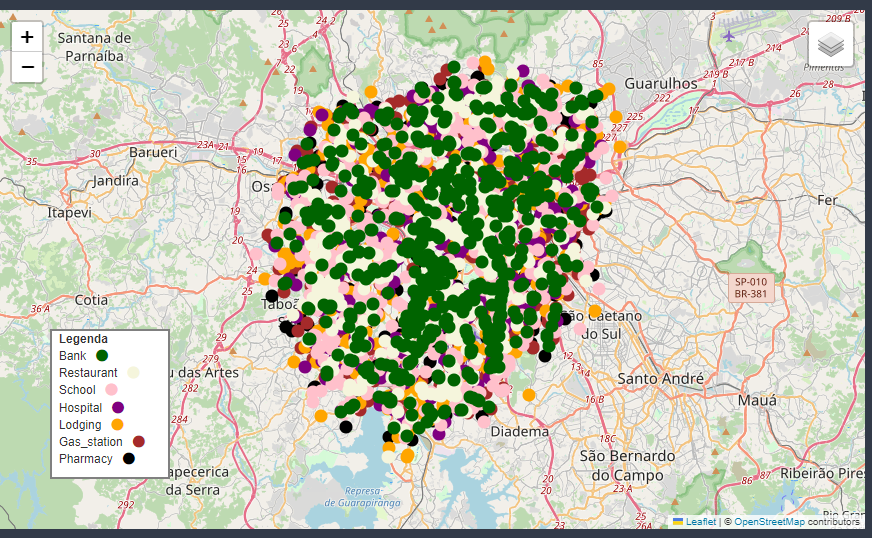


In [ ]:
# mapa = plot_cycling_infra_per_year_only(2022)

In [ ]:
# mapa

In [ ]:
# roda_tudo()
# file_path_csv = 'dados_all_500.csv'

# # Carregar o arquivo CSV em um DataFrame
# dados_all = pd.read_csv(file_path_csv)

In [ ]:
############cruzar estacoes

# place_types_manual = ['school', 'restaurant', 'gas_station'] 
place_types_manual = ["bank", "restaurant", "school", "hospital", "lodging", "gas_station", "pharmacy"]

def play_ciclovias_places_interest():
    im=interact_manual(
        ciclovias_places_interest,
        radius=widgets.FloatSlider(value=0.01,  min=0.01, max=1),
        place_type = widgets.SelectMultiple(
            options=place_types_manual,
            value=list(place_types_manual),  # Selecionar todos por padrão
            description='Escolha os tipos de lugares:',
            disabled=False
        ))
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]))
    im.widget.children[0].description = 'Raio(km)'
    im.widget.children[1].description = 'Tipos dos lugares'
    # im.widget.children[2].description = 'Cor'
def ciclovias_places_interest(radius, place_type):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
    scaler = MinMaxScaler()

    df_cruz=tabela_cruzamentos(estacoes_circulos)

    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruz'].sum().reset_index()
    # max_value = df_cruz['cruz'].max()

    # df_cruz['cruz'] = df_cruz['cruz'] / max_value
    df_cruz['cruz'] = scaler.fit_transform(df_cruz[['cruz']])
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruz'] = df_merged['cruz'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
    # df_final['cruz']=df_final['cruz']*100
    ################################33333333
#     return df_final

    dataframe = update_data()
    intersections = []

    for index_point, row_point in dataframe.iterrows():
        point_geometry = row_point['geometry']

        for index_circle, row_circle in df_final.iterrows():
            circle_polygon = row_circle['circle']

            # Verifica a interseção
            if point_geometry.intersects(circle_polygon):
                # Adiciona informações relevantes à lista
                intersections.append({
                    'point_name': row_point['name'],
                    'geometry': point_geometry,
                    'circle_name': row_circle['name'],
                    'circle': row_circle['circle'],
                    'place_type': row_point['place_type'],
                    'general_place_type': row_point['general_place_type']
                })
    
    df_intersections = gpd.GeoDataFrame(intersections, geometry='geometry')
    df_intersections = df_intersections[df_intersections['general_place_type'].isin(place_type)]
    # return df_intersections
    circle_name_counts = df_intersections['circle_name'].value_counts()
    circle_name_counts = pd.DataFrame(circle_name_counts)
    circle_name_counts = circle_name_counts.reset_index()

# Renomear as colunas
    circle_name_counts.columns = ['circle_name', 'count']
    
    merged_df = pd.merge(estacoes, circle_name_counts, how='left', left_on='name', right_on='circle_name')

# Preencher os valores nulos com 0
    merged_df['count'] = merged_df['count'].fillna(0).astype(int)

    # Selecionar as colunas desejadas
    result_df = merged_df[['name', 'count']]

    # Renomear as colunas
    result_df.columns = ['name', 'count']
    
    result_df = result_df.sort_values(by='count', ascending=False)

# Calcular o maior valor da coluna 'count'
    # max_count = result_df['count'].max()

    # Dividir a coluna 'count' pelo maior valor e criar a coluna 'i_places_interest'
    # result_df['i_places_interest'] = result_df['count'] / max_count
    # result_df['i_places_interest'] = result_df['i_places_interest'] * 100
    result_df['i_places_interest'] = scaler.fit_transform(result_df[['count']])

    merged_df_final = pd.merge(df_final, result_df, how='outer')
    
    merged_df_final['resultado_final'] = (merged_df_final['cruz'] + merged_df_final['i_places_interest'])/2

# Dividir o resultado por 2
    # merged_df_final['resultado_final'] = merged_df_final['resultado_final'] / 2
    
#     return merged_df_final

    center_lat = dataframe['lat'].mean()
    center_lon = dataframe['lon'].mean()
#     my_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)  # Reduzi o zoom inicial
    my_map=plot_cycling_infra_per_year_only(2022)
   
    # Determine as categorias únicas de lugares
    categories = df_intersections['general_place_type'].unique()

    # Dicionário para armazenar as camadas TileLayer
    tile_layers = {}

    # Adicione um TileLayer para cada categoria
    for category in categories:
        category_data = dataframe[dataframe['general_place_type'] == category]
        color = get_category_color(category)

        # Crie uma camada FeatureGroup para cada categoria
        tile_layers[category] = folium.FeatureGroup(name=category)

        for index, row in category_data.iterrows():
            circle_marker = folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=1,
                popup=f"{row['name']}<br>{row['address']}",
                tooltip=row['name']
            )
            circle_marker.add_to(tile_layers[category])

    # Adicione as camadas FeatureGroup ao mapa
    for layer in tile_layers.values():
        layer.add_to(my_map)

    # Adicione um controle de camadas ao mapa
    
    legend_html = generate_legend(categories)
    my_map.get_root().html.add_child(folium.Element(legend_html))
    mymap=my_map    
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    
    df_final = merged_df_final.copy()
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'resultado_final')
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    circle_layer = folium.FeatureGroup(name='Circles')

    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(f"Nome: {infos['name']} <br>Índice de Ciclovias: {infos['cruz']:.2f} <br>Índice de Locais de interesse: {infos['i_places_interest']:.2f} <br>Índice final: {infos['resultado_final']:.2f}"
                              , max_width=200),           
                color='green',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='green',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(f"Nome: {infos['name']} <br>Índice de Ciclovias: {infos['cruz']:.2f} <br>Índice de Locais de interesse: {infos['i_places_interest']:.2f} <br>Índice final: {infos['resultado_final']:.2f}"
                              , max_width=200),
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)


    colormap = cm.linear.plasma.scale(df_final['resultado_final'].min(), df_final['resultado_final'].max())
    colormap.add_to(mymap)
    
   
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['resultado_final']

        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)


# Iterar novamente e adicionar os círculos (marcadores)
    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['resultado_final']

        # if cruz_value <= 0.0:
        #     color = 'red'
        # else:

        # Adicionar os círculos (marcadores)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(f"Nome: {row['name']} <br>Índice de Ciclovias: {row['cruz']:.2f} <br>Índice de Locais de interesse: {row['i_places_interest']:.2f} <br>Índice final: {row['resultado_final']:.2f}"
                              , max_width=200)
        ).add_to(mymap)

    folium.LayerControl().add_to(mymap)
#     folium.LayerControl().add_to(mymap)
    # df_final.to_csv('df_15_pois_ciclovias', index=False)

    # mymap.save('mapa_15_pois_ciclovias.html')
    return mymap




In [ ]:
 # Adicione outros tipos conforme necessário

# roda_tudo()

In [ ]:
# x = update_data()

In [ ]:
# x

In [ ]:
# dados_all.to_csv('dados_all_500.csv', index=False)

## Cruzamento de ciclovias e de pontos de interesse

A função "play_ciclovias_places_interest()" apresenta, por meio de um mapa de cores, índice de cruzamento de ciclovias e índice de pontos de interesse que, somados e feita a média, representam a incidência de locais com influência desses dois fatores. É possível escolher quais lugares serão considerados na análise e o raio de abrangência de cada estação. Os índices variam de 0 a 1.

---

## Intersection of Bike Paths and Points of Interest

The function "play_ciclovias_places_interest()" displays, through a color-coded map, the index of intersection between bike paths and the index of points of interest. When summed and averaged, these indices represent the incidence of locations influenced by both factors. It is possible to choose which places will be considered in the analysis and the radius of coverage for each station. The indices range from 0 to 1.


In [ ]:
play_ciclovias_places_interest()

In [ ]:
place_types_manual = ["bank", "restaurant", "school", "hospital", "lodging", "gas_station", "pharmacy"]

def play_places_interest():
    im=interact_manual(
        places_interest,
        radius=widgets.FloatSlider(value=0.5,  min=0.00, max=1),
        place_type = widgets.SelectMultiple(
            options=place_types_manual,
            value=list(place_types_manual),  # Selecionar todos por padrão
            description='Escolha os tipos de lugares:',
            disabled=False
        ))
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]))
    im.widget.children[0].description = 'Raio(km)'
    im.widget.children[1].description = 'Tipos dos lugares'
    # im.widget.children[2].description = 'Cor'
def places_interest(radius, place_type):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)


    dataframe = update_data()
    intersections = []

    for index_point, row_point in dataframe.iterrows():
        point_geometry = row_point['geometry']

        for index_circle, row_circle in estacoes_circulos.iterrows():
            circle_polygon = row_circle['circle']

            # Verifica a interseção
            if point_geometry.intersects(circle_polygon):
                # Adiciona informações relevantes à lista
                intersections.append({
                    'point_name': row_point['name'],
                    'geometry': point_geometry,
                    'circle_name': row_circle['name'],
                    'circle': row_circle['circle'],
                    'place_type': row_point['place_type'],
                    'general_place_type': row_point['general_place_type']
                })

    df_intersections = gpd.GeoDataFrame(intersections, geometry='geometry')
    df_intersections = df_intersections[df_intersections['general_place_type'].isin(place_type)]
    # return df_intersections
    circle_name_counts = df_intersections['circle_name'].value_counts()
    circle_name_counts = pd.DataFrame(circle_name_counts)
    circle_name_counts = circle_name_counts.reset_index()

# Renomear as colunas
    circle_name_counts.columns = ['circle_name', 'count']
    
    merged_df = pd.merge(estacoes, circle_name_counts, how='left', left_on='name', right_on='circle_name')

# Preencher os valores nulos com 0
    merged_df['count'] = merged_df['count'].fillna(0).astype(int)

    # Selecionar as colunas desejadas
    result_df = merged_df[['name', 'count']]

    # Renomear as colunas
    result_df.columns = ['name', 'count']
    
    result_df = result_df.sort_values(by='count', ascending=False)

# Calcular o maior valor da coluna 'count'
    scaler = MinMaxScaler()
    result_df['resultado_final'] = scaler.fit_transform(result_df[['count']])
    # max_count = result_df['count'].max()

    # Dividir a coluna 'count' pelo maior valor e criar a coluna 'i_places_interest'
    # result_df['resultado_final'] = result_df['count'] / max_count
    # result_df['resultado_final'] = result_df['resultado_final'] * 100

    result_df = pd.merge(estacoes_circulos, result_df, how='outer')
    
    # return result_df
#     merged_df_final['resultado_final'] = merged_df_final['cruz'] + merged_df_final['i_places_interest']

# # Dividir o resultado por 2
#     merged_df_final['resultado_final'] = merged_df_final['resultado_final'] / 2
    
# #     return merged_df_final

    center_lat = dataframe['lat'].mean()
    center_lon = dataframe['lon'].mean()
#     my_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)  # Reduzi o zoom inicial
    my_map=plot_cycling_infra_per_year_only(2022)

    # Determine as categorias únicas de lugares
    categories = df_intersections['general_place_type'].unique()

    # Dicionário para armazenar as camadas TileLayer
    tile_layers = {}

    # Adicione um TileLayer para cada categoria
    for category in categories:
        category_data = dataframe[dataframe['general_place_type'] == category]
        color = get_category_color(category)

        # Crie uma camada FeatureGroup para cada categoria
        tile_layers[category] = folium.FeatureGroup(name=category)

        for index, row in category_data.iterrows():
            circle_marker = folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=1,
                popup=f"{row['name']}<br>{row['address']}",
                tooltip=row['name']
            )
            circle_marker.add_to(tile_layers[category])

    # Adicione as camadas FeatureGroup ao mapa
    for layer in tile_layers.values():
        layer.add_to(my_map)

    # Adicione um controle de camadas ao mapa
    
    legend_html = generate_legend(categories)
    my_map.get_root().html.add_child(folium.Element(legend_html))
    mymap=my_map    
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    
    df_final = result_df
    circle_layer = folium.FeatureGroup(name='Circles')
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'resultado_final')
    colormap = cm.linear.plasma.scale(df_final['resultado_final'].min(), df_final['resultado_final'].max())
    colormap.add_to(mymap)
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            circle=infos['circle']
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice de locais de interesse: {infos['resultado_final']:.2f} ", max_width=200),
                color='green',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='green',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat'], infos['lon']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice de locais de interesse: {infos['resultado_final']:.2f} ", max_width=200),
                color='black',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)


    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['resultado_final']
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)


# Iterar novamente e adicionar os círculos (marcadores)
    for index, row in df_final.iterrows():
        lat = row['lat']
        lon = row['lon']
        cruz_value = row['resultado_final']
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(f"Nome: {row['name']}<br>Índice de locais de interesse: {row['resultado_final']:.2f} ", max_width=200)
        ).add_to(mymap)
    folium.LayerControl().add_to(mymap)

    df_final.to_csv('df_14_pois', index=False)
    mymap.save('mapa_14_pois.html')
#     folium.LayerControl().add_to(mymap)
    return mymap

## Cruzamento de pontos de interesse

Essa função "play_places_interest", para um determinado raio e lugares de interesse selecionados, aponta em um mapa de cores a incidência de POI's na proximidade de cada estação. O índice vai de 0 a 1.

---

## Intersection of Points of Interest

The function "play_places_interest," for a given radius and selected places of interest, indicates on a color-coded map the incidence of POIs in the proximity of each station. The index ranges from 0 to 1.


In [ ]:
play_places_interest()

In [ ]:
def places_interest_trips(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira,radius, place_type):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
    scaler = MinMaxScaler()

    dataframe = update_data()
    intersections = []

    for index_point, row_point in dataframe.iterrows():
        point_geometry = row_point['geometry']

        for index_circle, row_circle in estacoes_circulos.iterrows():
            circle_polygon = row_circle['circle']

            # Verifica a interseção
            if point_geometry.intersects(circle_polygon):
                # Adiciona informações relevantes à lista
                intersections.append({
                    'point_name': row_point['name'],
                    'geometry': point_geometry,
                    'circle_name': row_circle['name'],
                    'circle': row_circle['circle'],
                    'place_type': row_point['place_type'],
                    'general_place_type': row_point['general_place_type']
                })

    df_intersections = gpd.GeoDataFrame(intersections, geometry='geometry')
    df_intersections = df_intersections[df_intersections['general_place_type'].isin(place_type)]
    # return df_intersections
    circle_name_counts = df_intersections['circle_name'].value_counts()
    circle_name_counts = pd.DataFrame(circle_name_counts)
    circle_name_counts = circle_name_counts.reset_index()

# Renomear as colunas
    circle_name_counts.columns = ['circle_name', 'count']
    
    merged_df = pd.merge(estacoes, circle_name_counts, how='left', left_on='name', right_on='circle_name')

# Preencher os valores nulos com 0
    merged_df['count'] = merged_df['count'].fillna(0).astype(int)

    # Selecionar as colunas desejadas
    result_df = merged_df[['name', 'count']]

    # Renomear as colunas
    result_df.columns = ['name', 'count']
    
    result_df = result_df.sort_values(by='count', ascending=False)

# Calcular o maior valor da coluna 'count'
    # max_count = result_df['count'].max()

    # Dividir a coluna 'count' pelo maior valor e criar a coluna 'i_places_interest'
    # result_df['resultado_final'] = result_df['count'] / max_count
    # result_df['resultado_final'] = result_df['resultado_final'] * 100
    result_df['resultado_final'] = scaler.fit_transform(result_df[['count']])
    result_df = pd.merge(estacoes_circulos, result_df, how='outer')
    
    
    # return result_df
#     merged_df_final['resultado_final'] = merged_df_final['cruz'] + merged_df_final['i_places_interest']

# # Dividir o resultado por 2
#     merged_df_final['resultado_final'] = merged_df_final['resultado_final'] / 2
    
# #     return merged_df_final

    center_lat = dataframe['lat'].mean()
    center_lon = dataframe['lon'].mean()
#     my_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)  # Reduzi o zoom inicial
    my_map=plot_cycling_infra_per_year_only(2022)

    # Determine as categorias únicas de lugares
    categories = df_intersections['general_place_type'].unique()

    # Dicionário para armazenar as camadas TileLayer
    tile_layers = {}

    # Adicione um TileLayer para cada categoria
    for category in categories:
        category_data = dataframe[dataframe['general_place_type'] == category]
        color = get_category_color(category)

        # Crie uma camada FeatureGroup para cada categoria
        tile_layers[category] = folium.FeatureGroup(name=category)

        for index, row in category_data.iterrows():
            circle_marker = folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=1,
                popup=f"{row['name']}<br>{row['address']}",
                tooltip=row['name']
            )
            circle_marker.add_to(tile_layers[category])

    # Adicione as camadas FeatureGroup ao mapa
    for layer in tile_layers.values():
        layer.add_to(my_map)

    # Adicione um controle de camadas ao mapa
    
    legend_html = generate_legend(categories)
    my_map.get_root().html.add_child(folium.Element(legend_html))
    mymap=my_map    
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    
    df_final = result_df
    circle_layer = folium.FeatureGroup(name='Circles')
    df_trips=tratar_dados_periodo_indice(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira)
#     return df_trips
    # max_value = df_trips['indice'].max()
    # df_trips['indice']=df_trips['indice']/max_value
    # df_trips['indice']=df_trips['indice']*100
    df_trips['indice'] = scaler.fit_transform(df_trips[['indice']])
    df_final = pd.merge(df_final, df_trips, left_on='name', right_on=estacao, how="outer")
    df_final['indice'] = df_final['indice'].fillna(0)
    df_final['end_result'] = (df_final['indice']+df_final['resultado_final'])/2
   
    indice_ultima_linha = df_final.index[-1]

    # Exclua a última linha
    df_final = df_final.drop(indice_ultima_linha)
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'end_result')
    colormap = cm.linear.cividis.scale(df_final['end_result'].min(), df_final['end_result'].max())
    colormap.add_to(mymap)
#     return df_final
    geojson_style = {
                'fillColor': 'gray',
                'color': 'gray',
                'fillOpacity': 0.0
    }
    if not outliers_lower.empty:
        circle = infos['circle']
        for i, infos in outliers_lower.iterrows():
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice de locais de interesse: {infos['resultado_final']:.2f}<br>Índice de viagens: {infos['indice']:.2f}<br>Índice geral: {infos['end_result']:.2f}", max_width=200),
                color='#E69F00',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='#E69F00',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice de locais de interesse: {infos['resultado_final']:.2f}<br>Índice de viagens: {infos['indice']:.2f}<br>Índice geral: {infos['end_result']:.2f}", max_width=200),
                color='black',
                radius=5,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    for index, row in df_final.iterrows():
        circle = row['circle']
        cruz_value = row['end_result']

        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)


# Iterar novamente e adicionar os círculos (marcadores)
    for index, row in df_final.iterrows():
        lat = row['lat_x']
        lon = row['lon_x']
        cruz_value = row['end_result']

        # if cruz_value <= 0.0:
        #     color = 'red'
        # else:
        #     color = get_color(cruz_value, green_blue_black)

        # Adicionar os círculos (marcadores)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=colormap(cruz_value),
            fill=True,
            fill_color=colormap(cruz_value),
            fill_opacity=1,
            popup=folium.Popup(f"Nome: {row['name']}<br>Índice de locais de interesse: {row['resultado_final']:.2f}<br>Índice de viagens: {row['indice']:.2f}<br>Índice geral: {row['end_result']:.2f}", max_width=200)
        ).add_to(mymap)

    folium.LayerControl().add_to(mymap)
#     folium.LayerControl().add_to(mymap)
    # df_final.to_csv('df_16_pois_trips', index=False)

    # mymap.save('mapa_16_pois_trips.html')
    return mymap

In [ ]:
def play_places_interest_trips():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,30)#'2022-04-30'
    im=interact_manual(
        places_interest_trips,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23,59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                          ,value='start_station_name'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
        radius=widgets.FloatSlider(value=0.1,  min=0.1, max=1),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=True),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=1, max=1),
        place_type = widgets.SelectMultiple(
            options=place_types_manual,
            value=list(place_types_manual),  
            description='Escolha os tipos de lugares:',
            disabled=False
        ))
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]))
        
   
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Considerar vagas?'
#     im.widget.children[11].description = 'Opacidade do Círculo'

    im.widget.children[11].description = 'Raio(km)'
    im.widget.children[12].description = 'Tipos dos lugares'
    # im.widget.children[13].description = 'Cor'

## Cruzamento de viagens e pontos de interesse

A função "play_ciclovias_places_interest" é semelhante a essa: "play_places_interest_trips()". Nesse caso, com todos os parâmetros referentes ao índice das viagens e outro aos pontos de interesse, o retorno da função é um mapa de cores que mostra uma média desses dois índices calculados, que vai de 0 a 1.

---

## Intersection of Trips and Points of Interest
The function "play_ciclovias_places_interest" is similar to this one: "play_places_interest_trips()". In this case, with all parameters related to the index of trips and another for points of interest, the function returns a color-coded map showing an average of these two calculated indices, ranging from 0 to 1.


In [ ]:
play_places_interest_trips()

In [ ]:

def tratar_dados_periodo_indice_comparative(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira):
    data_s_x = pd.to_datetime(data_s)
    data_e_x=pd.to_datetime(data_e)
    duration_min_sec=(duration_min*60.0)
    duration_max_sec=(duration_max*60.0)
    dt_dados_aux=dados_all
    if(estacao=="start_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
    elif(estacao=="end_station_name"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_e'] >= periodo_min) & (dados_all['hora_minuto_e']
                                                                          <= periodo_max)]
    elif(estacao=="ambas"):
        dt_dados_aux = dados_all[(dados_all['hora_minuto_s'] >= periodo_min) & (dados_all['hora_minuto_s']
                                                                          <= periodo_max)]
        dt_dados_aux = dt_dados_aux[(dt_dados_aux['hora_minuto_e'] >= periodo_min) 
                                    & (dt_dados_aux['hora_minuto_e']<= periodo_max)]
#     dt_dados_aux = dados_all[(dados_all['hora_minuto'] >= periodo_min) & (dados_all['hora_minuto'] <= periodo_max)]
#     return dt_dados_aux['hora_minuto'].unique()
#     return dt_dados_aux[0:30]
    dt_dados_aux=dt_dados_aux[(dt_dados_aux['date'] > data_s_x) & 
                           (dt_dados_aux['date'] < data_e_x)]
                           
    dt_dados_aux = dados_all[(dados_all['tripduration'] >= duration_min_sec)]
    if duration_max_sec <= 43200:
        dt_dados_aux = dt_dados_aux[dt_dados_aux['tripduration'] <= duration_max_sec]
    dt_dados_aux = dt_dados_aux[dt_dados_aux['week_day'].isin(week_day)]
#     dt_dados_aux=dt_dados_aux[(dt_dados_aux['hora_minuto']<=periodo_max) and 
#                              (dt_dados_aux['hora_minuto']>=periodo_min)]
    if(holiday!="total"):
        dt_dados_aux=dt_dados_aux[dt_dados_aux['holiday']==holiday]
#     return dt_dados_aux
    if(estacao=="ambas"):
        dt_dados=ambas(tratar_dados_aux(dt_dados_aux, "start_station_name"),
                      tratar_dados_aux(dt_dados_aux, "end_station_name"))
    else:
        dt_dados=tratar_dados_aux(dt_dados_aux,estacao)
#     return dt_dados
    if(ranking_aux>(dt_dados.shape[0]-1)):
        ranking=(dt_dados.shape[0]-1)
    else:
        ranking=ranking_aux
#             estacao="estacao"
    aux_viagens = pd.DataFrame({
        estacao:dt_dados[estacao][:ranking],
        "qtde_viagens":dt_dados["qtde_viagens"][:ranking],
        "P%":range(ranking)
#         "lat":range(ranking), 
#         "lon":range(ranking)
    })
#     return aux_viagens
    soma_viagens=dt_dados['qtde_viagens'].sum() 
    aux_viagens['P%'] = (aux_viagens['qtde_viagens'] / soma_viagens) * 100
    # for i, infos in aux_viagens.iterrows():
    #     porcent=(infos.qtde_viagens/soma_viagens)*100
    #     aux_viagens['P%'] = (aux_viagens['qtde_viagens'] / soma_viagens) * 100
    aux_viagens = aux_viagens.merge(estacoes, left_on=estacao, right_on='name')
    aux_viagens= aux_viagens.drop('name', axis=1)
#     data_atual = datetime.date.today()
    data_atual = pd.to_datetime(data_e_x)
    aux_viagens['first_trip'] = pd.to_datetime(aux_viagens['first_trip'])
    
    aux_viagens['dias'] = (data_atual - aux_viagens.loc[aux_viagens['first_trip'] > data_s_x,
                                                        'first_trip']).dt.days

# Se a data de inauguração for anterior ou igual a data_s_x, calcular a diferença em relação a data_s_x

    aux_viagens.loc[aux_viagens['first_trip'] <= data_s_x, 'dias'] = (data_atual - data_s_x).days
#     data_atual = pd.to_datetime(data_e_x)
#     aux_viagens['first_trip'] = pd.to_datetime(aux_viagens['first_trip'])
    aux_viagens['dias'] = (data_atual - aux_viagens['first_trip']).dt.days
    aux_viagens['indice']=aux_viagens['qtde_viagens']/aux_viagens['dias']
    if(cadeira==True):
        aux_viagens['indice']=aux_viagens['indice']/aux_viagens['VAGAS/DOCK AGORA']
    aux_viagens['quartis'] = pd.qcut(aux_viagens['indice'], q=4, 
                                     labels=['1', '2', '3', '4'])
    
    aux_viagens['quartis'] = aux_viagens['quartis'].astype(int)
    aux_viagens = aux_viagens.sort_values(by='indice', ascending=False)
    nova_linha = pd.DataFrame({
        estacao: ["Soma"],
        'qtde_viagens': [soma_viagens],
        'P%': [100],
        'id': [None],
        'address': [None],
        'lat': [None],
        'lon': [None],
        'VAGAS/DOCK AGORA': [None],
        'first_trip': [None],
        'dias': [None],
        'indice': [None],
        'quartis': [None]
})

# Concatenar o novo DataFrame ao DataFrame original
    aux_viagens = pd.concat([aux_viagens, nova_linha], ignore_index=True)
    return aux_viagens
# df_merged = pd.merge(df1, df2, on='A', how='outer'

In [ ]:
# def roda_tratar_dados_periodo_indice():
#     min_data=date(2018,1,26)#'2018-01-26'
#     max_data=date(2023,7,31)#'2022-04-30'
#     im=interact_manual(
#         tratar_dados_periodo_indice,
#         data_s= widgets.DatePicker(
#             value=min_data,
#             min_date=min_data,
#             max_date=max_data
#         ),
#         data_e= widgets.DatePicker(
#             value=max_data,
#             min_date=min_data,
#             max_date=max_data
#         ),
#         duration_min=widgets.IntSlider(value=0,  min=0, max=721),
#         duration_max=widgets.IntSlider(value=721,  min=1, max=721),
#         holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
#         week_day=widgets.SelectMultiple(
#             options=[('Segunda',0.0),
#                      ('Terça',1.0),
#                      ('Quarta',2.0),
#                      ('Quinta',3.0),
#                      ('Sexta',4.0),
#                      ('Sábado',5.0),
#                      ('Domingo',6.0)],
#             value=[0.0,1.0,2.0,3.0,4.0,5.0,6.0],
#             description='Dias da Semana',
#             disabled=False
#             ),
#         periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
#         periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
#         estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
#                                      ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
#                                  ,value='ambas'),
#         ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
#         cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=False))
#     im.widget.children[0].description = 'Data inicio'
#     im.widget.children[1].description = 'Data fim'
#     im.widget.children[2].description = 'Duração mínima(minutos)'
#     im.widget.children[3].description = 'Duração máxima(minutos)'
#     im.widget.children[4].description = 'Feriado'
#     im.widget.children[5].description = 'Dia da Semana'
#     im.widget.children[6].description = 'Hr min'
#     im.widget.children[7].description = 'Hr max'
#     im.widget.children[8].description = 'Tipo de estação'
#     im.widget.children[9].description = 'Quantos estações a aparecer'
#     im.widget.children[10].description = 'Considerar vagas?'

In [ ]:
# roda_viagens_indice_gradacao()

In [ ]:
# def estacoes_desativadas_acumulado_raio_prop(min_data, max_data, radius, fill_opacity,
#                          activated_color,disabled_color,min_days_disabled,raio_indice, estacao):
    
#     dt_dados_aux=estacoes
#     min_data_aux=pd.to_datetime(min_data)
#     max_data_aux=pd.to_datetime(max_data)
#     if(estacao=="start_station_name"):
#         sem_viagens_interval=sem_viagens_interval_start
#     if(estacao=="end_station_name"):
#         sem_viagens_interval=sem_viagens_interval_end
#     if(estacao=="both"):
#         sem_viagens_interval=sem_viagens_interval_all
#     dt_dados=estacoes[(estacoes['first_trip'] <= max_data_aux)]
#     sem_viagens_aux=sem_viagens_interval[(sem_viagens_interval['data_inicio'] >= min_data_aux) & 
#                            (sem_viagens_interval['data_fim'] <= max_data_aux)]
    
#     mapa=gera_mapa(dados_all, 11.5)
#     for i,infos in dt_dados.iterrows():
#          color=activated_color
#          lat=dt_dados['lat'][i]
#          lon=dt_dados['lon'][i]
#          name=dt_dados['name'][i]
#          data=str(dt_dados['first_trip'][i])
#          endereco=dt_dados['address'][i]
        
#          disabled = sem_viagens_aux.loc[sem_viagens_aux[estacao] == name]
#          disabled = disabled.loc[disabled['diferenca_dias']>=min_days_disabled]
#          if not disabled.empty:
# #                 disabled_aux=disabled[disabled['diferenca_dias']==disabled['diferenca_dias'].max()]
#                 intervalos=0
#                 diferenca_total=0
#                 for index, row in disabled.iterrows():
#                     diferenca_dias = row['diferenca_dias']
#                     diferenca_total+=diferenca_dias
#                     intervalos+=1
#                 color=disabled_color
#                 radius_prop=(radius*diferenca_total)/raio_indice
#                 folium.CircleMarker(
#                 location=[lat,lon],
#                 popup="Estação: "+name+"\n\nData de Inauguração: "+data+
#                     "\n\nDias sem Viagem: "+str(diferenca_total)+"\nQuantidade de Intervalos: "+
#                     str(intervalos),
#                 color=color,
#                 radius=radius_prop,
#                 tooltip="<b>"+name+"<b>",
#                 fill=True,
#                 fill_opacity=fill_opacity,
#                 fill_color=color,
#             ).add_to(mapa)
             
#          else:
#             folium.CircleMarker(
#                 location=[lat,lon],
#                 popup="Estação: "+name+"\n\nData de Inauguração: "+data+"\n\nEndereco: "+endereco,
#                 color=color,
#                 radius=radius,
#                 tooltip="<b>"+name+"<b>",
#                 fill=True,
#                 fill_opacity=fill_opacity,
#                 fill_color=color,
#             ).add_to(mapa)
#     return mapa


# def roda_estacoes_desativadas_acumulado_raio_prop():
#     min_data_aux=date(2018,1,26)
#     max_data_aux=date(2023,7,31)
#     im=interact_manual(
#         estacoes_desativadas_acumulado_raio_prop,
#         min_data= widgets.DatePicker(
#             value=min_data_aux,
#             min_date=min_data_aux,
#             max_date=max_data_aux
#         ),
#         max_data= widgets.DatePicker(
#             value=max_data_aux,
#             min_date=min_data_aux,
#             max_date=max_data_aux
#         ),
#         radius=widgets.IntSlider(value=5,  min=1, max=10),
#         fill_opacity=widgets.FloatSlider(value=0.5,  min=0.5, max=1),
#         activated_color=widgets.ColorPicker(
#                 concise=False,
#                 value='green',
#                 disabled=False
#             ),
#         disabled_color=widgets.ColorPicker(
#                 concise=False,
#                 value='red',
#                 disabled=False
#             ),
#         min_days_disabled=widgets.IntSlider(value=1,  min=1, max=507),
#         raio_indice=widgets.IntSlider(value=5,  min=1, max=100),
#         estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
#                                      ('Estações de Fim', 'end_station_name'), ('Ambas', 'ambas')]))
    
#     im.widget.children[0].description = 'Data de início'
#     im.widget.children[1].description = 'Data de fim'
#     im.widget.children[2].description = 'Raio do Círculo'
#     im.widget.children[3].description = 'Opacidade do Círculo'
#     im.widget.children[4].description = 'Cor das ativadas'
#     im.widget.children[5].description = 'Cor das desativadas'
#     im.widget.children[6].description = 'Mínimo dias considerados'
#     im.widget.children[7].description = 'Raio indice'
#     im.widget.children[8].description = 'Qual estação considerar?'

In [ ]:
def places_interest_trips_comparative(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira,radius, place_type):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
    scaler = MinMaxScaler()

    dataframe = update_data()
    intersections = []

    for index_point, row_point in dataframe.iterrows():
        point_geometry = row_point['geometry']

        for index_circle, row_circle in estacoes_circulos.iterrows():
            circle_polygon = row_circle['circle']

            # Verifica a interseção
            if point_geometry.intersects(circle_polygon):
                # Adiciona informações relevantes à lista
                intersections.append({
                    'point_name': row_point['name'],
                    'geometry': point_geometry,
                    'circle_name': row_circle['name'],
                    'circle': row_circle['circle'],
                    'place_type': row_point['place_type'],
                    'general_place_type': row_point['general_place_type']
                })

    df_intersections = gpd.GeoDataFrame(intersections, geometry='geometry')
    df_intersections = df_intersections[df_intersections['general_place_type'].isin(place_type)]
    # return df_intersections
    circle_name_counts = df_intersections['circle_name'].value_counts()
    circle_name_counts = pd.DataFrame(circle_name_counts)
    circle_name_counts = circle_name_counts.reset_index()

# Renomear as colunas
    circle_name_counts.columns = ['circle_name', 'count']
    
    merged_df = pd.merge(estacoes, circle_name_counts, how='left', left_on='name', right_on='circle_name')

# Preencher os valores nulos com 0
    merged_df['count'] = merged_df['count'].fillna(0).astype(int)

    # Selecionar as colunas desejadas
    result_df = merged_df[['name', 'count']]

    # Renomear as colunas
    result_df.columns = ['name', 'count']
    
    result_df = result_df.sort_values(by='count', ascending=False)

# Calcular o maior valor da coluna 'count'
    # max_count = result_df['count'].max()

    # Dividir a coluna 'count' pelo maior valor e criar a coluna 'i_places_interest'
    # result_df['resultado_final'] = result_df['count'] / max_count  #resultado_final = cruzamento de POIs
    # result_df['resultado_final'] = result_df['resultado_final'] * 100
    result_df['resultado_final'] = scaler.fit_transform(result_df[['count']])
    result_df = pd.merge(estacoes_circulos, result_df, how='outer')
    
    
    # return result_df
#     merged_df_final['resultado_final'] = merged_df_final['cruz'] + merged_df_final['i_places_interest']

# # Dividir o resultado por 2
#     merged_df_final['resultado_final'] = merged_df_final['resultado_final'] / 2
    
# #     return merged_df_final

    center_lat = dataframe['lat'].mean()
    center_lon = dataframe['lon'].mean()
#     my_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)  # Reduzi o zoom inicial
    my_map=plot_cycling_infra_per_year_only(2022)

    # Determine as categorias únicas de lugares
    categories = df_intersections['general_place_type'].unique()

    # Dicionário para armazenar as camadas TileLayer
    tile_layers = {}

    # Adicione um TileLayer para cada categoria
    for category in categories:
        category_data = dataframe[dataframe['general_place_type'] == category]
        color = get_category_color(category)

        # Crie uma camada FeatureGroup para cada categoria
        tile_layers[category] = folium.FeatureGroup(name=category)

        for index, row in category_data.iterrows():
            circle_marker = folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=1,
                popup=f"{row['name']}<br>{row['address']}",
                tooltip=row['name']
            )
            circle_marker.add_to(tile_layers[category])

    # Adicione as camadas FeatureGroup ao mapa
    for layer in tile_layers.values():
        layer.add_to(my_map)

    # Adicione um controle de camadas ao mapa
    
    legend_html = generate_legend(categories)
    my_map.get_root().html.add_child(folium.Element(legend_html))
    mymap=my_map    
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    
    df_final = result_df
    circle_layer = folium.FeatureGroup(name='Circles')
    df_trips=tratar_dados_periodo_indice_comparative(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         estacao, ranking_aux, cadeira)
#     return df_trips
    # max_value = df_trips['indice'].max() #indice = numero de viagens, por cadeira, blabklabla
    # df_trips['indice']=df_trips['indice']/max_value
    # df_trips['indice']=df_trips['indice']*10
    df_trips['indice'] = scaler.fit_transform(df_trips[['indice']])
    df_final = pd.merge(df_final, df_trips, left_on='name', right_on=estacao, how="outer")
#     df_final['indice'] = df_final['indice'].fillna(0)
    min_value = df_final['indice'].min(skipna=True)
#     df_final['indice'] = df_final['indice'].fillna(min_value/2)
# #     df_final['end_result'] = (df_final['indice']+df_final['resultado_final'])/2
#     indice_ultima_linha = df_final.index[-1]
    
    # Exclua a última linha
    # df_final = df_final.drop(indice_ultima_linha)
    df_final = df_final[df_final[estacao]!="Soma"]
#     return df_final
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    # return df_final
    # for index, row in df_final.iterrows():
    #     circle = row['circle']
    #     folium.GeoJson(
    #         data=shape(circle).__geo_interface__,
    #         style_function=lambda x: geojson_style,
    #         popup=folium.Popup(row['name'], max_width=200)
    #     ).add_to(circle_layer)
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'indice')
    colormap = cm.linear.plasma.scale(df_final['indice'].min(), df_final['indice'].max())
    colormap.add_to(mymap)
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            cruz_pois = infos['resultado_final']
            circle = infos['circle']
            cruz_trips = infos['indice']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome:{row['name']}<br>Índice de pontos de interesse: {(cruz_pois):.2f}<br>Índice de viagens: {cruz_trips:.2f}", max_width=200),
                color='green',
                radius=(cruz_pois*10)+1,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='green',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            cruz_pois = infos['resultado_final']
            cruz_trips = infos['indice']
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome:{row['name']}<br>Índice de pontos de interesse: {(cruz_pois):.2f}<br>Índice de viagens: {cruz_trips:.2f}", max_width=200),
                color='black',
                radius=(cruz_pois*10)+1,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)

# Iterar novamente e adicionar os círculos (marcadores)
    # return df_final[df_final['lat_x'].isnull() | df_final['lon_x'].isnull()]
    for index, row in df_final.iterrows():
        lat = row['lat_x']
        lon = row['lon_x']
        cruz_pois = row['resultado_final']
        cruz_trips = row['indice']
        circle = row['circle']
        folium.CircleMarker(
            location=[lat, lon],
            radius=(cruz_pois*10)+1,
            color=colormap(cruz_trips),
            fill=True,
            fill_color=colormap(cruz_trips),
            fill_opacity=1,
            popup=folium.Popup(f"Nome:{row['name']}<br>Índice de pontos de interesse: {(cruz_pois):.2f}<br>Índice de viagens: {cruz_trips:.2f}", max_width=200)
        ).add_to(mymap)
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)


    folium.LayerControl().add_to(mymap)
    df_final.to_csv('df_17_pois_trips_comparative', index=False)

    mymap.save('mapa_17_pois_trips_comparative.html')
#     folium.LayerControl().add_to(mymap)
    return mymap

In [ ]:
def play_places_interest_trips_comparative():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,30)#'2022-04-30'
    im=interact_manual(
        places_interest_trips_comparative,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23,59)),
        estacao=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                          ,value='start_station_name'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
        radius=widgets.FloatSlider(value=0.1,  min=0.400, max=1),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=True),
        fill_opacity=widgets.FloatSlider(value=0.5,  min=1, max=1),
        place_type = widgets.SelectMultiple(
            options=place_types_manual,
            value=list(place_types_manual),  
            description='Escolha os tipos de lugares:',
            disabled=False
        ))
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]))
        
   
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Considerar vagas?'
#     im.widget.children[11].description = 'Opacidade do Círculo'

    im.widget.children[11].description = 'Raio(km)'
    im.widget.children[12].description = 'Tipos dos lugares'
    # im.widget.children[13].description = 'Cor'

## Comparando de viagens e pontos de interesse

A função "play_places_interest_trips comparative", em comparação às anteriores, tem o objetivo de não fazer a média dos índices, mas sim de inserir um índice de cores, representado pelos pontos de interesse e outro baseado no raio das estações, que representa a quantidade de viagens. De tal forma, é possível perceber de forma visual, clara e comparativa, duas variáveis em análise.

--- 

## Comparing the trips and points of interest

The function "play_places_interest_trips comparative", compared with the other ones, has the objective of not doing the media of the indices, but increasing a color index that represents the points of interest and others based on the radius of the stations, which means the quantity of trips. So, it's possible to understand, in a visual, clear, and comparative way, two variables in analysis.


In [ ]:
play_places_interest_trips_comparative()

In [ ]:
def bike_lanes_trips_comparative(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station,ranking_aux,
                                   tabela, radius, cadeira):
    metro_onibus_trem=['trem']
    scaler = MinMaxScaler()
    df_trips=tratar_dados_periodo_indice_comparative(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         start_end_station, ranking_aux, cadeira)
#     if ciclovia==True:
    # max_value = df_trips['indice'].max() #indice = numero de viagens, por cadeira, blabklabla
    # df_trips['indice']=df_trips['indice']/max_value
    # df_trips['indice']=df_trips['indice']*10  
    df_trips['indice'] = scaler.fit_transform(df_trips[['indice']])
    dt_dados_cruzamento=roda_geral_3(radius, metro_onibus_trem, "tabela")
#     return df_trips
#     else: 
#         dt_dados_cruzamento=metro_onibus_trem_x(radius, green_blue_black,metro_onibus_trem, True)

#     max_value = dt_dados['P%'].nlargest(2).iloc[-1]
#     dt_dados['P%_indice'] = dt_dados['P%'] / max_value
#     return df_trips
    
    df_trips.rename(columns={start_end_station: 'name'}, inplace=True)

    df_final=dt_dados_cruzamento.merge(df_trips, on='name', how='outer')
#     df_final['P%_indice'].fillna(0, inplace=True)
    # min_value = df_final['indice'].min(skipna=True)
    # df_final['indice'] = df_final['indice'].fillna(min_value/2)
#     return min_value/2

    
#     df_final['cruz']=df_final['cruz']/100
    
    df_final = df_final[df_final['name'] != 'Soma']
    if(tabela==True):
        # df_trips['indice']=df_trips['indice']/10
        return df_final

###################################################################################33
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'indice')
    colormap = cm.linear.plasma.scale(df_final['indice'].min(), df_final['indice'].max())
    mymap=plot_cycling_infra_per_year_only(2022)
    colormap.add_to(mymap)
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_marker_layer = folium.FeatureGroup(name='Circlermarker')
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            cruz_bike_lane = infos['cruz']
            cruz_trips = infos['indice']
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice de ciclovias: {cruz_bike_lane:.2f} <br>Índice de viagens: {(cruz_trips):.2f}", max_width=200),
                color='green',
                radius=(cruz_bike_lane*10)+1,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='green',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            cruz_bike_lane = infos['cruz']
            cruz_trips = infos['indice']
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice de ciclovias: {cruz_bike_lane:.2f} <br>Índice de viagens: {(cruz_trips):.2f}", max_width=200),
                color='black',
                radius=(cruz_bike_lane*10)+1,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)


    for index, row in df_final.iterrows():
        circle = row['circle']
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)

    for index, row in df_final.iterrows():
        lat = row['lat_x']
        lon = row['lon_x']
        cruz_bike_lane = row['cruz']
        cruz_trips = row['indice']
     
        folium.CircleMarker(
            location=[lat, lon],
            radius=(cruz_bike_lane*10)+1,
            color=colormap(cruz_trips),
            fill=True,
            fill_color=colormap(cruz_trips),
            fill_opacity=1,
#             popup=folium.Popup(row['name']+", índice final: "+str(row['indice_final']) , max_width=200)
            popup=folium.Popup(f"Nome: {row['name']}<br>Índice de ciclovias: {cruz_bike_lane:.2f} <br>Índice de viagens: {(cruz_trips):.2f}", max_width=200)
        ).add_to(circle_marker_layer)
    circle_marker_layer.add_to(mymap)
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)
    df_final.to_csv('df_18_bike_lanes_trips_comparative', index=False)

    mymap.save('mapa_18_bike_lanes_trips_comparative.html')
    return mymap
    

In [ ]:
def play_bike_lanes_trips_comparative():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,30)#'2022-04-30'
    im=interact_manual(
        bike_lanes_trips_comparative,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23,59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                          ,value='start_station_name'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
        tabela=widgets.Dropdown(options=[('Não', False), ('Sim', True)]),
        radius=widgets.FloatSlider(value=0.400,  min=0.1, max=1),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=True))
#         fill_opacity=widgets.FloatSlider(value=0.5,  min=1, max=1),
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]))
        
   
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Tabela?'
    im.widget.children[11].description = 'Raio(km)'
    im.widget.children[12].description = 'Considerar vagas?'
#     im.widget.children[11].description = 'Opacidade do Círculo'

    # im.widget.children[13].description = 'Cor'

## Comparando viagens e estrutura cicloviária

A função "play_bike_lanes_trips_comparative" tem o objetivo de comparar o índice de viagens, representado pela diferença proporcional entre os raios, e o cruzamento de cada estação com ciclovias, ciclofaixas e ciclorrotas. Essa comparação é apresentada no mapa.

--- 

## Comparing Trips and Cycling Infrastructure

The function "play_bike_lanes_trips_comparative" aims to compare the trip index, represented by the proportional difference between the radii of stations, and the intersection of each station with bike lanes, bike paths, and bike routes. This comparison is presented on the map.

In [ ]:
play_bike_lanes_trips_comparative()

In [ ]:
# dados_all=dados_all[0:500]

In [ ]:
def metro_bus_train_trips_comparative(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station,ranking_aux,
                                   tabela, radius, cadeira, metro_onibus_trem):
#     metro_onibus_trem=['trem']
    scaler = MinMaxScaler()
    df_trips=tratar_dados_periodo_indice_comparative(data_s, data_e,duration_min, duration_max,holiday,week_day,periodo_min,
                         periodo_max,
                         start_end_station, ranking_aux, cadeira)
#     if ciclovia==True:
    df_trips['indice'] = scaler.fit_transform(df_trips[['indice']])
    # max_value = df_trips['indice'].max() #indice = numero de viagens, por cadeira, blabklabla
    # df_trips['indice']=df_trips['indice']/max_value
    # df_trips['indice']=df_trips['indice']*10  
    dt_dados_cruzamento=roda_geral_3(radius, metro_onibus_trem, "tabela")
#     return df_trips
#     else: 
#         dt_dados_cruzamento=metro_onibus_trem_x(radius, green_blue_black,metro_onibus_trem, True)

#     max_value = dt_dados['P%'].nlargest(2).iloc[-1]
#     dt_dados['P%_indice'] = dt_dados['P%'] / max_value
#     return df_trips
    df_trips.rename(columns={start_end_station: 'name'}, inplace=True)

    df_final=dt_dados_cruzamento.merge(df_trips, on='name', how='outer')
#     df_final['P%_indice'].fillna(0, inplace=True)
    # min_value = df_final['indice'].min(skipna=True)
    # df_final['indice'] = df_final['indice'].fillna(min_value/2)
#     return min_value/2
    df_final['cruzamento_total'] = df_final['cruzamento_total'].fillna(0)
    # max_value = df_final['cruzamento_total'].max()
    # df_final['cruzamento_total']=df_final['cruzamento_total']/max_value
    # df_final['cruzamento_total']=df_final['cruzamento_total']*100
    # df_final['cruzamento_total'] = scaler.fit_transform(df_final[['cruzamento_total']])
    # df_final.loc[df_final['name'] == 'SESC Pinheiros', 'cruzamento'] /= 2

#     df_final['cruz']=df_final['cruz']/100
    
    df_final = df_final[df_final['name'] != 'Soma']
    if(tabela==True):
        return df_final
    outliers_lower, outliers_upper, df_final = identificar_outliers(df_final,'indice')
    
###################################################################################33
    mymap=bota_tudo_no_mapa()
    circle_layer = folium.FeatureGroup(name='Circles')
    circle_marker_layer = folium.FeatureGroup(name='Circlermarke')
    colormap = cm.linear.plasma.scale(df_final['indice'].min(), df_final['indice'].max())
    colormap.add_to(mymap)
    geojson_style = {
            'fillColor': 'gray',
            'color': 'gray',
            'fillOpacity': 0.0
    }
    df_final.loc[df_final['name'] == 'SESC Pinheiros', 'cruzamento'] /= 2

    if not outliers_lower.empty:
        for i, infos in outliers_lower.iterrows():
            cruz_metro_bus_train = infos['cruzamento']
            cruz_trips = infos['indice']
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice das estações(trem, metro ou ônibus): {(cruz_metro_bus_train/100):.2f} <br>Índice de viagens: {(cruz_trips):.2f}", max_width=200),
                color='green',
                radius=(cruz_metro_bus_train*10)+1,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='green',
            ).add_to(mymap)
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)
    if not outliers_upper.empty:
        for i, infos in outliers_upper.iterrows():
            cruz_metro_bus_train = infos['cruzamento']
            cruz_trips = infos['indice']
            circle = infos['circle']
            folium.CircleMarker(
                location=[infos['lat_x'], infos['lon_x']],
                popup=folium.Popup(f"Nome: {infos['name']}<br>Índice das estações(trem, metro ou ônibus): {(cruz_metro_bus_train/100):.2f} <br>Índice de viagens: {(cruz_trips):.2f}", max_width=200),
                color='black',
                radius=(cruz_metro_bus_train*10)+1,
                tooltip="<b>"+infos['name']+"<b>",
                fill=True,
                fill_opacity=1.0,
                fill_color='black',
            ).add_to(mymap)
            # circle = infos['circle']
            folium.GeoJson(
                data=shape(circle).__geo_interface__,
                style_function=lambda x: geojson_style,
                popup=folium.Popup(infos['name'], max_width=200)
            ).add_to(circle_layer)

    for index, row in df_final.iterrows():
        circle = row['circle']
#         cruz_value = row['indice_final']

        # Definir o estilo dos polígonos
        folium.GeoJson(
            data=shape(circle).__geo_interface__,
            style_function=lambda x: geojson_style,
            popup=folium.Popup(row['name'], max_width=200)
        ).add_to(circle_layer)
    circle_layer.add_to(mymap)

    for index, row in df_final.iterrows():
        lat = row['lat_x']
        lon = row['lon_x']
        cruz_metro_bus_train = row['cruzamento']
        cruz_trips = row['indice']

        folium.CircleMarker(
            location=[lat, lon],
            radius=(cruz_metro_bus_train*10)+1,
            color=colormap(cruz_trips),
            fill=True,
            fill_color=colormap(cruz_trips),
            fill_opacity=1,
#             popup=folium.Popup(row['name']+", índice final: "+str(row['indice_final']) , max_width=200)
            popup=folium.Popup(f"Nome: {row['name']}<br>Índice das estações(trem, metro ou ônibus): {(cruz_metro_bus_train/100):.2f} <br>Índice de viagens: {(cruz_trips):.2f}", max_width=200)
        ).add_to(circle_marker_layer)
    circle_marker_layer.add_to(mymap)
    folium.TileLayer('cartodbpositron').add_to(mymap)
    folium.TileLayer('cartodbdark_matter').add_to(mymap)
    folium.TileLayer('stamentoner').add_to(mymap)
    folium.TileLayer('stamenterrain').add_to(mymap)
    	
    folium.TileLayer('stamenwatercolor').add_to(mymap)
    folium.LayerControl().add_to(mymap)
    df_final.to_csv('df_19_metro_bus_train_trips_comparative', index=False)

    mymap.save('mapa_19_metro_bus_train_trips_comparative.html')
    return mymap
    

In [ ]:
def play_metro_bus_train_trips_comparative():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,1,30)#'2022-04-30'
    im=interact_manual(
        metro_bus_train_trips_comparative,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23,59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]
                                          ,value='start_station_name'),
        ranking_aux=widgets.IntSlider(value=500,  min=2, max=500),
        tabela=widgets.Dropdown(options=[('Não', False), ('Sim', True)]),
        radius=widgets.FloatSlider(value=0.5,  min=0.1, max=1),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=True),
#         fill_opacity=widgets.FloatSlider(value=0.5,  min=1, max=1),
        metro_onibus_trem=widgets.SelectMultiple(
            options=[('Metrô','metro'),
                     ('Trem','trem'),
                     ('Ônibus','onibus')],
            value=['metro'],
            disabled=False
            ))
        # green_blue_black=widgets.Dropdown(options=[('Azul', 'blue'),
        #                              ('Verde', 'green'),('Preto', 'black')]))
        
   
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Quantos estações a aparecer'
    im.widget.children[10].description = 'Tabela?'
    im.widget.children[11].description = 'Raio(km)'
    im.widget.children[12].description = 'Considerar vagas?'
#     im.widget.children[11].description = 'Opacidade do Círculo'
    im.widget.children[13].description = 'Quais considerar?'

    # im.widget.children[14].description = 'Cor'

## Comparando de viagens e transportes: metrô, ônibus e trem

A função "play_metro_bus_train_trips_comparative" tem o objetivo de comparar o índice de viagens, representado pela variação proporcional dos raios de cada estação, e o índice de estações de trem, metrô e dos terminais de ônibus, representados pela variação gradual da cor de cada ponto. 

--- 

## Comparing the trips and transportation: metro, bus, and train

The function "play_metro_bus_train_trips_comparative" aims to compare the trip index, represented by the proportional variation of the radius of each station, increased by the train and metro stations index, and the bus terminals , represented by the gradually color variation of each point 

In [ ]:
play_metro_bus_train_trips_comparative()

In [ ]:
def tabela_cruzamentos_estacao_2(estacoes_circulos_3, metro_onibus_trem):
#     return estacoes_circulos_3
    df_geral = pd.DataFrame(columns=['name','cruzamento' ,'circle', 'categoria'])
    if "trem" in metro_onibus_trem:
        for index, row_trem in estacao_trem.iterrows():
            estacao_de_trem=row_trem['geometry']
            for _, row_circulos in estacoes_circulos_3.iterrows():
                circle= row_circulos['circle']
                if estacao_de_trem.within(circle):  # Verifica se o ponto está dentro do círculo
                    name = row_circulos['name']
                    df_geral.loc[len(df_geral)] = [name, 1, circle, 'trem']
    if "metro" in metro_onibus_trem:
        for index, row_metro in estacao_metro.iterrows():
            estacao_de_metro=row_metro['geometry']
            for _, row_circulos in estacoes_circulos_3.iterrows():
                circle= row_circulos['circle']
                if estacao_de_metro.within(circle):  # Verifica se o ponto está dentro do círculo
                    name = row_circulos['name']
                    df_geral.loc[len(df_geral)] = [name, 1, circle, 'metro']
    if "onibus" in metro_onibus_trem:
        for index, row_onibus in terminal_onibus.iterrows():
            terminal_de_onibus=row_onibus['geometry']
            for _, row_circulos in estacoes_circulos_3.iterrows():
                circle= row_circulos['circle']
                if terminal_de_onibus.within(circle):  # Verifica se o ponto está dentro do círculo
                    name = row_circulos['name']
                    df_geral.loc[len(df_geral)] = [name, 1, circle, 'onibus']
        
    return df_geral

def roda_geral_4(radius, metro_onibus_trem, tabela_mapa):
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos(estacoes_circulos)
#     return df_cruz
    ###SE QUISER VER A TABELA COMPLETA, CORTE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!11################3
#     return df_cruz
    df_aux=estacoes_circulos[['circle','name']]
    df_cruz = df_cruz.groupby('name')['cruz'].sum().reset_index()
    # max_value = df_cruz['cruz'].max()

    # df_cruz['cruz'] = df_cruz['cruz'] / max_value
    scaler = MinMaxScaler()
    df_cruz['cruz'] = scaler.fit_transform(df_cruz[['cruz']])
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

    df_merged['cruz'] = df_merged['cruz'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', 'cruz']]
    # df_final['cruz']=df_final['cruz']*100
    df_final_1=df_final
#     return df_final_1

    estacoes_circulos=cria_circulos_estacoes_2(False, radius)
#     return estacoes_circulos
    df_cruz=tabela_cruzamentos_estacao_2(estacoes_circulos, metro_onibus_trem)
    
    # Agrupar por nome e somar as contagens
    df_cruz = df_cruz.pivot_table(index='name', columns='categoria', 
                                  values='cruzamento', aggfunc='count', fill_value=0).reset_index()

#     return df_cruz

    df_aux=estacoes_circulos[['circle','name']]
#     df_cruz = df_cruz.groupby('name')['cruzamento'].sum().reset_index()
#     df_cruz['cruzamento_total']=df_cruz['cruzamento']
#     max_value = df_cruz['cruzamento'].max()
#     return max_value
#     df_cruz['cruzamento'] = df_cruz['cruzamento'] / max_value
    df_merged=df_aux.merge(df_cruz, on='name', how='outer')
   
    df_merged=df_merged.drop_duplicates()
#     return df_merged
  
    df_merged = estacoes.merge(df_merged, on='name')
#     return df_merged

#     df_merged['cruzamento'] = df_merged['cruzamento'].fillna(0)
#     return df_merged
    df_final = df_merged[['name', 'lat', 'lon', 'circle', 'first_trip', "trem","onibus","metro"]]
#     df_final['cruzamento']=df_final['cruzamento']*100
    df_final_2=df_final
    
    df_original = pd.merge(df_final_1, df_final_2, on='name', how='left')

# Identificar e excluir as colunas duplicadas (exceto a coluna 'name')
    duplicates = [col for col in df_original.columns if col.endswith('_x')]
    df_original = df_original.drop(columns=duplicates)

    # Renomear a coluna '_y' para remover o sufixo
    df_original = df_original.rename(columns={'name_y': 'name'})
    df_original = df_original.rename(columns={'lat_y': 'lat'})
    df_original = df_original.rename(columns={'lon_y': 'lon'})
    df_original = df_original.rename(columns={'circle_y': 'circle'})

    df_original = df_original.rename(columns={'first_trip_y': 'first_trip'})
    # df_original['cruz']=df_original['cruz']/100
    return df_original
###################################################
#     df_original['indice_total']=(df_original['cruz']+df_original['cruzamento'])/2
    
#     df_final=df_original
#     max_value = df_final['indice_total'].max()

#     df_final['indice_total'] = df_final['indice_total'] / max_value
#     df_final['indice_total'] = df_final['indice_total']*100
# #     df_final['indice_total'] = df_final['indice_total']*2
#     if(tabela_mapa=="tabela"):
#         df_final = df_final.sort_values(by='indice_total', ascending=False)

#         return df_final
#     return df_original
#     return df_final_2
    # mymap=bota_tudo_no_mapa()
    # circle_layer = folium.FeatureGroup(name='Circles')
    # circle_marker_layer = folium.FeatureGroup(name='Circlermarker')
    # for index, row in df_final.iterrows():
    #     circle = row['circle']
    #     cruz_value = row['indice_total']

    #     # Definir o estilo dos polígonos
    #     geojson_style = {
    #         'fillColor': 'gray',
    #         'color': 'gray',
    #         'fillOpacity': 0.0
    #     }

    #     # Adicionar o GeoJson dos polígonos
    #     folium.GeoJson(
    #         data=shape(circle).__geo_interface__,
    #         style_function=lambda x: geojson_style,
    #         popup=folium.Popup(row['name'], max_width=200)
    #     ).add_to(circle_layer)
    # circle_layer.add_to(mymap)



    # for index, row in df_final.iterrows():
    #     lat = row['lat']
    #     lon = row['lon']
    #     cruz_value = row['indice_total']

    #     if cruz_value <= 0.0:
    #         color = 'red'
    #     else:
    #         color = get_color(cruz_value, green_blue_black)

    #     # Adicionar os círculos (marcadores)
    #     folium.CircleMarker(
    #         location=[lat, lon],
    #         radius=5,
    #         color=color,
    #         fill=True,
    #         fill_color=color,
    #         fill_opacity=1,
    #         popup=folium.Popup(row['name']+", índice total: "+str(row['indice_total']) , max_width=200)
    #     ).add_to(circle_marker_layer)
    # circle_marker_layer.add_to(mymap)
    # folium.TileLayer('cartodbpositron').add_to(mymap)
    # folium.TileLayer('cartodbdark_matter').add_to(mymap)
    # folium.TileLayer('stamentoner').add_to(mymap)
    # folium.TileLayer('stamenterrain').add_to(mymap)
    	
    # folium.TileLayer('stamenwatercolor').add_to(mymap)
    # folium.LayerControl().add_to(mymap)
    
    # return mymap

def viagens_color_periodo_indice_novo(data_s, data_e,duration_min,
                                   duration_max,holiday,
                                   week_day,periodo_min,periodo_max,
                                   start_end_station, cadeira,
                                   tabela, radius,
                                   metro_onibus_trem, ciclovia, place_type):
#     dt_dados_cruzamento=roda_geral_3(radius, green_blue_black,metro_onibus_trem, "tabela")
#     return dt_dados_cruzamento
#     dt_dados=tratar_dados_periodo_novo(data_s, data_e, 
#                                   duration_min, duration_max,
#                                   holiday,week_day, periodo_min, periodo_max,
#                                   start_end_station, 500)
    scaler = MinMaxScaler()
    if radius==0:
        radius=0.001
    estacoes_circulos=cria_circulos_estacoes_2(False, radius)

    dataframe = update_data()
#     intersections = []
    df_intersections = estacoes.copy()
    df_intersections["bank"] = 0
    df_intersections["restaurant"] = 0
    df_intersections["school"] = 0
    df_intersections["hospital"] = 0
    df_intersections["lodging"] = 0
    df_intersections["gas_station"] = 0
    df_intersections["pharmacy"] = 0
#     return dataframe
    for index_point, row_point in dataframe.iterrows():
        point_geometry = row_point['geometry']

        for index_circle, row_circle in estacoes_circulos.iterrows():
            circle_polygon = row_circle['circle']

            # Verifica a interseção
            if point_geometry.intersects(circle_polygon):
                # Adiciona informações relevantes à lista
                general_place_type = row_point['general_place_type']
                point_name=row_circle['name']
                df_intersections.loc[df_intersections["name"] == point_name, place_type] += 1

#     place_types_manual
    for category in place_types_manual:
        # max_value = df_intersections[category].max()
        new_column_name = "i_" + category
        df_intersections[new_column_name] = scaler.fit_transform(df_intersections[[category]])
#     return df_intersections
    
    
    dt_dados=tratar_dados_periodo_indice(data_s, data_e,duration_min, 
                                         duration_max,holiday,week_day,periodo_min,periodo_max,
                                         start_end_station, 500, cadeira)
#     return dt_dados
    # max_value = dt_dados['indice'].max()
    # dt_dados['P%_indice'] = dt_dados['indice'] / max_value
    scaler = MinMaxScaler()
    dt_dados['P%_indice'] = scaler.fit_transform(dt_dados[['indice']])
    dt_dados = dt_dados.rename(columns={start_end_station: 'name'})
    if ciclovia==True:
        dt_dados_cruzamento=roda_geral_4(radius, metro_onibus_trem, "tabela")
    else: 
        dt_dados_cruzamento=metro_onibus_trem_x(radius, metro_onibus_trem, True)
#     return dt_dados
#     dt_dados_cruzamento=roda_geral_4(radius, green_blue_black,metro_onibus_trem, "tabela")
#     max_value = dt_dados['P%'].nlargest(2).iloc[-1]
    
    df_final=dt_dados_cruzamento.merge(dt_dados, on='name', how='outer')
    df_final['P%_indice'].fillna(0, inplace=True)
#     df_final['cruzamento']=df_final['cruzamento']/100


    df_final = df_final[df_final['name'] != 'Soma']
    df_final=df_final.merge(df_intersections, on='name', how='outer')
#     return df_final.columns
    for category in ["metro","onibus", "trem"]:
        # max_value = df_final[category].max()
        new_column_name = "i_" + category
        df_final[new_column_name] = scaler.fit_transform(df_final[[category]])
        # df_final[new_column_name] = df_final[category] / max_value
    # df_final = df_final.merge(estacoes, on='name', how='left')
    df_final = df_final.merge(estacoes, on='name', how='left', suffixes=('_df_final', '_estacoes'))
    df_final = df_final[['name', 'i_bank', 'i_restaurant',
                                         'i_school', 'i_hospital', 'i_lodging', 
                                         'i_gas_station', 'i_pharmacy', 'cruz'
                             , 'P%_indice', 'i_trem', 'i_onibus','i_metro', 'VAGAS/DOCK AGORA']]
#     return df_final
    df_final.rename(columns={'cruz': 'i_ciclovias', 'P%_indice': 'i_viagens', 'VAGAS/DOCK AGORA':'i_vagas'}, inplace=True)
    # _, _, df_final = identificar_outliers(df_final, 'i_viagens')
    df_final.fillna(0, inplace=True)
    df_final.drop_duplicates(subset=['name'], inplace=True)

    correlation_matrix = df_final.set_index('name').corr()# return df_final
    if(tabela==True): 
#         df_final = df_final.sort_values(by='indice_final', ascending=False)
        return correlation_matrix
    
    plt.figure(figsize=(10, 8))
    coolwarm_inv = sns.diverging_palette(10, 240, as_cmap=True)


#     sns.heatmap(data, cmap=coolwarm_inv)
    sns.heatmap(correlation_matrix, annot=True, cmap=coolwarm_inv, fmt=".2f", linewidths=.5, vmin=-1, 
                vmax=1)
    plt.title('Matriz de Correlação de Pearson')
    df_final.to_csv('df_20_correlation_matrix_', index=False)
    plt.savefig('heatmap_correlation_matrix_20.png')  # Salva a figura como um arquivo PNG

    plt.show()
#     selected_columns = df_intersections[['point_name', 'i_bank', 'i_restaurant', 'i_school', 'i_hospital', 'i_lodging', 'i_gas_station', 'i_pharmacy']]
    
    ###############################################################################33
   
    
      
def roda_viagens_periodo_indice_novo():
    min_data=date(2018,1,26)#'2018-01-26'
    max_data=date(2019,7,31)#'2022-04-30'
    im=interact_manual(
        viagens_color_periodo_indice_novo,
        data_s= widgets.DatePicker(
            value=min_data,
            min_date=min_data,
            max_date=max_data
        ),
        data_e= widgets.DatePicker(
            value=max_data,
            min_date=min_data,
            max_date=max_data
        ),
        duration_min=widgets.IntSlider(value=0,  min=0, max=721),
        duration_max=widgets.IntSlider(value=721,  min=0, max=721),
        holiday=widgets.Dropdown(options=[('Total','total'), ('Sim', True), ('Não', False)]),
        week_day=widgets.SelectMultiple(
            options=[('Segunda',0.0),
                     ('Terça',1.0),
                     ('Quarta',2.0),
                     ('Quinta',3.0),
                     ('Sexta',4.0),
                     ('Sábado',5.0),
                     ('Domingo',6.0)],
            value=[0.0],
            description='Dias da Semana',
            disabled=False
            ),
        periodo_min=widgets.TimePicker(value=datetime.time(0, 0)),
        periodo_max=widgets.TimePicker(value=datetime.time(23, 59)),
        start_end_station=widgets.Dropdown(options=[('Estações de Início', 'start_station_name'),
                                     ('Estações de Fim', 'end_station_name'), ('Total', 'ambas')]),
        cadeira=widgets.Dropdown(options=[('Sim',True), ('Não', False)], value=False),
        tabela=widgets.Dropdown(options=[('Não', False), ('Sim', True)]),
        radius=widgets.FloatSlider(value=0.5,  min=0.00, max=10),
        # green_blue_black=widgets.Dropdown(options=[('Verde','green'), ('Azul', 'blue'), ('Preto', 'black')]),
        metro_onibus_trem=widgets.SelectMultiple(
            options=[('Metrô','metro'),
                     ('Trem','trem'),
                     ('Ônibus','onibus')],
            value=['metro', 'trem', 'onibus'],
            disabled=False),
        ciclovia=widgets.Dropdown(options=[('Sim', True), ('Não', False)]),
        place_type = widgets.SelectMultiple(
            options=place_types_manual,
            value=list(place_types_manual),  
            description='Escolha os tipos de lugares:',
            disabled=False
        ))
        
    im.widget.children[0].description = 'Data inicio'
    im.widget.children[1].description = 'Data fim'
    im.widget.children[2].description = 'Duração mínima(minutos)'
    im.widget.children[3].description = 'Duração máxima(minutos)'
    im.widget.children[4].description = 'Feriado'
    im.widget.children[5].description = 'Dia da Semana'
    im.widget.children[6].description = 'Hr min'
    im.widget.children[7].description = 'Hr max'
    im.widget.children[8].description = 'Tipo de estação'
    im.widget.children[9].description = 'Considerar Assentos?'


    im.widget.children[10].description = 'Tabela?'
    im.widget.children[11].description = 'Raio(km)'
    # im.widget.children[12].description = 'Cor de Gradação'
    im.widget.children[12].description = 'O que considerar?'
    im.widget.children[13].description = 'Considerar ciclovia?'
    im.widget.children[14].description = 'Quais locais?'

## Matriz de correlação de variáveis das estações de bicicleta

A função "roda_viagens_periodo_indice_novo" retorna uma matriz de correlação de Pearson que possui o objetivo de compreender quais índices se relacionam mais com os outros , tanto diretamente ou inversamente proporcionais. Em destaque , a principal informação é a obtida pela coluna que representa o índice de viagens e as outras variáveis que a relacionam.

---

## Correlation matrix of bike stations variables

The function "roda_viagens_periodo_indice_novo" returns a Pearson correlation matrix that aims to understand which indexes are more closely related to the others, either directly or indirectly. In addition, the principal information is obtained from the column that represents the trip index and the other variables that are connected.




In [ ]:
roda_viagens_periodo_indice_novo()

In [ ]:
# estacoes
# 

In [ ]:
# estacoes

## Analises de Censo Demográfico

In [ ]:
# gdf = gpd.read_file("./censodemo/SIRGAS_SHP_densidade_demografica_2010.shp")
# estacoes.duplicated().sum()